# Feature selection from 14k features


In [2]:
import pandas as pd
import numpy as np
from fred import Fred
import time
import datetime
import csv
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# read the final scaled data from the feature_create notebook
df = pd.read_csv('../data/processed/series_data_scaled2-nd-dd-sd-082919.csv', index_col = 'date')
X = df.drop(['RECESSION'], axis=1)
y = df['RECESSION']
X.head()

CES4000000007  COMPU1USA  CHEBSBUFT02STSAQ  \
date                                                     
1969-01-01       0.982143   0.302537          0.787134   
1969-02-01       0.946429   0.324008          0.787134   
1969-03-01       0.946429   0.324008          0.909803   
1969-04-01       0.928571   0.245934          0.909803   
1969-05-01       0.946429   0.290826          0.909803   

            COREFLEXCPIM157SFRBATL  LFEM25TTUSM647S  FINCPIALLQINMEI  \
date                                                                   
1969-01-01                0.343684         0.019267         0.004099   
1969-02-01                0.743014         0.023032         0.004099   
1969-03-01                0.721846         0.021437         0.004385   
1969-04-01                0.285554         0.020676         0.004385   
1969-05-01                0.125175         0.022883         0.004385   

            BSCICP03DEM665S  DGDSRGM1M225SBEA  WPU104103  CES0800000007  \
date                                                                      
1969-01-01         0.924833          0.685185   0.003891       0.976190   
1969-02-01         0.938461          0.666667   0.003891       0.928571   
1969-03-01         0.956887          0.703704   0.003891       0.952381   
1969-04-01         0.978616          0.722222   0.003891       0.928571   
1969-05-01         0.991709          0.685185   0.003891       0.952381   

                ...       LFWA25FEUSM647N_diffMA  LNS13000319_diffQ  \
date            ...                                                   
1969-01-01      ...                     0.513627          -0.179104   
1969-02-01      ...                     0.438202          -0.098765   
1969-03-01      ...                     0.394166           0.030303   
1969-04-01      ...                     0.358831           0.109091   
1969-05-01      ...                     0.360115           0.410959   

            LNS13000319_diffA  LNS13000319_diffMA  SP500_diffQ  SP500_diffA  \
date                                                                          
1969-01-01           0.222222           -0.307305    -0.010033     0.375262   
1969-02-01           0.057971           -0.055627    -0.228419     0.339659   
1969-03-01          -0.139241           -0.088472    -0.058284     0.424231   
1969-04-01          -0.351064           -0.151599     0.017228     0.183668   
1969-05-01           0.084211            0.418733     0.154091     0.136027   

            SP500_diffMA  RRSFS_diffQ  RRSFS_diffA  RRSFS_diffMA  
date                                                              
1969-01-01      0.043517     0.183119     0.000000      0.343247  
1969-02-01     -0.087118    -0.107380     1.000000      0.320108  
1969-03-01     -0.005344    -0.076143     0.715098     -0.054273  
1969-04-01      0.040560    -0.193317     1.000000     -0.072000  
1969-05-01      0.019486    -0.145121     1.000000      0.032090  

[5 rows x 14259 columns]

In [4]:
# calculate graiger causality
gc_norm = {}
for col in X.columns:
    gc_norm[col] = statsmodels.tsa.stattools.grangercausalitytests(df[['RECESSION', col]],1)[1][0]['ssr_chi2test'][1]
gclist_norm = sorted(gc_norm.items(), key=lambda kv: kv[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1845  , p=0.1400  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1966  , p=0.1383  , df=1
likelihood ratio test: chi2=2.1922  , p=0.1387  , df=1
parameter F test:         F=2.1845  , p=0.1400  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3828  , p=0.5363  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3850  , p=0.5350  , df=1
likelihood ratio test: chi2=0.3848  , p=0.5350  , df=1
parameter F test:         F=0.3828  , p=0.5363  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0547  , p=0.0250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0827  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0592  , p=0.0245  , df=1
parameter F test:         F=5.0547  , p=0.0250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0058  , p=0.9394  

ssr based F test:         F=6.0342  , p=0.0143  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.0676  , p=0.0138  , df=1
likelihood ratio test: chi2=6.0340  , p=0.0140  , df=1
parameter F test:         F=6.0342  , p=0.0143  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3553  , p=0.1254  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3683  , p=0.1238  , df=1
likelihood ratio test: chi2=2.3632  , p=0.1242  , df=1
parameter F test:         F=2.3553  , p=0.1254  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9732  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9731  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9731  , df=1
parameter F test:         F=0.0011  , p=0.9732  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2353  , p=0.6278  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.4680  , p=0.2262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4761  , p=0.2244  , df=1
likelihood ratio test: chi2=1.4741  , p=0.2247  , df=1
parameter F test:         F=1.4680  , p=0.2262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8212  , p=0.1777  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8312  , p=0.1760  , df=1
likelihood ratio test: chi2=1.8282  , p=0.1763  , df=1
parameter F test:         F=1.8212  , p=0.1777  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4003  , p=0.0657  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4191  , p=0.0644  , df=1
likelihood ratio test: chi2=3.4085  , p=0.0649  , df=1
parameter F test:         F=3.4003  , p=0.0657  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6571  , p=0.1037  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.7029  , p=0.4022  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7068  , p=0.4005  , df=1
likelihood ratio test: chi2=0.7063  , p=0.4007  , df=1
parameter F test:         F=0.7029  , p=0.4022  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9947  , p=0.1584  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0057  , p=0.1567  , df=1
likelihood ratio test: chi2=2.0020  , p=0.1571  , df=1
parameter F test:         F=1.9947  , p=0.1584  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9504  , df=1
likelihood ratio test: chi2=0.0039  , p=0.9504  , df=1
parameter F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4692  , p=0.2260  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5936  , p=0.4414  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5969  , p=0.4398  , df=1
likelihood ratio test: chi2=0.5966  , p=0.4399  , df=1
parameter F test:         F=0.5936  , p=0.4414  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3350  , p=0.0213  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3645  , p=0.0206  , df=1
likelihood ratio test: chi2=5.3383  , p=0.0209  , df=1
parameter F test:         F=5.3350  , p=0.0213  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0417  , p=0.8384  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0419  , p=0.8378  , df=1
likelihood ratio test: chi2=0.0419  , p=0.8378  , df=1
parameter F test:         F=0.0417  , p=0.8384  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3007  , p=0.5837  ,

ssr based F test:         F=1.1230  , p=0.2898  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1292  , p=0.2880  , df=1
likelihood ratio test: chi2=1.1280  , p=0.2882  , df=1
parameter F test:         F=1.1230  , p=0.2898  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3299  , p=0.5659  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3318  , p=0.5646  , df=1
likelihood ratio test: chi2=0.3317  , p=0.5647  , df=1
parameter F test:         F=0.3299  , p=0.5659  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1471  , p=0.7014  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1479  , p=0.7005  , df=1
likelihood ratio test: chi2=0.1479  , p=0.7005  , df=1
parameter F test:         F=0.1471  , p=0.7014  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1887  , p=0.6642  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.7838  , p=0.0523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8048  , p=0.0511  , df=1
likelihood ratio test: chi2=3.7915  , p=0.0515  , df=1
parameter F test:         F=3.7838  , p=0.0523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8168  , p=0.1783  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8268  , p=0.1765  , df=1
likelihood ratio test: chi2=1.8238  , p=0.1769  , df=1
parameter F test:         F=1.8168  , p=0.1783  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2421  , p=0.6229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2434  , p=0.6217  , df=1
likelihood ratio test: chi2=0.2434  , p=0.6218  , df=1
parameter F test:         F=0.2421  , p=0.6229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0229  , p=0.8797  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.3097  , p=0.5779  , df=1
likelihood ratio test: chi2=0.3096  , p=0.5779  , df=1
parameter F test:         F=0.3080  , p=0.5792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4528  , p=0.2286  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4608  , p=0.2268  , df=1
likelihood ratio test: chi2=1.4588  , p=0.2271  , df=1
parameter F test:         F=1.4528  , p=0.2286  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0583  , p=0.3041  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0641  , p=0.3023  , df=1
likelihood ratio test: chi2=1.0631  , p=0.3025  , df=1
parameter F test:         F=1.0583  , p=0.3041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1782  , p=0.6731  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1792  , p=0.6720  , df=1
likelihood ratio test: chi2=0.1792  , p

parameter F test:         F=2.0056  , p=0.1573  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0668 , p=0.0016  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.1225 , p=0.0015  , df=1
likelihood ratio test: chi2=10.0297 , p=0.0015  , df=1
parameter F test:         F=10.0668 , p=0.0016  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8710  , p=0.1719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8813  , p=0.1702  , df=1
likelihood ratio test: chi2=1.8781  , p=0.1706  , df=1
parameter F test:         F=1.8710  , p=0.1719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8648  , p=0.1726  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8751  , p=0.1709  , df=1
likelihood ratio test: chi2=1.8719  , p=0.1713  , df=1
parameter F test:         F=1.8648  , p=0.1726  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=1.5593  , p=0.2123  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5665  , p=0.4520  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5696  , p=0.4504  , df=1
likelihood ratio test: chi2=0.5693  , p=0.4505  , df=1
parameter F test:         F=0.5665  , p=0.4520  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0095  , p=0.9223  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0096  , p=0.9220  , df=1
likelihood ratio test: chi2=0.0096  , p=0.9220  , df=1
parameter F test:         F=0.0095  , p=0.9223  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4487  , p=0.5032  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4512  , p=0.5018  , df=1
likelihood ratio test: chi2=0.4510  , p=0.5018  , df=1
parameter F test:         F=0.4487  , p=0.5032  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0852  , p=0.1493  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0967  , p=0.1476  , df=1
likelihood ratio test: chi2=2.0927  , p=0.1480  , df=1
parameter F test:         F=2.0852  , p=0.1493  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6595  , p=0.4171  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6631  , p=0.4155  , df=1
likelihood ratio test: chi2=0.6627  , p=0.4156  , df=1
parameter F test:         F=0.6595  , p=0.4171  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2228  , p=0.6371  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2240  , p=0.6360  , df=1
likelihood ratio test: chi2=0.2239  , p=0.6361  , df=1
parameter F test:         F=0.2228  , p=0.6371  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6468  , p=0.1999  ,

parameter F test:         F=3.4818  , p=0.0626  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0078  , p=0.1571  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0189  , p=0.1554  , df=1
likelihood ratio test: chi2=2.0151  , p=0.1557  , df=1
parameter F test:         F=2.0078  , p=0.1571  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4651  , p=0.2266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4732  , p=0.2248  , df=1
likelihood ratio test: chi2=1.4712  , p=0.2252  , df=1
parameter F test:         F=1.4651  , p=0.2266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0599  , p=0.8067  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0603  , p=0.8061  , df=1
likelihood ratio test: chi2=0.0603  , p=0.8061  , df=1
parameter F test:         F=0.0599  , p=0.8067  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8219  , p=0.1776  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8320  , p=0.1759  , df=1
likelihood ratio test: chi2=1.8290  , p=0.1763  , df=1
parameter F test:         F=1.8219  , p=0.1776  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3358  , p=0.1270  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3488  , p=0.1254  , df=1
likelihood ratio test: chi2=2.3437  , p=0.1258  , df=1
parameter F test:         F=2.3358  , p=0.1270  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1238  , p=0.1456  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1355  , p=0.1439  , df=1
likelihood ratio test: chi2=2.1313  , p=0.1443  , df=1
parameter F test:         F=2.1238  , p=0.1456  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9578  , p=0.0472  ,

ssr based F test:         F=12.1175 , p=0.0005  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.1845 , p=0.0005  , df=1
likelihood ratio test: chi2=12.0503 , p=0.0005  , df=1
parameter F test:         F=12.1175 , p=0.0005  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4408  , p=0.1188  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4543  , p=0.1172  , df=1
likelihood ratio test: chi2=2.4488  , p=0.1176  , df=1
parameter F test:         F=2.4408  , p=0.1188  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4471  , p=0.0639  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4662  , p=0.0626  , df=1
likelihood ratio test: chi2=3.4552  , p=0.0631  , df=1
parameter F test:         F=3.4471  , p=0.0639  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0279  , p=0.8674  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0735  , p=0.7864  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2904  , p=0.5902  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2920  , p=0.5889  , df=1
likelihood ratio test: chi2=0.2919  , p=0.5890  , df=1
parameter F test:         F=0.2904  , p=0.5902  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0732  , p=0.7869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0736  , p=0.7862  , df=1
likelihood ratio test: chi2=0.0736  , p=0.7862  , df=1
parameter F test:         F=0.0732  , p=0.7869  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0795  , p=0.7781  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0799  , p=0.7774  , df=1
likelihood ratio test: chi2=0.0799  , p=0.7774  , df=1
parameter F test:         F=0.0795  , p=0.7781  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=9.5692  , p=0.0021  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.6222  , p=0.0019  , df=1
likelihood ratio test: chi2=9.5382  , p=0.0020  , df=1
parameter F test:         F=9.5692  , p=0.0021  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0338  , p=0.8543  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0340  , p=0.8538  , df=1
likelihood ratio test: chi2=0.0340  , p=0.8538  , df=1
parameter F test:         F=0.0338  , p=0.8543  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8493  , p=0.3572  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8540  , p=0.3554  , df=1
likelihood ratio test: chi2=0.8533  , p=0.3556  , df=1
parameter F test:         F=0.8493  , p=0.3572  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2602  , p=0.1333  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0062  , p=0.9373  , df=1
parameter F test:         F=0.0062  , p=0.9375  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3681  , p=0.5443  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3701  , p=0.5429  , df=1
likelihood ratio test: chi2=0.3700  , p=0.5430  , df=1
parameter F test:         F=0.3681  , p=0.5443  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0502  , p=0.1528  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0615  , p=0.1511  , df=1
likelihood ratio test: chi2=2.0576  , p=0.1514  , df=1
parameter F test:         F=2.0502  , p=0.1528  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8861  , p=0.1702  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8966  , p=0.1685  , df=1
likelihood ratio test: chi2=1.8933  , p=0.1688  , df=1
parameter F test:         F=1.8861  , p

ssr based F test:         F=3.4185  , p=0.0650  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4374  , p=0.0637  , df=1
likelihood ratio test: chi2=3.4266  , p=0.0642  , df=1
parameter F test:         F=3.4185  , p=0.0650  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8937  , p=0.0089  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.9319  , p=0.0085  , df=1
likelihood ratio test: chi2=6.8882  , p=0.0087  , df=1
parameter F test:         F=6.8937  , p=0.0089  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9579  , p=0.1623  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9688  , p=0.1606  , df=1
likelihood ratio test: chi2=1.9652  , p=0.1610  , df=1
parameter F test:         F=1.9579  , p=0.1623  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3894  , p=0.2390  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.4213  , p=0.5165  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4237  , p=0.5151  , df=1
likelihood ratio test: chi2=0.4235  , p=0.5152  , df=1
parameter F test:         F=0.4213  , p=0.5165  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3296  , p=0.5661  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3314  , p=0.5648  , df=1
likelihood ratio test: chi2=0.3313  , p=0.5649  , df=1
parameter F test:         F=0.3296  , p=0.5661  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9729  , p=0.3244  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9783  , p=0.3226  , df=1
likelihood ratio test: chi2=0.9774  , p=0.3228  , df=1
parameter F test:         F=0.9729  , p=0.3244  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6873  , p=0.1017  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0579  , p=0.8098  , df=1
parameter F test:         F=0.0576  , p=0.8104  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5151  , p=0.0614  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5345  , p=0.0601  , df=1
likelihood ratio test: chi2=3.5231  , p=0.0605  , df=1
parameter F test:         F=3.5151  , p=0.0614  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8391  , p=0.3601  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8437  , p=0.3583  , df=1
likelihood ratio test: chi2=0.8431  , p=0.3585  , df=1
parameter F test:         F=0.8391  , p=0.3601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1506  , p=0.0134  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1846  , p=0.0129  , df=1
likelihood ratio test: chi2=6.1498  , p=0.0131  , df=1
parameter F test:         F=6.1506  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1796  , p=0.6719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1806  , p=0.6709  , df=1
likelihood ratio test: chi2=0.1805  , p=0.6709  , df=1
parameter F test:         F=0.1796  , p=0.6719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7334  , p=0.1885  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7430  , p=0.1868  , df=1
likelihood ratio test: chi2=1.7402  , p=0.1871  , df=1
parameter F test:         F=1.7334  , p=0.1885  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2137  , p=0.0406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2370  , p=0.0396  , df=1
likelihood ratio test: chi2=4.2207  , p=0.0399  , df=1
parameter F test:         F=4.2137  , p=0.0406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0201  , p=0.0455  ,

ssr based chi2 test:   chi2=0.0186  , p=0.8915  , df=1
likelihood ratio test: chi2=0.0186  , p=0.8915  , df=1
parameter F test:         F=0.0185  , p=0.8918  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1259  , p=0.7229  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1266  , p=0.7220  , df=1
likelihood ratio test: chi2=0.1265  , p=0.7220  , df=1
parameter F test:         F=0.1259  , p=0.7229  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9883  , p=0.0463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0103  , p=0.0452  , df=1
likelihood ratio test: chi2=3.9956  , p=0.0456  , df=1
parameter F test:         F=3.9883  , p=0.0463  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0332  , p=0.1545  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0445  , p=0.1528  , df=1
likelihood ratio test: chi2=2.0407  , p

ssr based F test:         F=2.1371  , p=0.1444  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1489  , p=0.1427  , df=1
likelihood ratio test: chi2=2.1447  , p=0.1431  , df=1
parameter F test:         F=2.1371  , p=0.1444  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8864  , p=0.1702  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8969  , p=0.1684  , df=1
likelihood ratio test: chi2=1.8936  , p=0.1688  , df=1
parameter F test:         F=1.8864  , p=0.1702  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2161  , p=0.6423  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2172  , p=0.6411  , df=1
likelihood ratio test: chi2=0.2172  , p=0.6412  , df=1
parameter F test:         F=0.2161  , p=0.6423  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2388  , p=0.6253  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=3.9892  , p=0.0458  , df=1
likelihood ratio test: chi2=3.9747  , p=0.0462  , df=1
parameter F test:         F=3.9673  , p=0.0469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2894  , p=0.1308  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3020  , p=0.1292  , df=1
likelihood ratio test: chi2=2.2972  , p=0.1296  , df=1
parameter F test:         F=2.2894  , p=0.1308  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4634  , p=0.0022  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.5158  , p=0.0020  , df=1
likelihood ratio test: chi2=9.4337  , p=0.0021  , df=1
parameter F test:         F=9.4634  , p=0.0022  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0477  , p=0.8272  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0479  , p=0.8267  , df=1
likelihood ratio test: chi2=0.0479  , p

number of lags (no zero) 1
ssr based F test:         F=2.4275  , p=0.1198  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4409  , p=0.1182  , df=1
likelihood ratio test: chi2=2.4354  , p=0.1186  , df=1
parameter F test:         F=2.4275  , p=0.1198  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2102  , p=0.1377  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2225  , p=0.1360  , df=1
likelihood ratio test: chi2=2.2179  , p=0.1364  , df=1
parameter F test:         F=2.2102  , p=0.1377  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3431  , p=0.0212  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3727  , p=0.0205  , df=1
likelihood ratio test: chi2=5.3464  , p=0.0208  , df=1
parameter F test:         F=5.3431  , p=0.0212  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2653  , p=0.1329  , df_denom=542, df_

ssr based F test:         F=1.1665  , p=0.2806  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1730  , p=0.2788  , df=1
likelihood ratio test: chi2=1.1717  , p=0.2791  , df=1
parameter F test:         F=1.1665  , p=0.2806  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0488  , p=0.0447  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0713  , p=0.0436  , df=1
likelihood ratio test: chi2=4.0561  , p=0.0440  , df=1
parameter F test:         F=4.0488  , p=0.0447  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4816  , p=0.0196  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5119  , p=0.0189  , df=1
likelihood ratio test: chi2=5.4843  , p=0.0192  , df=1
parameter F test:         F=5.4816  , p=0.0196  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2021  , p=0.6532  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.9605  , p=0.3275  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9658  , p=0.3257  , df=1
likelihood ratio test: chi2=0.9650  , p=0.3259  , df=1
parameter F test:         F=0.9605  , p=0.3275  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2775  , p=0.2584  , df=1
likelihood ratio test: chi2=1.2760  , p=0.2586  , df=1
parameter F test:         F=1.2705  , p=0.2602  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1595  , p=0.0235  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1880  , p=0.0227  , df=1
likelihood ratio test: chi2=5.1635  , p=0.0231  , df=1
parameter F test:         F=5.1595  , p=0.0235  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8555  , p=0.0501  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.4691  , p=0.4937  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4717  , p=0.4922  , df=1
likelihood ratio test: chi2=0.4715  , p=0.4923  , df=1
parameter F test:         F=0.4691  , p=0.4937  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.0705 , p=0.0002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=14.1484 , p=0.0002  , df=1
likelihood ratio test: chi2=13.9679 , p=0.0002  , df=1
parameter F test:         F=14.0705 , p=0.0002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3661  , p=0.1246  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3791  , p=0.1230  , df=1
likelihood ratio test: chi2=2.3740  , p=0.1234  , df=1
parameter F test:         F=2.3661  , p=0.1246  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3367  , p=0.1269  , df_denom=542, df_

ssr based F test:         F=2.1805  , p=0.1403  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1926  , p=0.1387  , df=1
likelihood ratio test: chi2=2.1882  , p=0.1391  , df=1
parameter F test:         F=2.1805  , p=0.1403  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3630  , p=0.2435  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3706  , p=0.2417  , df=1
likelihood ratio test: chi2=1.3688  , p=0.2420  , df=1
parameter F test:         F=1.3630  , p=0.2435  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2369  , p=0.6266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2383  , p=0.6255  , df=1
likelihood ratio test: chi2=0.2382  , p=0.6255  , df=1
parameter F test:         F=0.2369  , p=0.6266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3242  , p=0.0380  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.3265  , p=0.1278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3394  , p=0.1261  , df=1
likelihood ratio test: chi2=2.3344  , p=0.1265  , df=1
parameter F test:         F=2.3265  , p=0.1278  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4977  , p=0.4808  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5005  , p=0.4793  , df=1
likelihood ratio test: chi2=0.5003  , p=0.4794  , df=1
parameter F test:         F=0.4977  , p=0.4808  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5547  , p=0.4567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5578  , p=0.4552  , df=1
likelihood ratio test: chi2=0.5575  , p=0.4553  , df=1
parameter F test:         F=0.5547  , p=0.4567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3350  , p=0.0213  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=4.6842  , p=0.0309  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7102  , p=0.0300  , df=1
likelihood ratio test: chi2=4.6899  , p=0.0303  , df=1
parameter F test:         F=4.6842  , p=0.0309  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5642  , p=0.0596  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5839  , p=0.0583  , df=1
likelihood ratio test: chi2=3.5722  , p=0.0588  , df=1
parameter F test:         F=3.5642  , p=0.0596  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3006  , p=0.5837  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3022  , p=0.5825  , df=1
likelihood ratio test: chi2=0.3022  , p=0.5825  , df=1
parameter F test:         F=0.3006  , p=0.5837  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0309  , p=0.8606  , df_denom=542, df_


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9458  , p=0.1636  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9565  , p=0.1619  , df=1
likelihood ratio test: chi2=1.9530  , p=0.1623  , df=1
parameter F test:         F=1.9458  , p=0.1636  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3883  , p=0.5335  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3904  , p=0.5321  , df=1
likelihood ratio test: chi2=0.3903  , p=0.5322  , df=1
parameter F test:         F=0.3883  , p=0.5335  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9981  , p=0.0084  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.0369  , p=0.0080  , df=1
likelihood ratio test: chi2=6.9918  , p=0.0082  , df=1
parameter F test:         F=6.9981  , p=0.0084  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4749  , p=0.1163  

ssr based F test:         F=0.1229  , p=0.7261  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1236  , p=0.7252  , df=1
likelihood ratio test: chi2=0.1236  , p=0.7252  , df=1
parameter F test:         F=0.1229  , p=0.7261  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1411  , p=0.7074  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1418  , p=0.7065  , df=1
likelihood ratio test: chi2=0.1418  , p=0.7065  , df=1
parameter F test:         F=0.1411  , p=0.7074  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7313  , p=0.0301  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7575  , p=0.0292  , df=1
likelihood ratio test: chi2=4.7368  , p=0.0295  , df=1
parameter F test:         F=4.7313  , p=0.0301  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8023  , p=0.0517  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9975  , p=0.1581  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0086  , p=0.1564  , df=1
likelihood ratio test: chi2=2.0049  , p=0.1568  , df=1
parameter F test:         F=1.9975  , p=0.1581  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7603  , p=0.0972  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7756  , p=0.0957  , df=1
likelihood ratio test: chi2=2.7685  , p=0.0961  , df=1
parameter F test:         F=2.7603  , p=0.0972  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0682  , p=0.7941  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0685  , p=0.7935  , df=1
likelihood ratio test: chi2=0.0685  , p=0.7935  , df=1
parameter F test:         F=0.0682  , p=0.7941  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2206  , p=0.1368  ,

ssr based chi2 test:   chi2=1.5388  , p=0.2148  , df=1
likelihood ratio test: chi2=1.5367  , p=0.2151  , df=1
parameter F test:         F=1.5303  , p=0.2166  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3137  , p=0.0215  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3431  , p=0.0208  , df=1
likelihood ratio test: chi2=5.3171  , p=0.0211  , df=1
parameter F test:         F=5.3137  , p=0.0215  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4196  , p=0.2340  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4274  , p=0.2322  , df=1
likelihood ratio test: chi2=1.4255  , p=0.2325  , df=1
parameter F test:         F=1.4196  , p=0.2340  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0819  , p=0.7748  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0824  , p=0.7741  , df=1
likelihood ratio test: chi2=0.0824  , p

parameter F test:         F=2.0448  , p=0.1533  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1927  , p=0.6609  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1938  , p=0.6598  , df=1
likelihood ratio test: chi2=0.1937  , p=0.6598  , df=1
parameter F test:         F=0.1927  , p=0.6609  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5880  , p=0.0587  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6078  , p=0.0575  , df=1
likelihood ratio test: chi2=3.5959  , p=0.0579  , df=1
parameter F test:         F=3.5880  , p=0.0587  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0904  , p=0.0793  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1075  , p=0.0779  , df=1
likelihood ratio test: chi2=3.0987  , p=0.0784  , df=1
parameter F test:         F=3.0904  , p=0.0793  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=1.3262  , p=0.2495  , df=1
parameter F test:         F=1.3205  , p=0.2510  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6044  , p=0.2058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6133  , p=0.2040  , df=1
likelihood ratio test: chi2=1.6109  , p=0.2044  , df=1
parameter F test:         F=1.6044  , p=0.2058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1990  , p=0.1387  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2112  , p=0.1370  , df=1
likelihood ratio test: chi2=2.2067  , p=0.1374  , df=1
parameter F test:         F=2.1990  , p=0.1387  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6534  , p=0.0178  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6846  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6552  , p=0.0174  , df=1
parameter F test:         F=5.6534  , p

ssr based F test:         F=0.0754  , p=0.7837  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0758  , p=0.7830  , df=1
likelihood ratio test: chi2=0.0758  , p=0.7830  , df=1
parameter F test:         F=0.0754  , p=0.7837  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0740  , p=0.7856  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0745  , p=0.7850  , df=1
likelihood ratio test: chi2=0.0745  , p=0.7850  , df=1
parameter F test:         F=0.0740  , p=0.7856  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0089  , p=0.3156  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0145  , p=0.3138  , df=1
likelihood ratio test: chi2=1.0135  , p=0.3141  , df=1
parameter F test:         F=1.0089  , p=0.3156  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6980  , p=0.0173  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0234  , p=0.8786  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2452  , p=0.6207  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2465  , p=0.6195  , df=1
likelihood ratio test: chi2=0.2465  , p=0.6196  , df=1
parameter F test:         F=0.2452  , p=0.6207  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2010  , p=0.6541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2022  , p=0.6530  , df=1
likelihood ratio test: chi2=0.2021  , p=0.6530  , df=1
parameter F test:         F=0.2010  , p=0.6541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0420  , p=0.8377  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0422  , p=0.8372  , df=1
likelihood ratio test: chi2=0.0422  , p=0.8372  , df=1
parameter F test:         F=0.0420  , p=0.8377  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8786  , p=0.1711  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8890  , p=0.1693  , df=1
likelihood ratio test: chi2=1.8857  , p=0.1697  , df=1
parameter F test:         F=1.8786  , p=0.1711  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6964  , p=0.0173  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7279  , p=0.0167  , df=1
likelihood ratio test: chi2=5.6980  , p=0.0170  , df=1
parameter F test:         F=5.6964  , p=0.0173  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7253  , p=0.1896  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7349  , p=0.1878  , df=1
likelihood ratio test: chi2=1.7321  , p=0.1881  , df=1
parameter F test:         F=1.7253  , p=0.1896  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0801  , p=0.0080  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5689  , p=0.0330  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.5941  , p=0.0321  , df=1
likelihood ratio test: chi2=4.5749  , p=0.0324  , df=1
parameter F test:         F=4.5689  , p=0.0330  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4058  , p=0.5244  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4081  , p=0.5230  , df=1
likelihood ratio test: chi2=0.4079  , p=0.5230  , df=1
parameter F test:         F=0.4058  , p=0.5244  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3933  , p=0.5308  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3955  , p=0.5294  , df=1
likelihood ratio test: chi2=0.3953  , p=0.5295  , df=1
parameter F test:         F=0.3933  , p=0.5308  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6628  , p=0.1033  ,

likelihood ratio test: chi2=5.2871  , p=0.0215  , df=1
parameter F test:         F=5.2836  , p=0.0219  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8289  , p=0.3630  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8335  , p=0.3613  , df=1
likelihood ratio test: chi2=0.8329  , p=0.3614  , df=1
parameter F test:         F=0.8289  , p=0.3630  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5688  , p=0.0186  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5996  , p=0.0180  , df=1
likelihood ratio test: chi2=5.5711  , p=0.0183  , df=1
parameter F test:         F=5.5688  , p=0.0186  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1348  , p=0.0772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1522  , p=0.0758  , df=1
likelihood ratio test: chi2=3.1431  , p=0.0762  , df=1
parameter F test:         F=3.1348  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6643  , p=0.1976  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6735  , p=0.1958  , df=1
likelihood ratio test: chi2=1.6709  , p=0.1961  , df=1
parameter F test:         F=1.6643  , p=0.1976  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3784  , p=0.1236  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3916  , p=0.1220  , df=1
likelihood ratio test: chi2=2.3863  , p=0.1224  , df=1
parameter F test:         F=2.3784  , p=0.1236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.3635 , p=0.0005  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.4319 , p=0.0004  , df=1
likelihood ratio test: chi2=12.2922 , p=0.0005  , df=1
parameter F test:         F=12.3635 , p=0.0005  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7352  , p=0.0538  ,

likelihood ratio test: chi2=0.9193  , p=0.3377  , df=1
parameter F test:         F=0.9150  , p=0.3392  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9342  , p=0.3342  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9394  , p=0.3324  , df=1
likelihood ratio test: chi2=0.9385  , p=0.3327  , df=1
parameter F test:         F=0.9342  , p=0.3342  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2310  , p=0.1359  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2433  , p=0.1342  , df=1
likelihood ratio test: chi2=2.2387  , p=0.1346  , df=1
parameter F test:         F=2.2310  , p=0.1359  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3745  , p=0.1239  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3876  , p=0.1223  , df=1
likelihood ratio test: chi2=2.3824  , p=0.1227  , df=1
parameter F test:         F=2.3745  , p

ssr based F test:         F=0.4540  , p=0.5008  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4565  , p=0.4993  , df=1
likelihood ratio test: chi2=0.4563  , p=0.4994  , df=1
parameter F test:         F=0.4540  , p=0.5008  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0263  , p=0.0825  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0430  , p=0.0811  , df=1
likelihood ratio test: chi2=3.0346  , p=0.0815  , df=1
parameter F test:         F=3.0263  , p=0.0825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1070  , p=0.7437  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1076  , p=0.7428  , df=1
likelihood ratio test: chi2=0.1076  , p=0.7429  , df=1
parameter F test:         F=0.1070  , p=0.7437  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3083  , p=0.2532  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.9719  , p=0.1603  , df=1
likelihood ratio test: chi2=1.9683  , p=0.1606  , df=1
parameter F test:         F=1.9610  , p=0.1620  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5651  , p=0.4525  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5683  , p=0.4509  , df=1
likelihood ratio test: chi2=0.5680  , p=0.4511  , df=1
parameter F test:         F=0.5651  , p=0.4525  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1957  , p=0.6584  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1968  , p=0.6573  , df=1
likelihood ratio test: chi2=0.1968  , p=0.6573  , df=1
parameter F test:         F=0.1957  , p=0.6584  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9691  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9690  , df=1
likelihood ratio test: chi2=0.0015  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2811  , p=0.1315  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2937  , p=0.1299  , df=1
likelihood ratio test: chi2=2.2889  , p=0.1303  , df=1
parameter F test:         F=2.2811  , p=0.1315  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1723  , p=0.6783  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1732  , p=0.6773  , df=1
likelihood ratio test: chi2=0.1732  , p=0.6773  , df=1
parameter F test:         F=0.1723  , p=0.6783  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2472  , p=0.1344  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2596  , p=0.1328  , df=1
likelihood ratio test: chi2=2.2549  , p=0.1332  , df=1
parameter F test:         F=2.2472  , p=0.1344  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8186  , p=0.1780  ,

ssr based chi2 test:   chi2=6.7594  , p=0.0093  , df=1
likelihood ratio test: chi2=6.7178  , p=0.0095  , df=1
parameter F test:         F=6.7222  , p=0.0098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9517  , p=0.3297  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9570  , p=0.3280  , df=1
likelihood ratio test: chi2=0.9561  , p=0.3282  , df=1
parameter F test:         F=0.9517  , p=0.3297  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4797  , p=0.2243  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4879  , p=0.2225  , df=1
likelihood ratio test: chi2=1.4859  , p=0.2229  , df=1
parameter F test:         F=1.4797  , p=0.2243  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2124  , p=0.0736  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2302  , p=0.0723  , df=1
likelihood ratio test: chi2=3.2207  , p

ssr based chi2 test:   chi2=9.8476  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7597  , p=0.0018  , df=1
parameter F test:         F=9.7934  , p=0.0018  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0768  , p=0.0800  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0939  , p=0.0786  , df=1
likelihood ratio test: chi2=3.0851  , p=0.0790  , df=1
parameter F test:         F=3.0768  , p=0.0800  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0017  , p=0.9670  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0017  , p=0.9669  , df=1
likelihood ratio test: chi2=0.0017  , p=0.9669  , df=1
parameter F test:         F=0.0017  , p=0.9670  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3828  , p=0.0039  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.4292  , p=0.0037  , df=1
likelihood ratio test: chi2=8.3646  , p

likelihood ratio test: chi2=3.9880  , p=0.0458  , df=1
parameter F test:         F=3.9806  , p=0.0465  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0387  , p=0.8441  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8436  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8436  , df=1
parameter F test:         F=0.0387  , p=0.8441  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4756  , p=0.1162  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4893  , p=0.1146  , df=1
likelihood ratio test: chi2=2.4837  , p=0.1150  , df=1
parameter F test:         F=2.4756  , p=0.1162  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0031  , p=0.0837  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0197  , p=0.0823  , df=1
likelihood ratio test: chi2=3.0113  , p=0.0827  , df=1
parameter F test:         F=3.0031  , p

ssr based F test:         F=0.8386  , p=0.3602  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8433  , p=0.3585  , df=1
likelihood ratio test: chi2=0.8426  , p=0.3587  , df=1
parameter F test:         F=0.8386  , p=0.3602  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2328  , p=0.0128  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.2673  , p=0.0123  , df=1
likelihood ratio test: chi2=6.2315  , p=0.0125  , df=1
parameter F test:         F=6.2328  , p=0.0128  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0041  , p=0.0836  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0207  , p=0.0822  , df=1
likelihood ratio test: chi2=3.0123  , p=0.0826  , df=1
parameter F test:         F=3.0041  , p=0.0836  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0777  , p=0.0080  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.2676  , p=0.6049  , df=1
likelihood ratio test: chi2=0.2675  , p=0.6050  , df=1
parameter F test:         F=0.2661  , p=0.6062  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9018  , p=0.0487  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9234  , p=0.0476  , df=1
likelihood ratio test: chi2=3.9093  , p=0.0480  , df=1
parameter F test:         F=3.9018  , p=0.0487  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7809  , p=0.0960  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7963  , p=0.0945  , df=1
likelihood ratio test: chi2=2.7892  , p=0.0949  , df=1
parameter F test:         F=2.7809  , p=0.0960  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8058  , p=0.1796  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8158  , p=0.1778  , df=1
likelihood ratio test: chi2=1.8127  , p

ssr based F test:         F=0.6445  , p=0.4225  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6480  , p=0.4208  , df=1
likelihood ratio test: chi2=0.6476  , p=0.4210  , df=1
parameter F test:         F=0.6445  , p=0.4225  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3889  , p=0.2391  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3966  , p=0.2373  , df=1
likelihood ratio test: chi2=1.3948  , p=0.2376  , df=1
parameter F test:         F=1.3889  , p=0.2391  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9975  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9974  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9974  , df=1
parameter F test:         F=0.0000  , p=0.9975  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9887  , p=0.1590  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=3.2199  , p=0.0727  , df=1
likelihood ratio test: chi2=3.2104  , p=0.0732  , df=1
parameter F test:         F=3.2021  , p=0.0741  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0247  , p=0.8751  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0249  , p=0.8747  , df=1
likelihood ratio test: chi2=0.0249  , p=0.8747  , df=1
parameter F test:         F=0.0247  , p=0.8751  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9948  , p=0.0841  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0113  , p=0.0827  , df=1
likelihood ratio test: chi2=3.0030  , p=0.0831  , df=1
parameter F test:         F=2.9948  , p=0.0841  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7776  , p=0.3783  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7819  , p=0.3765  , df=1
likelihood ratio test: chi2=0.7814  , p

ssr based F test:         F=2.1707  , p=0.1412  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1827  , p=0.1396  , df=1
likelihood ratio test: chi2=2.1784  , p=0.1400  , df=1
parameter F test:         F=2.1707  , p=0.1412  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8234  , p=0.3646  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8279  , p=0.3629  , df=1
likelihood ratio test: chi2=0.8273  , p=0.3631  , df=1
parameter F test:         F=0.8234  , p=0.3646  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0697  , p=0.3015  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0756  , p=0.2997  , df=1
likelihood ratio test: chi2=1.0745  , p=0.2999  , df=1
parameter F test:         F=1.0697  , p=0.3015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4849  , p=0.2235  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=4.2096  , p=0.0402  , df=1
likelihood ratio test: chi2=4.1934  , p=0.0406  , df=1
parameter F test:         F=4.1864  , p=0.0412  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3800  , p=0.0665  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3988  , p=0.0652  , df=1
likelihood ratio test: chi2=3.3882  , p=0.0657  , df=1
parameter F test:         F=3.3800  , p=0.0665  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3014  , p=0.5833  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3030  , p=0.5820  , df=1
likelihood ratio test: chi2=0.3029  , p=0.5820  , df=1
parameter F test:         F=0.3014  , p=0.5833  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0203  , p=0.0455  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0425  , p=0.0444  , df=1
likelihood ratio test: chi2=4.0276  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.8733 , p=0.0002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=13.9501 , p=0.0002  , df=1
likelihood ratio test: chi2=13.7745 , p=0.0002  , df=1
parameter F test:         F=13.8733 , p=0.0002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4827  , p=0.0064  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.5241  , p=0.0061  , df=1
likelihood ratio test: chi2=7.4726  , p=0.0063  , df=1
parameter F test:         F=7.4827  , p=0.0064  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2508 , p=0.0014  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.3076 , p=0.0013  , df=1
likelihood ratio test: chi2=10.2113 , p=0.0014  , df=1
parameter F test:         F=10.2508 , p=0.0014  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2961  , p=0.0071  ,

ssr based chi2 test:   chi2=0.0202  , p=0.8869  , df=1
likelihood ratio test: chi2=0.0202  , p=0.8869  , df=1
parameter F test:         F=0.0201  , p=0.8873  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3262  , p=0.2500  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3336  , p=0.2482  , df=1
likelihood ratio test: chi2=1.3319  , p=0.2485  , df=1
parameter F test:         F=1.3262  , p=0.2500  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4460  , p=0.5045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4485  , p=0.5031  , df=1
likelihood ratio test: chi2=0.4483  , p=0.5031  , df=1
parameter F test:         F=0.4460  , p=0.5045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1074  , p=0.7432  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1080  , p=0.7424  , df=1
likelihood ratio test: chi2=0.1080  , p

ssr based F test:         F=0.0007  , p=0.9792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0007  , p=0.9792  , df=1
likelihood ratio test: chi2=0.0007  , p=0.9792  , df=1
parameter F test:         F=0.0007  , p=0.9792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0772  , p=0.2998  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0832  , p=0.2980  , df=1
likelihood ratio test: chi2=1.0821  , p=0.2982  , df=1
parameter F test:         F=1.0772  , p=0.2998  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2584  , p=0.6114  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2598  , p=0.6102  , df=1
likelihood ratio test: chi2=0.2598  , p=0.6103  , df=1
parameter F test:         F=0.2584  , p=0.6114  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0504  , p=0.8224  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0260  , p=0.3116  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0317  , p=0.3098  , df=1
likelihood ratio test: chi2=1.0307  , p=0.3100  , df=1
parameter F test:         F=1.0260  , p=0.3116  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7917  , p=0.0018  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.8459  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7580  , p=0.0018  , df=1
parameter F test:         F=9.7917  , p=0.0018  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5532  , p=0.1107  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5673  , p=0.1091  , df=1
likelihood ratio test: chi2=2.5613  , p=0.1095  , df=1
parameter F test:         F=2.5532  , p=0.1107  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0731  , p=0.7869  ,

likelihood ratio test: chi2=6.7259  , p=0.0095  , df=1
parameter F test:         F=6.7303  , p=0.0097  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9352  , p=0.1648  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9460  , p=0.1630  , df=1
likelihood ratio test: chi2=1.9425  , p=0.1634  , df=1
parameter F test:         F=1.9352  , p=0.1648  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0548  , p=0.8150  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0551  , p=0.8144  , df=1
likelihood ratio test: chi2=0.0551  , p=0.8144  , df=1
parameter F test:         F=0.0548  , p=0.8150  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0177  , p=0.8943  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0178  , p=0.8939  , df=1
likelihood ratio test: chi2=0.0178  , p=0.8939  , df=1
parameter F test:         F=0.0177  , p

ssr based F test:         F=0.2515  , p=0.6162  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2529  , p=0.6151  , df=1
likelihood ratio test: chi2=0.2528  , p=0.6151  , df=1
parameter F test:         F=0.2515  , p=0.6162  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0800  , p=0.0798  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0971  , p=0.0784  , df=1
likelihood ratio test: chi2=3.0883  , p=0.0789  , df=1
parameter F test:         F=3.0800  , p=0.0798  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3373  , p=0.1269  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3502  , p=0.1253  , df=1
likelihood ratio test: chi2=2.3452  , p=0.1257  , df=1
parameter F test:         F=2.3373  , p=0.1269  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4344  , p=0.5101  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5866  , p=0.0185  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6175  , p=0.0178  , df=1
likelihood ratio test: chi2=5.5888  , p=0.0181  , df=1
parameter F test:         F=5.5866  , p=0.0185  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0364  , p=0.0450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0587  , p=0.0439  , df=1
likelihood ratio test: chi2=4.0437  , p=0.0443  , df=1
parameter F test:         F=4.0364  , p=0.0450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7866  , p=0.1819  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7965  , p=0.1801  , df=1
likelihood ratio test: chi2=1.7935  , p=0.1805  , df=1
parameter F test:         F=1.7866  , p=0.1819  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5163  , p=0.2187  ,

parameter F test:         F=4.5111  , p=0.0341  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0249  , p=0.8747  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0250  , p=0.8743  , df=1
likelihood ratio test: chi2=0.0250  , p=0.8743  , df=1
parameter F test:         F=0.0249  , p=0.8747  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4599  , p=0.2275  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4680  , p=0.2257  , df=1
likelihood ratio test: chi2=1.4660  , p=0.2260  , df=1
parameter F test:         F=1.4599  , p=0.2275  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0203  , p=0.8869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0204  , p=0.8865  , df=1
likelihood ratio test: chi2=0.0204  , p=0.8865  , df=1
parameter F test:         F=0.0203  , p=0.8869  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.2314  , p=0.6305  , df=1
likelihood ratio test: chi2=0.2314  , p=0.6305  , df=1
parameter F test:         F=0.2301  , p=0.6316  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3011  , p=0.2545  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3083  , p=0.2527  , df=1
likelihood ratio test: chi2=1.3068  , p=0.2530  , df=1
parameter F test:         F=1.3011  , p=0.2545  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0007  , p=0.9788  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0007  , p=0.9787  , df=1
likelihood ratio test: chi2=0.0007  , p=0.9787  , df=1
parameter F test:         F=0.0007  , p=0.9788  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2089  , p=0.0738  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2267  , p=0.0724  , df=1
likelihood ratio test: chi2=3.2171  , p

ssr based F test:         F=2.4247  , p=0.1200  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4381  , p=0.1184  , df=1
likelihood ratio test: chi2=2.4327  , p=0.1188  , df=1
parameter F test:         F=2.4247  , p=0.1200  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3932  , p=0.0365  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4175  , p=0.0356  , df=1
likelihood ratio test: chi2=4.3997  , p=0.0359  , df=1
parameter F test:         F=4.3932  , p=0.0365  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1065  , p=0.7442  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1071  , p=0.7434  , df=1
likelihood ratio test: chi2=0.1071  , p=0.7434  , df=1
parameter F test:         F=0.1065  , p=0.7442  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1008  , p=0.2946  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=1.7007  , p=0.1928  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5504  , p=0.4585  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5535  , p=0.4569  , df=1
likelihood ratio test: chi2=0.5532  , p=0.4570  , df=1
parameter F test:         F=0.5504  , p=0.4585  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2219  , p=0.6378  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2231  , p=0.6367  , df=1
likelihood ratio test: chi2=0.2231  , p=0.6367  , df=1
parameter F test:         F=0.2219  , p=0.6378  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1143  , p=0.7355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1149  , p=0.7346  , df=1
likelihood ratio test: chi2=0.1149  , p=0.7346  , df=1
parameter F test:         F=0.1143  , p=0.7355  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.5155  , p=0.4731  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5184  , p=0.4715  , df=1
likelihood ratio test: chi2=0.5181  , p=0.4716  , df=1
parameter F test:         F=0.5155  , p=0.4731  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6912  , p=0.0308  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.7172  , p=0.0299  , df=1
likelihood ratio test: chi2=4.6969  , p=0.0302  , df=1
parameter F test:         F=4.6912  , p=0.0308  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3746  , p=0.5408  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3767  , p=0.5394  , df=1
likelihood ratio test: chi2=0.3765  , p=0.5395  , df=1
parameter F test:         F=0.3746  , p=0.5408  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5329  , p=0.1121  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0070  , p=0.9332  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2649  , p=0.6070  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2664  , p=0.6058  , df=1
likelihood ratio test: chi2=0.2663  , p=0.6058  , df=1
parameter F test:         F=0.2649  , p=0.6070  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1025  , p=0.2942  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1086  , p=0.2924  , df=1
likelihood ratio test: chi2=1.1075  , p=0.2926  , df=1
parameter F test:         F=1.1025  , p=0.2942  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6039  , p=0.2059  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6128  , p=0.2041  , df=1
likelihood ratio test: chi2=1.6104  , p=0.2044  , df=1
parameter F test:         F=1.6039  , p=0.2059  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=7.8568  , p=0.0052  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.9003  , p=0.0049  , df=1
likelihood ratio test: chi2=7.8436  , p=0.0051  , df=1
parameter F test:         F=7.8568  , p=0.0052  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6066  , p=0.4364  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6099  , p=0.4348  , df=1
likelihood ratio test: chi2=0.6096  , p=0.4349  , df=1
parameter F test:         F=0.6066  , p=0.4364  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9647  , p=0.3264  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9700  , p=0.3247  , df=1
likelihood ratio test: chi2=0.9692  , p=0.3249  , df=1
parameter F test:         F=0.9647  , p=0.3264  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1060  , p=0.0079  , df_denom=542, df_num=1
ssr based chi2 test: 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0161  , p=0.8990  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0162  , p=0.8987  , df=1
likelihood ratio test: chi2=0.0162  , p=0.8987  , df=1
parameter F test:         F=0.0161  , p=0.8990  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0890  , p=0.7656  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0895  , p=0.7649  , df=1
likelihood ratio test: chi2=0.0895  , p=0.7649  , df=1
parameter F test:         F=0.0890  , p=0.7656  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0401  , p=0.0449  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0625  , p=0.0438  , df=1
likelihood ratio test: chi2=4.0474  , p=0.0442  , df=1
parameter F test:         F=4.0401  , p=0.0449  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8751  , p=0.3500  

ssr based F test:         F=1.3395  , p=0.2476  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3469  , p=0.2458  , df=1
likelihood ratio test: chi2=1.3452  , p=0.2461  , df=1
parameter F test:         F=1.3395  , p=0.2476  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0129  , p=0.9098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0129  , p=0.9095  , df=1
likelihood ratio test: chi2=0.0129  , p=0.9095  , df=1
parameter F test:         F=0.0129  , p=0.9098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1428  , p=0.7057  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1436  , p=0.7048  , df=1
likelihood ratio test: chi2=0.1435  , p=0.7048  , df=1
parameter F test:         F=0.1428  , p=0.7057  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2485  , p=0.6183  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.1375  , p=0.7108  , df=1
likelihood ratio test: chi2=0.1375  , p=0.7108  , df=1
parameter F test:         F=0.1368  , p=0.7117  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0389  , p=0.8438  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0391  , p=0.8433  , df=1
likelihood ratio test: chi2=0.0391  , p=0.8433  , df=1
parameter F test:         F=0.0389  , p=0.8438  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9402  , p=0.0870  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9564  , p=0.0855  , df=1
likelihood ratio test: chi2=2.9485  , p=0.0860  , df=1
parameter F test:         F=2.9402  , p=0.0870  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2473  , p=0.2646  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2542  , p=0.2627  , df=1
likelihood ratio test: chi2=1.2528  , p

ssr based F test:         F=3.3171  , p=0.0691  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3354  , p=0.0678  , df=1
likelihood ratio test: chi2=3.3253  , p=0.0682  , df=1
parameter F test:         F=3.3171  , p=0.0691  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5653  , p=0.1098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5795  , p=0.1083  , df=1
likelihood ratio test: chi2=2.5734  , p=0.1087  , df=1
parameter F test:         F=2.5653  , p=0.1098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4984  , p=0.4805  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5012  , p=0.4790  , df=1
likelihood ratio test: chi2=0.5009  , p=0.4791  , df=1
parameter F test:         F=0.4984  , p=0.4805  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9642  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.9110  , p=0.3398  , df=1
likelihood ratio test: chi2=0.9103  , p=0.3400  , df=1
parameter F test:         F=0.9060  , p=0.3416  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4340  , p=0.1193  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4475  , p=0.1177  , df=1
likelihood ratio test: chi2=2.4420  , p=0.1181  , df=1
parameter F test:         F=2.4340  , p=0.1193  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5446  , p=0.2145  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5531  , p=0.2127  , df=1
likelihood ratio test: chi2=1.5509  , p=0.2130  , df=1
parameter F test:         F=1.5446  , p=0.2145  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0328  , p=0.8564  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0330  , p=0.8559  , df=1
likelihood ratio test: chi2=0.0330  , p

parameter F test:         F=0.3893  , p=0.5329  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0222  , p=0.8817  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0223  , p=0.8813  , df=1
likelihood ratio test: chi2=0.0223  , p=0.8813  , df=1
parameter F test:         F=0.0222  , p=0.8817  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3903  , p=0.5324  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3925  , p=0.5310  , df=1
likelihood ratio test: chi2=0.3923  , p=0.5311  , df=1
parameter F test:         F=0.3903  , p=0.5324  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0222  , p=0.8815  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0224  , p=0.8811  , df=1
likelihood ratio test: chi2=0.0224  , p=0.8811  , df=1
parameter F test:         F=0.0222  , p=0.8815  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.1078  , p=0.7428  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5426  , p=0.4617  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5456  , p=0.4601  , df=1
likelihood ratio test: chi2=0.5454  , p=0.4602  , df=1
parameter F test:         F=0.5426  , p=0.4617  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9686  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0016  , p=0.9685  , df=1
likelihood ratio test: chi2=0.0016  , p=0.9685  , df=1
parameter F test:         F=0.0015  , p=0.9686  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4202  , p=0.0649  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4391  , p=0.0637  , df=1
likelihood ratio test: chi2=3.4283  , p=0.0641  , df=1
parameter F test:         F=3.4202  , p=0.0649  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0422  , p=0.8372  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0425  , p=0.8367  , df=1
likelihood ratio test: chi2=0.0425  , p=0.8367  , df=1
parameter F test:         F=0.0422  , p=0.8372  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2888  , p=0.5912  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2903  , p=0.5900  , df=1
likelihood ratio test: chi2=0.2903  , p=0.5900  , df=1
parameter F test:         F=0.2888  , p=0.5912  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1260  , p=0.0776  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1433  , p=0.0762  , df=1
likelihood ratio test: chi2=3.1343  , p=0.0767  , df=1
parameter F test:         F=3.1260  , p=0.0776  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3160  , p=0.1286  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0087  , p=0.9257  , df=1
likelihood ratio test: chi2=0.0087  , p=0.9257  , df=1
parameter F test:         F=0.0086  , p=0.9260  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1106  , p=0.2924  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1167  , p=0.2906  , df=1
likelihood ratio test: chi2=1.1156  , p=0.2909  , df=1
parameter F test:         F=1.1106  , p=0.2924  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7573  , p=0.1855  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7671  , p=0.1837  , df=1
likelihood ratio test: chi2=1.7642  , p=0.1841  , df=1
parameter F test:         F=1.7573  , p=0.1855  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0076  , p=0.1571  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0187  , p=0.1554  , df=1
likelihood ratio test: chi2=2.0150  , p

likelihood ratio test: chi2=5.1392  , p=0.0234  , df=1
parameter F test:         F=5.1351  , p=0.0238  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9981  , p=0.0461  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0202  , p=0.0450  , df=1
likelihood ratio test: chi2=4.0055  , p=0.0454  , df=1
parameter F test:         F=3.9981  , p=0.0461  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8805  , p=0.0902  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8964  , p=0.0888  , df=1
likelihood ratio test: chi2=2.8887  , p=0.0892  , df=1
parameter F test:         F=2.8805  , p=0.0902  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7372  , p=0.3909  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7413  , p=0.3892  , df=1
likelihood ratio test: chi2=0.7408  , p=0.3894  , df=1
parameter F test:         F=0.7372  , p

parameter F test:         F=2.0244  , p=0.1554  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6121  , p=0.4343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6155  , p=0.4327  , df=1
likelihood ratio test: chi2=0.6151  , p=0.4329  , df=1
parameter F test:         F=0.6121  , p=0.4343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9293  , p=0.1654  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9400  , p=0.1637  , df=1
likelihood ratio test: chi2=1.9365  , p=0.1640  , df=1
parameter F test:         F=1.9293  , p=0.1654  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4653  , p=0.4954  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4679  , p=0.4939  , df=1
likelihood ratio test: chi2=0.4677  , p=0.4940  , df=1
parameter F test:         F=0.4653  , p=0.4954  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=2.3804  , p=0.1234  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3936  , p=0.1218  , df=1
likelihood ratio test: chi2=2.3884  , p=0.1222  , df=1
parameter F test:         F=2.3804  , p=0.1234  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9677  , p=0.0855  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9842  , p=0.0841  , df=1
likelihood ratio test: chi2=2.9760  , p=0.0845  , df=1
parameter F test:         F=2.9677  , p=0.0855  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1653  , p=0.0234  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1939  , p=0.0227  , df=1
likelihood ratio test: chi2=5.1693  , p=0.0230  , df=1
parameter F test:         F=5.1653  , p=0.0234  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2218  , p=0.1367  , df_denom=542, df_

ssr based F test:         F=0.9669  , p=0.3259  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9723  , p=0.3241  , df=1
likelihood ratio test: chi2=0.9714  , p=0.3243  , df=1
parameter F test:         F=0.9669  , p=0.3259  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2169  , p=0.0734  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2347  , p=0.0721  , df=1
likelihood ratio test: chi2=3.2251  , p=0.0725  , df=1
parameter F test:         F=3.2169  , p=0.0734  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6424  , p=0.1046  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6571  , p=0.1031  , df=1
likelihood ratio test: chi2=2.6506  , p=0.1035  , df=1
parameter F test:         F=2.6424  , p=0.1046  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4981  , p=0.4806  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0163  , p=0.8986  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0163  , p=0.8983  , df=1
likelihood ratio test: chi2=0.0163  , p=0.8983  , df=1
parameter F test:         F=0.0163  , p=0.8986  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4361  , p=0.0115  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.4717  , p=0.0110  , df=1
likelihood ratio test: chi2=6.4336  , p=0.0112  , df=1
parameter F test:         F=6.4361  , p=0.0115  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6728  , p=0.1964  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6821  , p=0.1946  , df=1
likelihood ratio test: chi2=1.6795  , p=0.1950  , df=1
parameter F test:         F=1.6728  , p=0.1964  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6151  , p=0.0578  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.2436  , p=0.6218  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4768  , p=0.2248  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4849  , p=0.2230  , df=1
likelihood ratio test: chi2=1.4829  , p=0.2233  , df=1
parameter F test:         F=1.4768  , p=0.2248  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0048  , p=0.9451  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0048  , p=0.9449  , df=1
likelihood ratio test: chi2=0.0048  , p=0.9449  , df=1
parameter F test:         F=0.0048  , p=0.9451  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6013  , p=0.2063  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6101  , p=0.2045  , df=1
likelihood ratio test: chi2=1.6077  , p=0.2048  , df=1
parameter F test:         F=1.6013  , p=0.2063  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.4938  , p=0.4825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6403  , p=0.4239  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6439  , p=0.4223  , df=1
likelihood ratio test: chi2=0.6435  , p=0.4225  , df=1
parameter F test:         F=0.6403  , p=0.4239  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6339  , p=0.1052  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6485  , p=0.1036  , df=1
likelihood ratio test: chi2=2.6421  , p=0.1041  , df=1
parameter F test:         F=2.6339  , p=0.1052  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1896  , p=0.1395  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2018  , p=0.1379  , df=1
likelihood ratio test: chi2=2.1973  , p=0.1383  , df=1
parameter F test:         F=2.1896  , p=0.1395  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.3389  , p=0.5607  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3407  , p=0.5594  , df=1
likelihood ratio test: chi2=0.3406  , p=0.5595  , df=1
parameter F test:         F=0.3389  , p=0.5607  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2557  , p=0.6133  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2571  , p=0.6121  , df=1
likelihood ratio test: chi2=0.2571  , p=0.6122  , df=1
parameter F test:         F=0.2557  , p=0.6133  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0787  , p=0.7792  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0791  , p=0.7785  , df=1
likelihood ratio test: chi2=0.0791  , p=0.7785  , df=1
parameter F test:         F=0.0787  , p=0.7792  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1219  , p=0.7271  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.3553  , p=0.5513  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3573  , p=0.5500  , df=1
likelihood ratio test: chi2=0.3572  , p=0.5501  , df=1
parameter F test:         F=0.3553  , p=0.5513  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7001  , p=0.1009  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7151  , p=0.0994  , df=1
likelihood ratio test: chi2=2.7083  , p=0.0998  , df=1
parameter F test:         F=2.7001  , p=0.1009  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0619  , p=0.0249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0900  , p=0.0241  , df=1
likelihood ratio test: chi2=5.0663  , p=0.0244  , df=1
parameter F test:         F=5.0619  , p=0.0249  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0733  , p=0.0441  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.6180  , p=0.4321  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6215  , p=0.4305  , df=1
likelihood ratio test: chi2=0.6211  , p=0.4306  , df=1
parameter F test:         F=0.6180  , p=0.4321  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2043  , p=0.6515  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2054  , p=0.6504  , df=1
likelihood ratio test: chi2=0.2054  , p=0.6504  , df=1
parameter F test:         F=0.2043  , p=0.6515  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8984  , p=0.3436  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9034  , p=0.3419  , df=1
likelihood ratio test: chi2=0.9026  , p=0.3421  , df=1
parameter F test:         F=0.8984  , p=0.3436  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9337  , p=0.3343  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.1137  , p=0.2917  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1199  , p=0.2899  , df=1
likelihood ratio test: chi2=1.1187  , p=0.2902  , df=1
parameter F test:         F=1.1137  , p=0.2917  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3183  , p=0.0070  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.3588  , p=0.0067  , df=1
likelihood ratio test: chi2=7.3095  , p=0.0069  , df=1
parameter F test:         F=7.3183  , p=0.0070  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1139  , p=0.7359  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1145  , p=0.7351  , df=1
likelihood ratio test: chi2=0.1145  , p=0.7351  , df=1
parameter F test:         F=0.1139  , p=0.7359  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2994  , p=0.0699  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0245  , p=0.8757  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0246  , p=0.8753  , df=1
likelihood ratio test: chi2=0.0246  , p=0.8753  , df=1
parameter F test:         F=0.0245  , p=0.8757  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0279  , p=0.8673  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0281  , p=0.8669  , df=1
likelihood ratio test: chi2=0.0281  , p=0.8669  , df=1
parameter F test:         F=0.0279  , p=0.8673  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6956  , p=0.1012  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7105  , p=0.0997  , df=1
likelihood ratio test: chi2=2.7038  , p=0.1001  , df=1
parameter F test:         F=2.6956  , p=0.1012  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1701  , p=0.0234  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.0761  , p=0.0800  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0931  , p=0.0786  , df=1
likelihood ratio test: chi2=3.0843  , p=0.0790  , df=1
parameter F test:         F=3.0761  , p=0.0800  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3755  , p=0.2414  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3831  , p=0.2396  , df=1
likelihood ratio test: chi2=1.3813  , p=0.2399  , df=1
parameter F test:         F=1.3755  , p=0.2414  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3592  , p=0.0674  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3778  , p=0.0661  , df=1
likelihood ratio test: chi2=3.3674  , p=0.0665  , df=1
parameter F test:         F=3.3592  , p=0.0674  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0226  , p=0.8806  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.3506  , p=0.5540  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3525  , p=0.5527  , df=1
likelihood ratio test: chi2=0.3524  , p=0.5527  , df=1
parameter F test:         F=0.3506  , p=0.5540  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6615  , p=0.1980  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6707  , p=0.1962  , df=1
likelihood ratio test: chi2=1.6681  , p=0.1965  , df=1
parameter F test:         F=1.6615  , p=0.1980  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4025  , p=0.0363  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4268  , p=0.0354  , df=1
likelihood ratio test: chi2=4.4090  , p=0.0358  , df=1
parameter F test:         F=4.4025  , p=0.0363  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0526  , p=0.8187  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7262  , p=0.3945  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7303  , p=0.3928  , df=1
likelihood ratio test: chi2=0.7298  , p=0.3930  , df=1
parameter F test:         F=0.7262  , p=0.3945  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5224  , p=0.2178  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5308  , p=0.2160  , df=1
likelihood ratio test: chi2=1.5287  , p=0.2163  , df=1
parameter F test:         F=1.5224  , p=0.2178  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2069  , p=0.0407  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2302  , p=0.0397  , df=1
likelihood ratio test: chi2=4.2139  , p=0.0401  , df=1
parameter F test:         F=4.2069  , p=0.0407  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0784  , p=0.2995  ,

likelihood ratio test: chi2=3.0346  , p=0.0815  , df=1
parameter F test:         F=3.0263  , p=0.0825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.2610 , p=0.0014  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.3178 , p=0.0013  , df=1
likelihood ratio test: chi2=10.2214 , p=0.0014  , df=1
parameter F test:         F=10.2610 , p=0.0014  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6303  , p=0.1054  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6448  , p=0.1039  , df=1
likelihood ratio test: chi2=2.6384  , p=0.1043  , df=1
parameter F test:         F=2.6303  , p=0.1054  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2673  , p=0.0072  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.3075  , p=0.0069  , df=1
likelihood ratio test: chi2=7.2589  , p=0.0071  , df=1
parameter F test:         F=7.2673  , p

likelihood ratio test: chi2=2.0758  , p=0.1496  , df=1
parameter F test:         F=2.0683  , p=0.1510  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0056  , p=0.9406  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0056  , p=0.9404  , df=1
likelihood ratio test: chi2=0.0056  , p=0.9404  , df=1
parameter F test:         F=0.0056  , p=0.9406  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8072  , p=0.3694  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8116  , p=0.3676  , df=1
likelihood ratio test: chi2=0.8110  , p=0.3678  , df=1
parameter F test:         F=0.8072  , p=0.3694  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0966  , p=0.7561  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0971  , p=0.7553  , df=1
likelihood ratio test: chi2=0.0971  , p=0.7553  , df=1
parameter F test:         F=0.0966  , p

ssr based F test:         F=0.1275  , p=0.7212  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1282  , p=0.7203  , df=1
likelihood ratio test: chi2=0.1282  , p=0.7203  , df=1
parameter F test:         F=0.1275  , p=0.7212  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1525  , p=0.0134  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1865  , p=0.0129  , df=1
likelihood ratio test: chi2=6.1517  , p=0.0131  , df=1
parameter F test:         F=6.1525  , p=0.0134  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2734  , p=0.0392  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2970  , p=0.0382  , df=1
likelihood ratio test: chi2=4.2802  , p=0.0386  , df=1
parameter F test:         F=4.2734  , p=0.0392  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0581  , p=0.8096  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0302  , p=0.8620  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0304  , p=0.8616  , df=1
likelihood ratio test: chi2=0.0304  , p=0.8616  , df=1
parameter F test:         F=0.0302  , p=0.8620  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7880  , p=0.0165  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8200  , p=0.0158  , df=1
likelihood ratio test: chi2=5.7892  , p=0.0161  , df=1
parameter F test:         F=5.7880  , p=0.0165  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1351  , p=0.7134  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1358  , p=0.7125  , df=1
likelihood ratio test: chi2=0.1358  , p=0.7125  , df=1
parameter F test:         F=0.1351  , p=0.7134  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0540  , p=0.0811  ,

ssr based F test:         F=3.0762  , p=0.0800  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0932  , p=0.0786  , df=1
likelihood ratio test: chi2=3.0845  , p=0.0790  , df=1
parameter F test:         F=3.0762  , p=0.0800  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8612  , p=0.3538  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8660  , p=0.3521  , df=1
likelihood ratio test: chi2=0.8653  , p=0.3523  , df=1
parameter F test:         F=0.8612  , p=0.3538  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6614  , p=0.1034  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6761  , p=0.1019  , df=1
likelihood ratio test: chi2=2.6696  , p=0.1023  , df=1
parameter F test:         F=2.6614  , p=0.1034  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0102  , p=0.9195  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.0046  , p=0.9462  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1403  , p=0.2861  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1466  , p=0.2843  , df=1
likelihood ratio test: chi2=1.1454  , p=0.2845  , df=1
parameter F test:         F=1.1403  , p=0.2861  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3473  , p=0.1261  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3603  , p=0.1245  , df=1
likelihood ratio test: chi2=2.3552  , p=0.1249  , df=1
parameter F test:         F=2.3473  , p=0.1261  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0054  , p=0.3165  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0110  , p=0.3147  , df=1
likelihood ratio test: chi2=1.0100  , p=0.3149  , df=1
parameter F test:         F=1.0054  , p=0.3165  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=2.4326  , p=0.1194  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4461  , p=0.1178  , df=1
likelihood ratio test: chi2=2.4406  , p=0.1182  , df=1
parameter F test:         F=2.4326  , p=0.1194  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4103  , p=0.2355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4181  , p=0.2337  , df=1
likelihood ratio test: chi2=1.4163  , p=0.2340  , df=1
parameter F test:         F=1.4103  , p=0.2355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4323  , p=0.0357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4569  , p=0.0348  , df=1
likelihood ratio test: chi2=4.4387  , p=0.0351  , df=1
parameter F test:         F=4.4323  , p=0.0357  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1354  , p=0.1445  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.3461  , p=0.5566  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3480  , p=0.5553  , df=1
likelihood ratio test: chi2=0.3479  , p=0.5553  , df=1
parameter F test:         F=0.3461  , p=0.5566  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8279  , p=0.3633  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8325  , p=0.3616  , df=1
likelihood ratio test: chi2=0.8319  , p=0.3617  , df=1
parameter F test:         F=0.8279  , p=0.3633  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4205  , p=0.5170  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4228  , p=0.5156  , df=1
likelihood ratio test: chi2=0.4226  , p=0.5156  , df=1
parameter F test:         F=0.4205  , p=0.5170  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2596  , p=0.6106  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0002  , p=0.9878  , df=1
parameter F test:         F=0.0002  , p=0.9879  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4059  , p=0.5243  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4082  , p=0.5229  , df=1
likelihood ratio test: chi2=0.4080  , p=0.5230  , df=1
parameter F test:         F=0.4059  , p=0.5243  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0477  , p=0.8273  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0479  , p=0.8267  , df=1
likelihood ratio test: chi2=0.0479  , p=0.8267  , df=1
parameter F test:         F=0.0477  , p=0.8273  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6967  , p=0.4043  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7005  , p=0.4026  , df=1
likelihood ratio test: chi2=0.7001  , p=0.4028  , df=1
parameter F test:         F=0.6967  , p

likelihood ratio test: chi2=4.3275  , p=0.0375  , df=1
parameter F test:         F=4.3208  , p=0.0381  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4107  , p=0.1211  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4240  , p=0.1195  , df=1
likelihood ratio test: chi2=2.4187  , p=0.1199  , df=1
parameter F test:         F=2.4107  , p=0.1211  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0482  , p=0.0047  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.0928  , p=0.0044  , df=1
likelihood ratio test: chi2=8.0333  , p=0.0046  , df=1
parameter F test:         F=8.0482  , p=0.0047  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5847  , p=0.1085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5990  , p=0.1069  , df=1
likelihood ratio test: chi2=2.5928  , p=0.1073  , df=1
parameter F test:         F=2.5847  , p

ssr based F test:         F=1.6908  , p=0.1941  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7001  , p=0.1923  , df=1
likelihood ratio test: chi2=1.6975  , p=0.1926  , df=1
parameter F test:         F=1.6908  , p=0.1941  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2234  , p=0.2692  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2301  , p=0.2674  , df=1
likelihood ratio test: chi2=1.2287  , p=0.2677  , df=1
parameter F test:         F=1.2234  , p=0.2692  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5636  , p=0.1099  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5778  , p=0.1084  , df=1
likelihood ratio test: chi2=2.5717  , p=0.1088  , df=1
parameter F test:         F=2.5636  , p=0.1099  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.9584 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=5.8191  , p=0.0162  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5018  , p=0.4790  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5045  , p=0.4775  , df=1
likelihood ratio test: chi2=0.5043  , p=0.4776  , df=1
parameter F test:         F=0.5018  , p=0.4790  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4725  , p=0.4922  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4751  , p=0.4907  , df=1
likelihood ratio test: chi2=0.4749  , p=0.4908  , df=1
parameter F test:         F=0.4725  , p=0.4922  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4940  , p=0.2221  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5023  , p=0.2203  , df=1
likelihood ratio test: chi2=1.5002  , p=0.2206  , df=1
parameter F test:         F=1.4940  , p=0.2221  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4188  , p=0.0360  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4432  , p=0.0350  , df=1
likelihood ratio test: chi2=4.4252  , p=0.0354  , df=1
parameter F test:         F=4.4188  , p=0.0360  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8890  , p=0.1699  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8995  , p=0.1681  , df=1
likelihood ratio test: chi2=1.8962  , p=0.1685  , df=1
parameter F test:         F=1.8890  , p=0.1699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4236  , p=0.2333  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4314  , p=0.2315  , df=1
likelihood ratio test: chi2=1.4296  , p=0.2318  , df=1
parameter F test:         F=1.4236  , p=0.2333  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0727  , p=0.7876  ,

likelihood ratio test: chi2=5.7616  , p=0.0164  , df=1
parameter F test:         F=5.7603  , p=0.0167  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.3371 , p=0.0003  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=13.4109 , p=0.0003  , df=1
likelihood ratio test: chi2=13.2486 , p=0.0003  , df=1
parameter F test:         F=13.3371 , p=0.0003  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0972  , p=0.7553  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0978  , p=0.7545  , df=1
likelihood ratio test: chi2=0.0977  , p=0.7546  , df=1
parameter F test:         F=0.0972  , p=0.7553  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9875  , p=0.3208  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9930  , p=0.3190  , df=1
likelihood ratio test: chi2=0.9921  , p=0.3192  , df=1
parameter F test:         F=0.9875  , p

number of lags (no zero) 1
ssr based F test:         F=5.8006  , p=0.0164  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8327  , p=0.0157  , df=1
likelihood ratio test: chi2=5.8017  , p=0.0160  , df=1
parameter F test:         F=5.8006  , p=0.0164  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9793  , p=0.3228  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9847  , p=0.3210  , df=1
likelihood ratio test: chi2=0.9839  , p=0.3212  , df=1
parameter F test:         F=0.9793  , p=0.3228  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4580  , p=0.4989  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4605  , p=0.4974  , df=1
likelihood ratio test: chi2=0.4603  , p=0.4975  , df=1
parameter F test:         F=0.4580  , p=0.4989  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0022  , p=0.9630  , df_denom=542, df_

likelihood ratio test: chi2=0.0311  , p=0.8599  , df=1
parameter F test:         F=0.0310  , p=0.8604  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9143  , p=0.3394  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9194  , p=0.3376  , df=1
likelihood ratio test: chi2=0.9186  , p=0.3378  , df=1
parameter F test:         F=0.9143  , p=0.3394  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4611  , p=0.4974  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4636  , p=0.4959  , df=1
likelihood ratio test: chi2=0.4634  , p=0.4960  , df=1
parameter F test:         F=0.4611  , p=0.4974  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0689  , p=0.7931  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0692  , p=0.7924  , df=1
likelihood ratio test: chi2=0.0692  , p=0.7924  , df=1
parameter F test:         F=0.0689  , p

ssr based F test:         F=1.4094  , p=0.2357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4172  , p=0.2339  , df=1
likelihood ratio test: chi2=1.4153  , p=0.2342  , df=1
parameter F test:         F=1.4094  , p=0.2357  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3128  , p=0.2524  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3200  , p=0.2506  , df=1
likelihood ratio test: chi2=1.3184  , p=0.2509  , df=1
parameter F test:         F=1.3128  , p=0.2524  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0431  , p=0.8357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0433  , p=0.8352  , df=1
likelihood ratio test: chi2=0.0433  , p=0.8352  , df=1
parameter F test:         F=0.0431  , p=0.8357  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0099  , p=0.9206  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.4614  , p=0.2267  , df=1
likelihood ratio test: chi2=1.4595  , p=0.2270  , df=1
parameter F test:         F=1.4534  , p=0.2285  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4840  , p=0.4869  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4867  , p=0.4854  , df=1
likelihood ratio test: chi2=0.4865  , p=0.4855  , df=1
parameter F test:         F=0.4840  , p=0.4869  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0122  , p=0.9122  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0122  , p=0.9120  , df=1
likelihood ratio test: chi2=0.0122  , p=0.9120  , df=1
parameter F test:         F=0.0122  , p=0.9122  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0291  , p=0.8647  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0292  , p=0.8642  , df=1
likelihood ratio test: chi2=0.0292  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7819  , p=0.1825  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7918  , p=0.1807  , df=1
likelihood ratio test: chi2=1.7889  , p=0.1811  , df=1
parameter F test:         F=1.7819  , p=0.1825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3517  , p=0.5534  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3536  , p=0.5521  , df=1
likelihood ratio test: chi2=0.3535  , p=0.5521  , df=1
parameter F test:         F=0.3517  , p=0.5534  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5284  , p=0.0191  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5590  , p=0.0184  , df=1
likelihood ratio test: chi2=5.5308  , p=0.0187  , df=1
parameter F test:         F=5.5284  , p=0.0191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7144  , p=0.1910  ,

ssr based F test:         F=9.1653  , p=0.0026  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.2161  , p=0.0024  , df=1
likelihood ratio test: chi2=9.1390  , p=0.0025  , df=1
parameter F test:         F=9.1653  , p=0.0026  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4788  , p=0.0064  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.5202  , p=0.0061  , df=1
likelihood ratio test: chi2=7.4688  , p=0.0063  , df=1
parameter F test:         F=7.4788  , p=0.0064  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.1769  , p=0.0026  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.2277  , p=0.0024  , df=1
likelihood ratio test: chi2=9.1504  , p=0.0025  , df=1
parameter F test:         F=9.1769  , p=0.0026  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.3231  , p=0.0024  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=3.3335  , p=0.0684  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2607  , p=0.6098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2622  , p=0.6086  , df=1
likelihood ratio test: chi2=0.2621  , p=0.6087  , df=1
parameter F test:         F=0.2607  , p=0.6098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.9453  , p=0.0266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.9726  , p=0.0258  , df=1
likelihood ratio test: chi2=4.9501  , p=0.0261  , df=1
parameter F test:         F=4.9453  , p=0.0266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6553  , p=0.0177  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6866  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6572  , p=0.0174  , df=1
parameter F test:         F=5.6553  , p=0.0177  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=4.3803  , p=0.0368  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2711  , p=0.6028  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2726  , p=0.6016  , df=1
likelihood ratio test: chi2=0.2726  , p=0.6016  , df=1
parameter F test:         F=0.2711  , p=0.6028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1449  , p=0.2851  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1512  , p=0.2833  , df=1
likelihood ratio test: chi2=1.1500  , p=0.2835  , df=1
parameter F test:         F=1.1449  , p=0.2851  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8673  , p=0.0278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8943  , p=0.0269  , df=1
likelihood ratio test: chi2=4.8724  , p=0.0273  , df=1
parameter F test:         F=4.8673  , p=0.0278  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2339  , p=0.6288  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2352  , p=0.6277  , df=1
likelihood ratio test: chi2=0.2352  , p=0.6277  , df=1
parameter F test:         F=0.2339  , p=0.6288  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0551  , p=0.8146  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0554  , p=0.8140  , df=1
likelihood ratio test: chi2=0.0554  , p=0.8140  , df=1
parameter F test:         F=0.0551  , p=0.8146  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8488  , p=0.0920  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8646  , p=0.0906  , df=1
likelihood ratio test: chi2=2.8571  , p=0.0910  , df=1
parameter F test:         F=2.8488  , p=0.0920  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4098  , p=0.2356  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2729  , p=0.0126  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.3076  , p=0.0120  , df=1
likelihood ratio test: chi2=6.2714  , p=0.0123  , df=1
parameter F test:         F=6.2729  , p=0.0126  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2332  , p=0.0727  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2511  , p=0.0714  , df=1
likelihood ratio test: chi2=3.2414  , p=0.0718  , df=1
parameter F test:         F=3.2332  , p=0.0727  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0387  , p=0.8442  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0389  , p=0.8437  , df=1
likelihood ratio test: chi2=0.0389  , p=0.8437  , df=1
parameter F test:         F=0.0387  , p=0.8442  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9363  , p=0.0872  

ssr based chi2 test:   chi2=2.3253  , p=0.1273  , df=1
likelihood ratio test: chi2=2.3204  , p=0.1277  , df=1
parameter F test:         F=2.3125  , p=0.1289  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7369  , p=0.1881  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7465  , p=0.1863  , df=1
likelihood ratio test: chi2=1.7437  , p=0.1867  , df=1
parameter F test:         F=1.7369  , p=0.1881  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5898  , p=0.0587  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6096  , p=0.0574  , df=1
likelihood ratio test: chi2=3.5977  , p=0.0579  , df=1
parameter F test:         F=3.5898  , p=0.0587  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8168  , p=0.0162  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8490  , p=0.0156  , df=1
likelihood ratio test: chi2=5.8179  , p

likelihood ratio test: chi2=7.9299  , p=0.0049  , df=1
parameter F test:         F=7.9439  , p=0.0050  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1283  , p=0.7203  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1290  , p=0.7194  , df=1
likelihood ratio test: chi2=0.1290  , p=0.7194  , df=1
parameter F test:         F=0.1283  , p=0.7203  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6247  , p=0.0575  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6447  , p=0.0562  , df=1
likelihood ratio test: chi2=3.6326  , p=0.0567  , df=1
parameter F test:         F=3.6247  , p=0.0575  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4297  , p=0.5124  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4321  , p=0.5110  , df=1
likelihood ratio test: chi2=0.4319  , p=0.5111  , df=1
parameter F test:         F=0.4297  , p

ssr based F test:         F=0.0260  , p=0.8719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0262  , p=0.8715  , df=1
likelihood ratio test: chi2=0.0262  , p=0.8715  , df=1
parameter F test:         F=0.0260  , p=0.8719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0913  , p=0.7626  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0918  , p=0.7619  , df=1
likelihood ratio test: chi2=0.0918  , p=0.7619  , df=1
parameter F test:         F=0.0913  , p=0.7626  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.0404  , p=0.0082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.0793  , p=0.0078  , df=1
likelihood ratio test: chi2=7.0338  , p=0.0080  , df=1
parameter F test:         F=7.0404  , p=0.0082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7387  , p=0.0056  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1256  , p=0.7232  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1263  , p=0.7223  , df=1
likelihood ratio test: chi2=0.1263  , p=0.7223  , df=1
parameter F test:         F=0.1256  , p=0.7232  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1069  , p=0.1472  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1186  , p=0.1455  , df=1
likelihood ratio test: chi2=2.1145  , p=0.1459  , df=1
parameter F test:         F=2.1069  , p=0.1472  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2904  , p=0.5902  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2920  , p=0.5889  , df=1
likelihood ratio test: chi2=0.2919  , p=0.5890  , df=1
parameter F test:         F=0.2904  , p=0.5902  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3566  , p=0.1253  ,

likelihood ratio test: chi2=3.4845  , p=0.0619  , df=1
parameter F test:         F=3.4764  , p=0.0628  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0239  , p=0.8772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0240  , p=0.8768  , df=1
likelihood ratio test: chi2=0.0240  , p=0.8768  , df=1
parameter F test:         F=0.0239  , p=0.8772  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9534  , p=0.0473  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9753  , p=0.0462  , df=1
likelihood ratio test: chi2=3.9608  , p=0.0466  , df=1
parameter F test:         F=3.9534  , p=0.0473  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1058  , p=0.0138  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1396  , p=0.0132  , df=1
likelihood ratio test: chi2=6.1052  , p=0.0135  , df=1
parameter F test:         F=6.1058  , p

likelihood ratio test: chi2=0.1205  , p=0.7285  , df=1
parameter F test:         F=0.1198  , p=0.7293  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9027  , p=0.3425  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9077  , p=0.3407  , df=1
likelihood ratio test: chi2=0.9069  , p=0.3409  , df=1
parameter F test:         F=0.9027  , p=0.3425  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5998  , p=0.0583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6197  , p=0.0571  , df=1
likelihood ratio test: chi2=3.6077  , p=0.0575  , df=1
parameter F test:         F=3.5998  , p=0.0583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1124 , p=0.0005  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.1794 , p=0.0005  , df=1
likelihood ratio test: chi2=12.0453 , p=0.0005  , df=1
parameter F test:         F=12.1124 , p

parameter F test:         F=0.4162  , p=0.5191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2680  , p=0.6049  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2695  , p=0.6037  , df=1
likelihood ratio test: chi2=0.2694  , p=0.6037  , df=1
parameter F test:         F=0.2680  , p=0.6049  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0007  , p=0.9794  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0007  , p=0.9793  , df=1
likelihood ratio test: chi2=0.0007  , p=0.9793  , df=1
parameter F test:         F=0.0007  , p=0.9794  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1550  , p=0.6940  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1558  , p=0.6930  , df=1
likelihood ratio test: chi2=0.1558  , p=0.6930  , df=1
parameter F test:         F=0.1550  , p=0.6940  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5721  , p=0.4497  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5753  , p=0.4482  , df=1
likelihood ratio test: chi2=0.5750  , p=0.4483  , df=1
parameter F test:         F=0.5721  , p=0.4497  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0458  , p=0.3069  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0516  , p=0.3051  , df=1
likelihood ratio test: chi2=1.0506  , p=0.3054  , df=1
parameter F test:         F=1.0458  , p=0.3069  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0309  , p=0.8605  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0311  , p=0.8601  , df=1
likelihood ratio test: chi2=0.0311  , p=0.8601  , df=1
parameter F test:         F=0.0309  , p=0.8605  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0395  , p=0.8426  ,

ssr based F test:         F=3.1194  , p=0.0779  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1367  , p=0.0765  , df=1
likelihood ratio test: chi2=3.1277  , p=0.0770  , df=1
parameter F test:         F=3.1194  , p=0.0779  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6245  , p=0.2030  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6335  , p=0.2012  , df=1
likelihood ratio test: chi2=1.6310  , p=0.2016  , df=1
parameter F test:         F=1.6245  , p=0.2030  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5057  , p=0.4773  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5085  , p=0.4758  , df=1
likelihood ratio test: chi2=0.5083  , p=0.4759  , df=1
parameter F test:         F=0.5057  , p=0.4773  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2543  , p=0.0718  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.0622  , p=0.8031  , df=1
likelihood ratio test: chi2=0.0622  , p=0.8031  , df=1
parameter F test:         F=0.0618  , p=0.8037  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0018  , p=0.9664  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0018  , p=0.9663  , df=1
likelihood ratio test: chi2=0.0018  , p=0.9663  , df=1
parameter F test:         F=0.0018  , p=0.9664  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9340  , p=0.3343  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9391  , p=0.3325  , df=1
likelihood ratio test: chi2=0.9383  , p=0.3327  , df=1
parameter F test:         F=0.9340  , p=0.3343  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4082  , p=0.0654  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4271  , p=0.0641  , df=1
likelihood ratio test: chi2=3.4164  , p

parameter F test:         F=2.0452  , p=0.1533  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0706  , p=0.7905  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0710  , p=0.7899  , df=1
likelihood ratio test: chi2=0.0710  , p=0.7899  , df=1
parameter F test:         F=0.0706  , p=0.7905  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1361  , p=0.7123  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1369  , p=0.7114  , df=1
likelihood ratio test: chi2=0.1369  , p=0.7114  , df=1
parameter F test:         F=0.1361  , p=0.7123  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0657  , p=0.3024  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0716  , p=0.3006  , df=1
likelihood ratio test: chi2=1.0706  , p=0.3008  , df=1
parameter F test:         F=1.0657  , p=0.3024  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.0476  , p=0.8273  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2595  , p=0.0395  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2831  , p=0.0385  , df=1
likelihood ratio test: chi2=4.2663  , p=0.0389  , df=1
parameter F test:         F=4.2595  , p=0.0395  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5611  , p=0.4541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5642  , p=0.4526  , df=1
likelihood ratio test: chi2=0.5639  , p=0.4527  , df=1
parameter F test:         F=0.5611  , p=0.4541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2487  , p=0.6182  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2501  , p=0.6170  , df=1
likelihood ratio test: chi2=0.2501  , p=0.6170  , df=1
parameter F test:         F=0.2487  , p=0.6182  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=12.0592 , p=0.0006  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.1259 , p=0.0005  , df=1
likelihood ratio test: chi2=11.9930 , p=0.0005  , df=1
parameter F test:         F=12.0592 , p=0.0006  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1376 , p=0.0015  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.1937 , p=0.0014  , df=1
likelihood ratio test: chi2=10.0996 , p=0.0015  , df=1
parameter F test:         F=10.1376 , p=0.0015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9496  , p=0.0474  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9715  , p=0.0463  , df=1
likelihood ratio test: chi2=3.9571  , p=0.0467  , df=1
parameter F test:         F=3.9496  , p=0.0474  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0021  , p=0.9633  , df_denom=542, df_

parameter F test:         F=1.1136  , p=0.2918  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3357  , p=0.0213  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.3652  , p=0.0205  , df=1
likelihood ratio test: chi2=5.3390  , p=0.0209  , df=1
parameter F test:         F=5.3357  , p=0.0213  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8446  , p=0.3585  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8493  , p=0.3568  , df=1
likelihood ratio test: chi2=0.8486  , p=0.3569  , df=1
parameter F test:         F=0.8446  , p=0.3585  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5842  , p=0.1085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5985  , p=0.1070  , df=1
likelihood ratio test: chi2=2.5924  , p=0.1074  , df=1
parameter F test:         F=2.5842  , p=0.1085  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0740  , p=0.7857  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0744  , p=0.7851  , df=1
likelihood ratio test: chi2=0.0744  , p=0.7851  , df=1
parameter F test:         F=0.0740  , p=0.7857  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0132  , p=0.9085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0133  , p=0.9082  , df=1
likelihood ratio test: chi2=0.0133  , p=0.9082  , df=1
parameter F test:         F=0.0132  , p=0.9085  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0871  , p=0.7680  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0876  , p=0.7673  , df=1
likelihood ratio test: chi2=0.0876  , p=0.7673  , df=1
parameter F test:         F=0.0871  , p=0.7680  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8698  , p=0.0908  ,

likelihood ratio test: chi2=5.9380  , p=0.0148  , df=1
parameter F test:         F=5.9377  , p=0.0151  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1015  , p=0.7502  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1020  , p=0.7494  , df=1
likelihood ratio test: chi2=0.1020  , p=0.7494  , df=1
parameter F test:         F=0.1015  , p=0.7502  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9706  , p=0.3250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9760  , p=0.3232  , df=1
likelihood ratio test: chi2=0.9751  , p=0.3234  , df=1
parameter F test:         F=0.9706  , p=0.3250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4222  , p=0.2336  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4300  , p=0.2318  , df=1
likelihood ratio test: chi2=1.4282  , p=0.2321  , df=1
parameter F test:         F=1.4222  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3444  , p=0.5575  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3463  , p=0.5562  , df=1
likelihood ratio test: chi2=0.3462  , p=0.5563  , df=1
parameter F test:         F=0.3444  , p=0.5575  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7298  , p=0.0991  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7449  , p=0.0976  , df=1
likelihood ratio test: chi2=2.7380  , p=0.0980  , df=1
parameter F test:         F=2.7298  , p=0.0991  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6327  , p=0.4267  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6362  , p=0.4251  , df=1
likelihood ratio test: chi2=0.6358  , p=0.4252  , df=1
parameter F test:         F=0.6327  , p=0.4267  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1352  , p=0.2871  ,

ssr based chi2 test:   chi2=3.9084  , p=0.0480  , df=1
likelihood ratio test: chi2=3.8944  , p=0.0484  , df=1
parameter F test:         F=3.8869  , p=0.0492  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0123  , p=0.9117  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0124  , p=0.9114  , df=1
likelihood ratio test: chi2=0.0124  , p=0.9114  , df=1
parameter F test:         F=0.0123  , p=0.9117  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8705  , p=0.0277  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8974  , p=0.0269  , df=1
likelihood ratio test: chi2=4.8755  , p=0.0272  , df=1
parameter F test:         F=4.8705  , p=0.0277  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6054  , p=0.4369  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6087  , p=0.4353  , df=1
likelihood ratio test: chi2=0.6084  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8281  , p=0.3632  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8326  , p=0.3615  , df=1
likelihood ratio test: chi2=0.8320  , p=0.3617  , df=1
parameter F test:         F=0.8281  , p=0.3632  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0489  , p=0.8251  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0491  , p=0.8245  , df=1
likelihood ratio test: chi2=0.0491  , p=0.8246  , df=1
parameter F test:         F=0.0489  , p=0.8251  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.8372 , p=0.0011  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.8972 , p=0.0010  , df=1
likelihood ratio test: chi2=10.7897 , p=0.0010  , df=1
parameter F test:         F=10.8372 , p=0.0011  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.4973 , p=0.0013  ,

ssr based F test:         F=1.3770  , p=0.2411  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3847  , p=0.2393  , df=1
likelihood ratio test: chi2=1.3829  , p=0.2396  , df=1
parameter F test:         F=1.3770  , p=0.2411  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9406  , p=0.0476  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9624  , p=0.0465  , df=1
likelihood ratio test: chi2=3.9481  , p=0.0469  , df=1
parameter F test:         F=3.9406  , p=0.0476  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2329  , p=0.0401  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2563  , p=0.0391  , df=1
likelihood ratio test: chi2=4.2397  , p=0.0395  , df=1
parameter F test:         F=4.2329  , p=0.0401  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2800  , p=0.1316  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.4420  , p=0.0641  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4611  , p=0.0628  , df=1
likelihood ratio test: chi2=3.4501  , p=0.0632  , df=1
parameter F test:         F=3.4420  , p=0.0641  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5227  , p=0.2177  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5311  , p=0.2159  , df=1
likelihood ratio test: chi2=1.5290  , p=0.2163  , df=1
parameter F test:         F=1.5227  , p=0.2177  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0654  , p=0.0443  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0879  , p=0.0432  , df=1
likelihood ratio test: chi2=4.0727  , p=0.0436  , df=1
parameter F test:         F=4.0654  , p=0.0443  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3135  , p=0.0693  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.2104  , p=0.6466  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2116  , p=0.6455  , df=1
likelihood ratio test: chi2=0.2116  , p=0.6455  , df=1
parameter F test:         F=0.2104  , p=0.6466  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0077  , p=0.9303  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0077  , p=0.9301  , df=1
likelihood ratio test: chi2=0.0077  , p=0.9301  , df=1
parameter F test:         F=0.0077  , p=0.9303  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1047  , p=0.7463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1053  , p=0.7455  , df=1
likelihood ratio test: chi2=0.1053  , p=0.7455  , df=1
parameter F test:         F=0.1047  , p=0.7463  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1946  , p=0.0075  , df_denom=542, df_

parameter F test:         F=1.3132  , p=0.2523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1863  , p=0.6662  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1873  , p=0.6652  , df=1
likelihood ratio test: chi2=0.1873  , p=0.6652  , df=1
parameter F test:         F=0.1863  , p=0.6662  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1469  , p=0.7017  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1477  , p=0.7007  , df=1
likelihood ratio test: chi2=0.1477  , p=0.7007  , df=1
parameter F test:         F=0.1469  , p=0.7017  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0023  , p=0.9616  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0023  , p=0.9614  , df=1
likelihood ratio test: chi2=0.0023  , p=0.9614  , df=1
parameter F test:         F=0.0023  , p=0.9616  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.8687  , p=0.0018  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.9234  , p=0.0016  , df=1
likelihood ratio test: chi2=9.8341  , p=0.0017  , df=1
parameter F test:         F=9.8687  , p=0.0018  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4737  , p=0.2253  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4819  , p=0.2235  , df=1
likelihood ratio test: chi2=1.4799  , p=0.2238  , df=1
parameter F test:         F=1.4737  , p=0.2253  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9837  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0004  , p=0.9836  , df=1
likelihood ratio test: chi2=0.0004  , p=0.9836  , df=1
parameter F test:         F=0.0004  , p=0.9837  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1334  , p=0.7151  ,

number of lags (no zero) 1
ssr based F test:         F=0.4181  , p=0.5182  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4204  , p=0.5167  , df=1
likelihood ratio test: chi2=0.4202  , p=0.5168  , df=1
parameter F test:         F=0.4181  , p=0.5182  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8185  , p=0.3660  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8230  , p=0.3643  , df=1
likelihood ratio test: chi2=0.8224  , p=0.3645  , df=1
parameter F test:         F=0.8185  , p=0.3660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2605  , p=0.0715  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2785  , p=0.0702  , df=1
likelihood ratio test: chi2=3.2687  , p=0.0706  , df=1
parameter F test:         F=3.2605  , p=0.0715  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5299  , p=0.0109  , df_denom=542, df_

ssr based chi2 test:   chi2=0.1487  , p=0.6998  , df=1
likelihood ratio test: chi2=0.1487  , p=0.6998  , df=1
parameter F test:         F=0.1479  , p=0.7007  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3117  , p=0.5769  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3134  , p=0.5756  , df=1
likelihood ratio test: chi2=0.3133  , p=0.5756  , df=1
parameter F test:         F=0.3117  , p=0.5769  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2630  , p=0.6083  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2644  , p=0.6071  , df=1
likelihood ratio test: chi2=0.2644  , p=0.6071  , df=1
parameter F test:         F=0.2630  , p=0.6083  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5068  , p=0.4768  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5096  , p=0.4753  , df=1
likelihood ratio test: chi2=0.5094  , p

ssr based F test:         F=5.1034  , p=0.0243  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1317  , p=0.0235  , df=1
likelihood ratio test: chi2=5.1077  , p=0.0238  , df=1
parameter F test:         F=5.1034  , p=0.0243  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6010  , p=0.0324  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6264  , p=0.0315  , df=1
likelihood ratio test: chi2=4.6069  , p=0.0318  , df=1
parameter F test:         F=4.6010  , p=0.0324  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3027  , p=0.5824  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3044  , p=0.5811  , df=1
likelihood ratio test: chi2=0.3043  , p=0.5812  , df=1
parameter F test:         F=0.3027  , p=0.5824  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4975  , p=0.2216  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4569  , p=0.4994  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4594  , p=0.4979  , df=1
likelihood ratio test: chi2=0.4592  , p=0.4980  , df=1
parameter F test:         F=0.4569  , p=0.4994  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8296  , p=0.0284  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8564  , p=0.0275  , df=1
likelihood ratio test: chi2=4.8349  , p=0.0279  , df=1
parameter F test:         F=4.8296  , p=0.0284  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5228  , p=0.0191  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5534  , p=0.0184  , df=1
likelihood ratio test: chi2=5.5253  , p=0.0187  , df=1
parameter F test:         F=5.5228  , p=0.0191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1284  , p=0.7202  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1890  , p=0.6640  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1900  , p=0.6629  , df=1
likelihood ratio test: chi2=0.1900  , p=0.6629  , df=1
parameter F test:         F=0.1890  , p=0.6640  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9559  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0031  , p=0.9558  , df=1
likelihood ratio test: chi2=0.0031  , p=0.9558  , df=1
parameter F test:         F=0.0031  , p=0.9559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0166  , p=0.8976  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0167  , p=0.8973  , df=1
likelihood ratio test: chi2=0.0167  , p=0.8973  , df=1
parameter F test:         F=0.0166  , p=0.8976  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0136  , p=0.9070  ,

parameter F test:         F=0.0362  , p=0.8492  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0479  , p=0.8269  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0481  , p=0.8263  , df=1
likelihood ratio test: chi2=0.0481  , p=0.8263  , df=1
parameter F test:         F=0.0479  , p=0.8269  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7394  , p=0.0985  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7546  , p=0.0970  , df=1
likelihood ratio test: chi2=2.7476  , p=0.0974  , df=1
parameter F test:         F=2.7394  , p=0.0985  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1995  , p=0.1386  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2117  , p=0.1370  , df=1
likelihood ratio test: chi2=2.2072  , p=0.1374  , df=1
parameter F test:         F=2.1995  , p=0.1386  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=2.1145  , p=0.1459  , df=1
parameter F test:         F=2.1069  , p=0.1472  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1527  , p=0.2835  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1591  , p=0.2817  , df=1
likelihood ratio test: chi2=1.1579  , p=0.2819  , df=1
parameter F test:         F=1.1527  , p=0.2835  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9842  , p=0.0085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.0229  , p=0.0080  , df=1
likelihood ratio test: chi2=6.9780  , p=0.0083  , df=1
parameter F test:         F=6.9842  , p=0.0085  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6368  , p=0.1050  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6514  , p=0.1035  , df=1
likelihood ratio test: chi2=2.6450  , p=0.1039  , df=1
parameter F test:         F=2.6368  , p

ssr based F test:         F=2.5752  , p=0.1091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5895  , p=0.1076  , df=1
likelihood ratio test: chi2=2.5833  , p=0.1080  , df=1
parameter F test:         F=2.5752  , p=0.1091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3806  , p=0.0118  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.4159  , p=0.0113  , df=1
likelihood ratio test: chi2=6.3784  , p=0.0116  , df=1
parameter F test:         F=6.3806  , p=0.0118  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2823  , p=0.5954  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2838  , p=0.5942  , df=1
likelihood ratio test: chi2=0.2838  , p=0.5942  , df=1
parameter F test:         F=0.2823  , p=0.5954  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7390  , p=0.3904  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.0125  , p=0.1566  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0237  , p=0.1549  , df=1
likelihood ratio test: chi2=2.0199  , p=0.1552  , df=1
parameter F test:         F=2.0125  , p=0.1566  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6591  , p=0.1983  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6683  , p=0.1965  , df=1
likelihood ratio test: chi2=1.6657  , p=0.1968  , df=1
parameter F test:         F=1.6591  , p=0.1983  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6280  , p=0.2025  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6370  , p=0.2007  , df=1
likelihood ratio test: chi2=1.6345  , p=0.2011  , df=1
parameter F test:         F=1.6280  , p=0.2025  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6587  , p=0.4174  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.8590  , p=0.3540  , df=1
parameter F test:         F=0.8549  , p=0.3556  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4973  , p=0.4810  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5000  , p=0.4795  , df=1
likelihood ratio test: chi2=0.4998  , p=0.4796  , df=1
parameter F test:         F=0.4973  , p=0.4810  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0026  , p=0.9594  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0026  , p=0.9593  , df=1
likelihood ratio test: chi2=0.0026  , p=0.9593  , df=1
parameter F test:         F=0.0026  , p=0.9594  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3248  , p=0.5690  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3266  , p=0.5677  , df=1
likelihood ratio test: chi2=0.3265  , p=0.5677  , df=1
parameter F test:         F=0.3248  , p

parameter F test:         F=3.4665  , p=0.0632  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3655  , p=0.0671  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3842  , p=0.0658  , df=1
likelihood ratio test: chi2=3.3737  , p=0.0662  , df=1
parameter F test:         F=3.3655  , p=0.0671  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0446  , p=0.0816  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0614  , p=0.0802  , df=1
likelihood ratio test: chi2=3.0529  , p=0.0806  , df=1
parameter F test:         F=3.0446  , p=0.0816  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4110  , p=0.2354  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4188  , p=0.2336  , df=1
likelihood ratio test: chi2=1.4170  , p=0.2339  , df=1
parameter F test:         F=1.4110  , p=0.2354  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=3.0948  , p=0.0791  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1119  , p=0.0777  , df=1
likelihood ratio test: chi2=3.1031  , p=0.0781  , df=1
parameter F test:         F=3.0948  , p=0.0791  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0338  , p=0.3097  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0395  , p=0.3079  , df=1
likelihood ratio test: chi2=1.0385  , p=0.3082  , df=1
parameter F test:         F=1.0338  , p=0.3097  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7290  , p=0.1891  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7386  , p=0.1873  , df=1
likelihood ratio test: chi2=1.7358  , p=0.1877  , df=1
parameter F test:         F=1.7290  , p=0.1891  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8797  , p=0.0276  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0458  , p=0.8306  , df=1
parameter F test:         F=0.0455  , p=0.8311  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5864  , p=0.0588  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6063  , p=0.0576  , df=1
likelihood ratio test: chi2=3.5944  , p=0.0580  , df=1
parameter F test:         F=3.5864  , p=0.0588  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4428  , p=0.5060  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4453  , p=0.5046  , df=1
likelihood ratio test: chi2=0.4451  , p=0.5047  , df=1
parameter F test:         F=0.4428  , p=0.5060  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1394  , p=0.2863  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1457  , p=0.2844  , df=1
likelihood ratio test: chi2=1.1445  , p=0.2847  , df=1
parameter F test:         F=1.1394  , p

ssr based F test:         F=1.0704  , p=0.3013  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0763  , p=0.2995  , df=1
likelihood ratio test: chi2=1.0753  , p=0.2998  , df=1
parameter F test:         F=1.0704  , p=0.3013  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2798  , p=0.0072  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.3201  , p=0.0068  , df=1
likelihood ratio test: chi2=7.2714  , p=0.0070  , df=1
parameter F test:         F=7.2798  , p=0.0072  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1564  , p=0.0762  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1739  , p=0.0748  , df=1
likelihood ratio test: chi2=3.1647  , p=0.0752  , df=1
parameter F test:         F=3.1564  , p=0.0762  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0085  , p=0.9264  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.4184  , p=0.5180  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4207  , p=0.5166  , df=1
likelihood ratio test: chi2=0.4206  , p=0.5166  , df=1
parameter F test:         F=0.4184  , p=0.5180  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1794  , p=0.6720  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1804  , p=0.6710  , df=1
likelihood ratio test: chi2=0.1804  , p=0.6710  , df=1
parameter F test:         F=0.1794  , p=0.6720  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0908  , p=0.7633  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0913  , p=0.7625  , df=1
likelihood ratio test: chi2=0.0913  , p=0.7625  , df=1
parameter F test:         F=0.0908  , p=0.7633  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2368  , p=0.6267  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=7.3655  , p=0.0066  , df=1
parameter F test:         F=7.3747  , p=0.0068  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9799  , p=0.3227  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9853  , p=0.3209  , df=1
likelihood ratio test: chi2=0.9844  , p=0.3211  , df=1
parameter F test:         F=0.9799  , p=0.3227  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1055  , p=0.0242  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1337  , p=0.0235  , df=1
likelihood ratio test: chi2=5.1097  , p=0.0238  , df=1
parameter F test:         F=5.1055  , p=0.0242  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3413  , p=0.5593  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3432  , p=0.5580  , df=1
likelihood ratio test: chi2=0.3431  , p=0.5580  , df=1
parameter F test:         F=0.3413  , p

ssr based chi2 test:   chi2=0.4164  , p=0.5187  , df=1
likelihood ratio test: chi2=0.4162  , p=0.5188  , df=1
parameter F test:         F=0.4141  , p=0.5202  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6409  , p=0.4237  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6445  , p=0.4221  , df=1
likelihood ratio test: chi2=0.6441  , p=0.4222  , df=1
parameter F test:         F=0.6409  , p=0.4237  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9044  , p=0.0889  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9204  , p=0.0875  , df=1
likelihood ratio test: chi2=2.9126  , p=0.0879  , df=1
parameter F test:         F=2.9044  , p=0.0889  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4578  , p=0.2278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4659  , p=0.2260  , df=1
likelihood ratio test: chi2=1.4639  , p

ssr based chi2 test:   chi2=1.6189  , p=0.2032  , df=1
likelihood ratio test: chi2=1.6165  , p=0.2036  , df=1
parameter F test:         F=1.6100  , p=0.2050  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1510  , p=0.6978  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1518  , p=0.6968  , df=1
likelihood ratio test: chi2=0.1518  , p=0.6968  , df=1
parameter F test:         F=0.1510  , p=0.6978  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7814  , p=0.1825  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7912  , p=0.1808  , df=1
likelihood ratio test: chi2=1.7883  , p=0.1811  , df=1
parameter F test:         F=1.7814  , p=0.1825  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2883  , p=0.2569  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2954  , p=0.2551  , df=1
likelihood ratio test: chi2=1.2939  , p

number of lags (no zero) 1
ssr based F test:         F=3.8674  , p=0.0497  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8888  , p=0.0486  , df=1
likelihood ratio test: chi2=3.8750  , p=0.0490  , df=1
parameter F test:         F=3.8674  , p=0.0497  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0579  , p=0.3042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0637  , p=0.3024  , df=1
likelihood ratio test: chi2=1.0627  , p=0.3026  , df=1
parameter F test:         F=1.0579  , p=0.3042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7667  , p=0.3816  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7710  , p=0.3799  , df=1
likelihood ratio test: chi2=0.7704  , p=0.3801  , df=1
parameter F test:         F=0.7667  , p=0.3816  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0751  , p=0.7842  , df_denom=542, df_

likelihood ratio test: chi2=0.2455  , p=0.6203  , df=1
parameter F test:         F=0.2442  , p=0.6214  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7743  , p=0.1834  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7841  , p=0.1816  , df=1
likelihood ratio test: chi2=1.7812  , p=0.1820  , df=1
parameter F test:         F=1.7743  , p=0.1834  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3395  , p=0.0682  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3580  , p=0.0669  , df=1
likelihood ratio test: chi2=3.3477  , p=0.0673  , df=1
parameter F test:         F=3.3395  , p=0.0682  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5314  , p=0.1122  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5454  , p=0.1106  , df=1
likelihood ratio test: chi2=2.5395  , p=0.1110  , df=1
parameter F test:         F=2.5314  , p

ssr based F test:         F=0.4147  , p=0.5199  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4170  , p=0.5184  , df=1
likelihood ratio test: chi2=0.4169  , p=0.5185  , df=1
parameter F test:         F=0.4147  , p=0.5199  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2875  , p=0.5920  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2891  , p=0.5908  , df=1
likelihood ratio test: chi2=0.2890  , p=0.5909  , df=1
parameter F test:         F=0.2875  , p=0.5920  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1298  , p=0.7187  , df=1
likelihood ratio test: chi2=0.1298  , p=0.7187  , df=1
parameter F test:         F=0.1291  , p=0.7195  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5134  , p=0.1135  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=5.6038  , p=0.0183  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3157  , p=0.5744  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3175  , p=0.5731  , df=1
likelihood ratio test: chi2=0.3174  , p=0.5732  , df=1
parameter F test:         F=0.3157  , p=0.5744  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1270  , p=0.1453  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1388  , p=0.1436  , df=1
likelihood ratio test: chi2=2.1346  , p=0.1440  , df=1
parameter F test:         F=2.1270  , p=0.1453  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8823  , p=0.3480  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8872  , p=0.3462  , df=1
likelihood ratio test: chi2=0.8864  , p=0.3464  , df=1
parameter F test:         F=0.8823  , p=0.3480  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=3.9885  , p=0.0463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0106  , p=0.0452  , df=1
likelihood ratio test: chi2=3.9959  , p=0.0456  , df=1
parameter F test:         F=3.9885  , p=0.0463  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2617  , p=0.0126  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.2964  , p=0.0121  , df=1
likelihood ratio test: chi2=6.2603  , p=0.0123  , df=1
parameter F test:         F=6.2617  , p=0.0126  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4677  , p=0.0631  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4869  , p=0.0619  , df=1
likelihood ratio test: chi2=3.4758  , p=0.0623  , df=1
parameter F test:         F=3.4677  , p=0.0631  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8614  , p=0.3538  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.8054  , p=0.3699  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5508  , p=0.0601  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5705  , p=0.0588  , df=1
likelihood ratio test: chi2=3.5588  , p=0.0592  , df=1
parameter F test:         F=3.5508  , p=0.0601  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4174  , p=0.5185  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4197  , p=0.5171  , df=1
likelihood ratio test: chi2=0.4195  , p=0.5172  , df=1
parameter F test:         F=0.4174  , p=0.5185  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4412  , p=0.0641  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4603  , p=0.0629  , df=1
likelihood ratio test: chi2=3.4493  , p=0.0633  , df=1
parameter F test:         F=3.4412  , p=0.0641  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=1.4528  , p=0.2286  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4608  , p=0.2268  , df=1
likelihood ratio test: chi2=1.4588  , p=0.2271  , df=1
parameter F test:         F=1.4528  , p=0.2286  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0106  , p=0.9179  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0107  , p=0.9176  , df=1
likelihood ratio test: chi2=0.0107  , p=0.9176  , df=1
parameter F test:         F=0.0106  , p=0.9179  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0393  , p=0.8429  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0396  , p=0.8424  , df=1
likelihood ratio test: chi2=0.0395  , p=0.8424  , df=1
parameter F test:         F=0.0393  , p=0.8429  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1261  , p=0.7227  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.3604  , p=0.0673  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3790  , p=0.0660  , df=1
likelihood ratio test: chi2=3.3686  , p=0.0664  , df=1
parameter F test:         F=3.3604  , p=0.0673  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1673  , p=0.6827  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1682  , p=0.6817  , df=1
likelihood ratio test: chi2=0.1682  , p=0.6817  , df=1
parameter F test:         F=0.1673  , p=0.6827  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0168  , p=0.8968  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0169  , p=0.8965  , df=1
likelihood ratio test: chi2=0.0169  , p=0.8965  , df=1
parameter F test:         F=0.0168  , p=0.8968  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0009  , p=0.9757  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.4718  , p=0.4922  , df=1
parameter F test:         F=0.4694  , p=0.4935  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1928  , p=0.2752  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1994  , p=0.2734  , df=1
likelihood ratio test: chi2=1.1981  , p=0.2737  , df=1
parameter F test:         F=1.1928  , p=0.2752  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0396  , p=0.8424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0398  , p=0.8419  , df=1
likelihood ratio test: chi2=0.0398  , p=0.8419  , df=1
parameter F test:         F=0.0396  , p=0.8424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2800  , p=0.5969  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2815  , p=0.5957  , df=1
likelihood ratio test: chi2=0.2815  , p=0.5957  , df=1
parameter F test:         F=0.2800  , p

ssr based F test:         F=3.2581  , p=0.0716  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2762  , p=0.0703  , df=1
likelihood ratio test: chi2=3.2664  , p=0.0707  , df=1
parameter F test:         F=3.2581  , p=0.0716  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5731  , p=0.1093  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5873  , p=0.1077  , df=1
likelihood ratio test: chi2=2.5812  , p=0.1081  , df=1
parameter F test:         F=2.5731  , p=0.1093  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3108  , p=0.0383  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3347  , p=0.0373  , df=1
likelihood ratio test: chi2=4.3175  , p=0.0377  , df=1
parameter F test:         F=4.3108  , p=0.0383  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9972  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4714  , p=0.0038  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.5183  , p=0.0035  , df=1
likelihood ratio test: chi2=8.4524  , p=0.0036  , df=1
parameter F test:         F=8.4714  , p=0.0038  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6473  , p=0.1999  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6564  , p=0.1981  , df=1
likelihood ratio test: chi2=1.6539  , p=0.1984  , df=1
parameter F test:         F=1.6473  , p=0.1999  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6980  , p=0.0019  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.7517  , p=0.0018  , df=1
likelihood ratio test: chi2=9.6655  , p=0.0019  , df=1
parameter F test:         F=9.6980  , p=0.0019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5518  , p=0.4579  ,

parameter F test:         F=6.5010  , p=0.0111  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8251  , p=0.0934  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8408  , p=0.0919  , df=1
likelihood ratio test: chi2=2.8334  , p=0.0923  , df=1
parameter F test:         F=2.8251  , p=0.0934  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1402  , p=0.2861  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1465  , p=0.2843  , df=1
likelihood ratio test: chi2=1.1453  , p=0.2845  , df=1
parameter F test:         F=1.1402  , p=0.2861  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3472  , p=0.1261  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3602  , p=0.1245  , df=1
likelihood ratio test: chi2=2.3551  , p=0.1249  , df=1
parameter F test:         F=2.3472  , p=0.1261  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.6456  , p=0.4217  , df=1
parameter F test:         F=0.6424  , p=0.4232  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4610  , p=0.0065  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.5023  , p=0.0062  , df=1
likelihood ratio test: chi2=7.4511  , p=0.0063  , df=1
parameter F test:         F=7.4610  , p=0.0065  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1986  , p=0.6560  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1997  , p=0.6549  , df=1
likelihood ratio test: chi2=0.1997  , p=0.6550  , df=1
parameter F test:         F=0.1986  , p=0.6560  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1912  , p=0.0044  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.2365  , p=0.0041  , df=1
likelihood ratio test: chi2=8.1749  , p=0.0042  , df=1
parameter F test:         F=8.1912  , p

ssr based F test:         F=4.1953  , p=0.0410  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2185  , p=0.0400  , df=1
likelihood ratio test: chi2=4.2022  , p=0.0404  , df=1
parameter F test:         F=4.1953  , p=0.0410  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3997  , p=0.2373  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4075  , p=0.2355  , df=1
likelihood ratio test: chi2=1.4057  , p=0.2358  , df=1
parameter F test:         F=1.3997  , p=0.2373  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7882  , p=0.3750  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7926  , p=0.3733  , df=1
likelihood ratio test: chi2=0.7920  , p=0.3735  , df=1
parameter F test:         F=0.7882  , p=0.3750  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2207  , p=0.6387  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=9.0441  , p=0.0028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2949  , p=0.1304  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3076  , p=0.1287  , df=1
likelihood ratio test: chi2=2.3027  , p=0.1291  , df=1
parameter F test:         F=2.2949  , p=0.1304  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2347  , p=0.0727  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2526  , p=0.0713  , df=1
likelihood ratio test: chi2=3.2429  , p=0.0717  , df=1
parameter F test:         F=3.2347  , p=0.0727  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8529  , p=0.0918  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8687  , p=0.0903  , df=1
likelihood ratio test: chi2=2.8611  , p=0.0907  , df=1
parameter F test:         F=2.8529  , p=0.0918  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0946  , p=0.7585  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0951  , p=0.7578  , df=1
likelihood ratio test: chi2=0.0951  , p=0.7578  , df=1
parameter F test:         F=0.0946  , p=0.7585  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3468  , p=0.0679  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3653  , p=0.0666  , df=1
likelihood ratio test: chi2=3.3550  , p=0.0670  , df=1
parameter F test:         F=3.3468  , p=0.0679  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9123  , p=0.3399  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9174  , p=0.3382  , df=1
likelihood ratio test: chi2=0.9166  , p=0.3384  , df=1
parameter F test:         F=0.9123  , p=0.3399  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2048  , p=0.6511  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1544  , p=0.6946  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1552  , p=0.6936  , df=1
likelihood ratio test: chi2=0.1552  , p=0.6936  , df=1
parameter F test:         F=0.1544  , p=0.6946  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4636  , p=0.2269  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4717  , p=0.2251  , df=1
likelihood ratio test: chi2=1.4697  , p=0.2254  , df=1
parameter F test:         F=1.4636  , p=0.2269  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8804  , p=0.3485  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8853  , p=0.3468  , df=1
likelihood ratio test: chi2=0.8846  , p=0.3470  , df=1
parameter F test:         F=0.8804  , p=0.3485  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3611  , p=0.5482  ,

ssr based F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0593  , p=0.8076  , df=1
likelihood ratio test: chi2=0.0593  , p=0.8076  , df=1
parameter F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2081  , p=0.6484  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2093  , p=0.6473  , df=1
likelihood ratio test: chi2=0.2092  , p=0.6474  , df=1
parameter F test:         F=0.2081  , p=0.6484  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0037  , p=0.9515  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0037  , p=0.9513  , df=1
likelihood ratio test: chi2=0.0037  , p=0.9513  , df=1
parameter F test:         F=0.0037  , p=0.9515  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3358  , p=0.1270  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.0261  , p=0.8718  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0262  , p=0.8714  , df=1
likelihood ratio test: chi2=0.0262  , p=0.8714  , df=1
parameter F test:         F=0.0261  , p=0.8718  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0012  , p=0.9722  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0012  , p=0.9721  , df=1
likelihood ratio test: chi2=0.0012  , p=0.9721  , df=1
parameter F test:         F=0.0012  , p=0.9722  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7743  , p=0.3793  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7786  , p=0.3776  , df=1
likelihood ratio test: chi2=0.7780  , p=0.3777  , df=1
parameter F test:         F=0.7743  , p=0.3793  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1787  , p=0.6726  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.6446  , p=0.1045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6592  , p=0.1030  , df=1
likelihood ratio test: chi2=2.6528  , p=0.1034  , df=1
parameter F test:         F=2.6446  , p=0.1045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9170  , p=0.1668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9276  , p=0.1650  , df=1
likelihood ratio test: chi2=1.9242  , p=0.1654  , df=1
parameter F test:         F=1.9170  , p=0.1668  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9687  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0016  , p=0.9686  , df=1
likelihood ratio test: chi2=0.0016  , p=0.9686  , df=1
parameter F test:         F=0.0015  , p=0.9687  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3360  , p=0.5624  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.3467  , p=0.0679  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3652  , p=0.0666  , df=1
likelihood ratio test: chi2=3.3549  , p=0.0670  , df=1
parameter F test:         F=3.3467  , p=0.0679  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0284  , p=0.0048  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.0729  , p=0.0045  , df=1
likelihood ratio test: chi2=8.0137  , p=0.0046  , df=1
parameter F test:         F=8.0284  , p=0.0048  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9378  , p=0.0871  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9540  , p=0.0857  , df=1
likelihood ratio test: chi2=2.9461  , p=0.0861  , df=1
parameter F test:         F=2.9378  , p=0.0871  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0744  , p=0.7852  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.9470  , p=0.3305  , df=1
likelihood ratio test: chi2=0.9462  , p=0.3307  , df=1
parameter F test:         F=0.9418  , p=0.3323  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6291  , p=0.4280  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6326  , p=0.4264  , df=1
likelihood ratio test: chi2=0.6322  , p=0.4265  , df=1
parameter F test:         F=0.6291  , p=0.4280  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1147  , p=0.1465  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1264  , p=0.1448  , df=1
likelihood ratio test: chi2=2.1223  , p=0.1452  , df=1
parameter F test:         F=2.1147  , p=0.1465  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2233  , p=0.6367  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2246  , p=0.6356  , df=1
likelihood ratio test: chi2=0.2245  , p

parameter F test:         F=1.5384  , p=0.2154  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0480  , p=0.8266  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0483  , p=0.8261  , df=1
likelihood ratio test: chi2=0.0483  , p=0.8261  , df=1
parameter F test:         F=0.0480  , p=0.8266  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4469  , p=0.2295  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4550  , p=0.2277  , df=1
likelihood ratio test: chi2=1.4530  , p=0.2280  , df=1
parameter F test:         F=1.4469  , p=0.2295  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1679  , p=0.6821  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1689  , p=0.6811  , df=1
likelihood ratio test: chi2=0.1688  , p=0.6812  , df=1
parameter F test:         F=0.1679  , p=0.6821  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2008  , p=0.0075  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.2407  , p=0.0071  , df=1
likelihood ratio test: chi2=7.1930  , p=0.0073  , df=1
parameter F test:         F=7.2008  , p=0.0075  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3739  , p=0.5411  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3760  , p=0.5397  , df=1
likelihood ratio test: chi2=0.3759  , p=0.5398  , df=1
parameter F test:         F=0.3739  , p=0.5411  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4741  , p=0.1163  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4878  , p=0.1147  , df=1
likelihood ratio test: chi2=2.4822  , p=0.1151  , df=1
parameter F test:         F=2.4741  , p=0.1163  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8842  , p=0.0900  ,

ssr based F test:         F=0.4452  , p=0.5049  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4477  , p=0.5035  , df=1
likelihood ratio test: chi2=0.4475  , p=0.5035  , df=1
parameter F test:         F=0.4452  , p=0.5049  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5513  , p=0.4581  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5543  , p=0.4565  , df=1
likelihood ratio test: chi2=0.5541  , p=0.4567  , df=1
parameter F test:         F=0.5513  , p=0.4581  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4898  , p=0.2228  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4981  , p=0.2210  , df=1
likelihood ratio test: chi2=1.4960  , p=0.2213  , df=1
parameter F test:         F=1.4898  , p=0.2228  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1662  , p=0.6837  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=4.7796  , p=0.0292  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8060  , p=0.0284  , df=1
likelihood ratio test: chi2=4.7850  , p=0.0287  , df=1
parameter F test:         F=4.7796  , p=0.0292  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0195  , p=0.0048  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.0639  , p=0.0045  , df=1
likelihood ratio test: chi2=8.0048  , p=0.0047  , df=1
parameter F test:         F=8.0195  , p=0.0048  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0867  , p=0.7685  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0872  , p=0.7678  , df=1
likelihood ratio test: chi2=0.0872  , p=0.7678  , df=1
parameter F test:         F=0.0867  , p=0.7685  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0319  , p=0.8584  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=1.3221  , p=0.2502  , df=1
likelihood ratio test: chi2=1.3205  , p=0.2505  , df=1
parameter F test:         F=1.3148  , p=0.2520  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0389  , p=0.8437  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0391  , p=0.8432  , df=1
likelihood ratio test: chi2=0.0391  , p=0.8432  , df=1
parameter F test:         F=0.0389  , p=0.8437  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1328  , p=0.7157  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1336  , p=0.7148  , df=1
likelihood ratio test: chi2=0.1335  , p=0.7148  , df=1
parameter F test:         F=0.1328  , p=0.7157  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0296  , p=0.8635  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0297  , p=0.8631  , df=1
likelihood ratio test: chi2=0.0297  , p

likelihood ratio test: chi2=6.1428  , p=0.0132  , df=1
parameter F test:         F=6.1435  , p=0.0135  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7027  , p=0.1925  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7121  , p=0.1907  , df=1
likelihood ratio test: chi2=1.7094  , p=0.1911  , df=1
parameter F test:         F=1.7027  , p=0.1925  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9672  , p=0.0469  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9892  , p=0.0458  , df=1
likelihood ratio test: chi2=3.9747  , p=0.0462  , df=1
parameter F test:         F=3.9672  , p=0.0469  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2842  , p=0.5942  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2858  , p=0.5929  , df=1
likelihood ratio test: chi2=0.2857  , p=0.5930  , df=1
parameter F test:         F=0.2842  , p

parameter F test:         F=6.1942  , p=0.0131  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7528  , p=0.0019  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.8068  , p=0.0017  , df=1
likelihood ratio test: chi2=9.7196  , p=0.0018  , df=1
parameter F test:         F=9.7528  , p=0.0019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2485  , p=0.6183  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2499  , p=0.6171  , df=1
likelihood ratio test: chi2=0.2498  , p=0.6172  , df=1
parameter F test:         F=0.2485  , p=0.6183  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6445  , p=0.4225  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6480  , p=0.4208  , df=1
likelihood ratio test: chi2=0.6476  , p=0.4210  , df=1
parameter F test:         F=0.6445  , p=0.4225  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.3173  , p=0.5735  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3191  , p=0.5722  , df=1
likelihood ratio test: chi2=0.3190  , p=0.5722  , df=1
parameter F test:         F=0.3173  , p=0.5735  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7164  , p=0.3977  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7203  , p=0.3960  , df=1
likelihood ratio test: chi2=0.7198  , p=0.3962  , df=1
parameter F test:         F=0.7164  , p=0.3977  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1474  , p=0.7012  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1482  , p=0.7003  , df=1
likelihood ratio test: chi2=0.1482  , p=0.7003  , df=1
parameter F test:         F=0.1474  , p=0.7012  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1028  , p=0.7487  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=1.0421  , p=0.3078  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0479  , p=0.3060  , df=1
likelihood ratio test: chi2=1.0469  , p=0.3062  , df=1
parameter F test:         F=1.0421  , p=0.3078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0063  , p=0.9368  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0063  , p=0.9366  , df=1
likelihood ratio test: chi2=0.0063  , p=0.9366  , df=1
parameter F test:         F=0.0063  , p=0.9368  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4107  , p=0.1211  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4240  , p=0.1195  , df=1
likelihood ratio test: chi2=2.4186  , p=0.1199  , df=1
parameter F test:         F=2.4107  , p=0.1211  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3044  , p=0.5814  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=4.6104  , p=0.0322  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6359  , p=0.0313  , df=1
likelihood ratio test: chi2=4.6163  , p=0.0317  , df=1
parameter F test:         F=4.6104  , p=0.0322  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8559  , p=0.0091  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.8938  , p=0.0086  , df=1
likelihood ratio test: chi2=6.8506  , p=0.0089  , df=1
parameter F test:         F=6.8559  , p=0.0091  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0292  , p=0.8643  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0294  , p=0.8638  , df=1
likelihood ratio test: chi2=0.0294  , p=0.8638  , df=1
parameter F test:         F=0.0292  , p=0.8643  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7785  , p=0.0055  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0153  , p=0.3141  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0209  , p=0.3123  , df=1
likelihood ratio test: chi2=1.0199  , p=0.3125  , df=1
parameter F test:         F=1.0153  , p=0.3141  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6154  , p=0.4331  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6189  , p=0.4315  , df=1
likelihood ratio test: chi2=0.6185  , p=0.4316  , df=1
parameter F test:         F=0.6154  , p=0.4331  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8654  , p=0.0052  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.9089  , p=0.0049  , df=1
likelihood ratio test: chi2=7.8521  , p=0.0051  , df=1
parameter F test:         F=7.8654  , p=0.0052  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4408  , p=0.0355  ,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8306  , p=0.0931  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8463  , p=0.0916  , df=1
likelihood ratio test: chi2=2.8389  , p=0.0920  , df=1
parameter F test:         F=2.8306  , p=0.0931  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5218  , p=0.0191  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5524  , p=0.0185  , df=1
likelihood ratio test: chi2=5.5243  , p=0.0188  , df=1
parameter F test:         F=5.5218  , p=0.0191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6963  , p=0.1012  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7112  , p=0.0996  , df=1
likelihood ratio test: chi2=2.7045  , p=0.1001  , df=1
parameter F test:         F=2.6963  , p=0.1012  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2821  , p=0.5955  

parameter F test:         F=0.0902  , p=0.7640  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2932  , p=0.5884  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2948  , p=0.5871  , df=1
likelihood ratio test: chi2=0.2948  , p=0.5872  , df=1
parameter F test:         F=0.2932  , p=0.5884  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5182  , p=0.4719  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5211  , p=0.4704  , df=1
likelihood ratio test: chi2=0.5208  , p=0.4705  , df=1
parameter F test:         F=0.5182  , p=0.4719  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8921  , p=0.3453  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8970  , p=0.3436  , df=1
likelihood ratio test: chi2=0.8963  , p=0.3438  , df=1
parameter F test:         F=0.8921  , p=0.3453  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=4.2313  , p=0.0402  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2547  , p=0.0391  , df=1
likelihood ratio test: chi2=4.2382  , p=0.0395  , df=1
parameter F test:         F=4.2313  , p=0.0402  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5735  , p=0.4492  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5767  , p=0.4476  , df=1
likelihood ratio test: chi2=0.5764  , p=0.4477  , df=1
parameter F test:         F=0.5735  , p=0.4492  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1798  , p=0.1404  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1918  , p=0.1387  , df=1
likelihood ratio test: chi2=2.1874  , p=0.1391  , df=1
parameter F test:         F=2.1798  , p=0.1404  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8879  , p=0.0275  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=3.1566  , p=0.0762  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1740  , p=0.0748  , df=1
likelihood ratio test: chi2=3.1648  , p=0.0752  , df=1
parameter F test:         F=3.1566  , p=0.0762  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1423  , p=0.7061  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1431  , p=0.7052  , df=1
likelihood ratio test: chi2=0.1431  , p=0.7052  , df=1
parameter F test:         F=0.1423  , p=0.7061  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0244  , p=0.3119  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0301  , p=0.3101  , df=1
likelihood ratio test: chi2=1.0291  , p=0.3104  , df=1
parameter F test:         F=1.0244  , p=0.3119  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1416  , p=0.7069  , df_denom=542, df_

ssr based F test:         F=5.0527  , p=0.0250  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0807  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0572  , p=0.0245  , df=1
parameter F test:         F=5.0527  , p=0.0250  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7759  , p=0.0525  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7968  , p=0.0514  , df=1
likelihood ratio test: chi2=3.7836  , p=0.0518  , df=1
parameter F test:         F=3.7759  , p=0.0525  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0593  , p=0.8075  , df=1
likelihood ratio test: chi2=0.0593  , p=0.8076  , df=1
parameter F test:         F=0.0590  , p=0.8082  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7415  , p=0.0097  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5338  , p=0.1120  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5478  , p=0.1104  , df=1
likelihood ratio test: chi2=2.5419  , p=0.1109  , df=1
parameter F test:         F=2.5338  , p=0.1120  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6813  , p=0.0058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.7238  , p=0.0054  , df=1
likelihood ratio test: chi2=7.6696  , p=0.0056  , df=1
parameter F test:         F=7.6813  , p=0.0058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4437  , p=0.5056  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4462  , p=0.5042  , df=1
likelihood ratio test: chi2=0.4460  , p=0.5042  , df=1
parameter F test:         F=0.4437  , p=0.5056  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9017  , p=0.0487  ,

ssr based F test:         F=1.7946  , p=0.1809  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8046  , p=0.1792  , df=1
likelihood ratio test: chi2=1.8016  , p=0.1795  , df=1
parameter F test:         F=1.7946  , p=0.1809  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7530  , p=0.0055  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.7959  , p=0.0052  , df=1
likelihood ratio test: chi2=7.7407  , p=0.0054  , df=1
parameter F test:         F=7.7530  , p=0.0055  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.1584  , p=0.0045  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.2035  , p=0.0042  , df=1
likelihood ratio test: chi2=8.1424  , p=0.0043  , df=1
parameter F test:         F=8.1584  , p=0.0045  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7506  , p=0.0168  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=0.1564  , p=0.6926  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1573  , p=0.6916  , df=1
likelihood ratio test: chi2=0.1573  , p=0.6917  , df=1
parameter F test:         F=0.1564  , p=0.6926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0721  , p=0.7884  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0725  , p=0.7877  , df=1
likelihood ratio test: chi2=0.0725  , p=0.7877  , df=1
parameter F test:         F=0.0721  , p=0.7884  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0457  , p=0.3070  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0515  , p=0.3052  , df=1
likelihood ratio test: chi2=1.0505  , p=0.3054  , df=1
parameter F test:         F=1.0457  , p=0.3070  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7522  , p=0.3861  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=5.1456  , p=0.0237  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0674  , p=0.7952  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0678  , p=0.7946  , df=1
likelihood ratio test: chi2=0.0678  , p=0.7946  , df=1
parameter F test:         F=0.0674  , p=0.7952  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5321  , p=0.2163  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5406  , p=0.2145  , df=1
likelihood ratio test: chi2=1.5384  , p=0.2149  , df=1
parameter F test:         F=1.5321  , p=0.2163  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5639  , p=0.4530  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5670  , p=0.4515  , df=1
likelihood ratio test: chi2=0.5667  , p=0.4516  , df=1
parameter F test:         F=0.5639  , p=0.4530  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.1595  , p=0.6896  , df=1
parameter F test:         F=0.1587  , p=0.6905  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5928  , p=0.2075  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6016  , p=0.2057  , df=1
likelihood ratio test: chi2=1.5992  , p=0.2060  , df=1
parameter F test:         F=1.5928  , p=0.2075  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7320  , p=0.3926  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7361  , p=0.3909  , df=1
likelihood ratio test: chi2=0.7356  , p=0.3911  , df=1
parameter F test:         F=0.7320  , p=0.3926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5936  , p=0.4414  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5968  , p=0.4398  , df=1
likelihood ratio test: chi2=0.5965  , p=0.4399  , df=1
parameter F test:         F=0.5936  , p

ssr based F test:         F=2.8502  , p=0.0919  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8660  , p=0.0905  , df=1
likelihood ratio test: chi2=2.8585  , p=0.0909  , df=1
parameter F test:         F=2.8502  , p=0.0919  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0540  , p=0.3050  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0598  , p=0.3033  , df=1
likelihood ratio test: chi2=1.0588  , p=0.3035  , df=1
parameter F test:         F=1.0540  , p=0.3050  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0615  , p=0.8042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0618  , p=0.8036  , df=1
likelihood ratio test: chi2=0.0618  , p=0.8036  , df=1
parameter F test:         F=0.0615  , p=0.8042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3421  , p=0.5588  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.8475  , p=0.3577  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0579  , p=0.8099  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0582  , p=0.8093  , df=1
likelihood ratio test: chi2=0.0582  , p=0.8093  , df=1
parameter F test:         F=0.0579  , p=0.8099  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6903  , p=0.1941  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6997  , p=0.1923  , df=1
likelihood ratio test: chi2=1.6970  , p=0.1927  , df=1
parameter F test:         F=1.6903  , p=0.1941  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4507  , p=0.5023  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4532  , p=0.5008  , df=1
likelihood ratio test: chi2=0.4530  , p=0.5009  , df=1
parameter F test:         F=0.4507  , p=0.5023  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=0.0512  , p=0.8211  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5548  , p=0.4567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5578  , p=0.4551  , df=1
likelihood ratio test: chi2=0.5576  , p=0.4552  , df=1
parameter F test:         F=0.5548  , p=0.4567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0235  , p=0.8782  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0236  , p=0.8778  , df=1
likelihood ratio test: chi2=0.0236  , p=0.8778  , df=1
parameter F test:         F=0.0235  , p=0.8782  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5142  , p=0.0614  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5337  , p=0.0601  , df=1
likelihood ratio test: chi2=3.5223  , p=0.0606  , df=1
parameter F test:         F=3.5142  , p=0.0614  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=2.7371  , p=0.0980  , df=1
likelihood ratio test: chi2=2.7303  , p=0.0985  , df=1
parameter F test:         F=2.7220  , p=0.0996  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7816  , p=0.0523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8025  , p=0.0512  , df=1
likelihood ratio test: chi2=3.7893  , p=0.0516  , df=1
parameter F test:         F=3.7816  , p=0.0523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9372  , p=0.0871  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9534  , p=0.0857  , df=1
likelihood ratio test: chi2=2.9455  , p=0.0861  , df=1
parameter F test:         F=2.9372  , p=0.0871  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1722  , p=0.0133  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.2064  , p=0.0127  , df=1
likelihood ratio test: chi2=6.1713  , p

ssr based F test:         F=3.0187  , p=0.0829  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0354  , p=0.0815  , df=1
likelihood ratio test: chi2=3.0270  , p=0.0819  , df=1
parameter F test:         F=3.0187  , p=0.0829  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2449  , p=0.6209  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2463  , p=0.6197  , df=1
likelihood ratio test: chi2=0.2462  , p=0.6197  , df=1
parameter F test:         F=0.2449  , p=0.6209  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6970  , p=0.1932  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7063  , p=0.1915  , df=1
likelihood ratio test: chi2=1.7037  , p=0.1918  , df=1
parameter F test:         F=1.6970  , p=0.1932  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0191  , p=0.8903  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3458  , p=0.1262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3588  , p=0.1246  , df=1
likelihood ratio test: chi2=2.3537  , p=0.1250  , df=1
parameter F test:         F=2.3458  , p=0.1262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6106  , p=0.4349  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6140  , p=0.4333  , df=1
likelihood ratio test: chi2=0.6136  , p=0.4334  , df=1
parameter F test:         F=0.6106  , p=0.4349  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0009  , p=0.0838  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0175  , p=0.0824  , df=1
likelihood ratio test: chi2=3.0092  , p=0.0828  , df=1
parameter F test:         F=3.0009  , p=0.0838  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4703  , p=0.4931  ,

likelihood ratio test: chi2=2.0513  , p=0.1521  , df=1
parameter F test:         F=2.0438  , p=0.1534  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3082  , p=0.2532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3155  , p=0.2514  , df=1
likelihood ratio test: chi2=1.3139  , p=0.2517  , df=1
parameter F test:         F=1.3082  , p=0.2532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9923  , p=0.0842  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0089  , p=0.0828  , df=1
likelihood ratio test: chi2=3.0006  , p=0.0832  , df=1
parameter F test:         F=2.9923  , p=0.0842  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3765  , p=0.5397  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3786  , p=0.5383  , df=1
likelihood ratio test: chi2=0.3785  , p=0.5384  , df=1
parameter F test:         F=0.3765  , p

ssr based chi2 test:   chi2=0.0305  , p=0.8613  , df=1
likelihood ratio test: chi2=0.0305  , p=0.8613  , df=1
parameter F test:         F=0.0304  , p=0.8618  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1519  , p=0.0764  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1693  , p=0.0750  , df=1
likelihood ratio test: chi2=3.1601  , p=0.0755  , df=1
parameter F test:         F=3.1519  , p=0.0764  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0052  , p=0.9425  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0052  , p=0.9423  , df=1
likelihood ratio test: chi2=0.0052  , p=0.9423  , df=1
parameter F test:         F=0.0052  , p=0.9425  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9635  , p=0.0857  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9799  , p=0.0843  , df=1
likelihood ratio test: chi2=2.9718  , p

number of lags (no zero) 1
ssr based F test:         F=1.3452  , p=0.2466  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3526  , p=0.2448  , df=1
likelihood ratio test: chi2=1.3510  , p=0.2451  , df=1
parameter F test:         F=1.3452  , p=0.2466  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7195  , p=0.1903  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7290  , p=0.1885  , df=1
likelihood ratio test: chi2=1.7262  , p=0.1889  , df=1
parameter F test:         F=1.7195  , p=0.1903  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0342  , p=0.0451  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0565  , p=0.0440  , df=1
likelihood ratio test: chi2=4.0415  , p=0.0444  , df=1
parameter F test:         F=4.0342  , p=0.0451  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5005  , p=0.0619  , df_denom=542, df_

parameter F test:         F=0.0358  , p=0.8500  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3671  , p=0.5448  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3691  , p=0.5435  , df=1
likelihood ratio test: chi2=0.3690  , p=0.5435  , df=1
parameter F test:         F=0.3671  , p=0.5448  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9710  , p=0.3249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9763  , p=0.3231  , df=1
likelihood ratio test: chi2=0.9755  , p=0.3233  , df=1
parameter F test:         F=0.9710  , p=0.3249  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3740  , p=0.0668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3927  , p=0.0655  , df=1
likelihood ratio test: chi2=3.3822  , p=0.0659  , df=1
parameter F test:         F=3.3740  , p=0.0668  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=1.6431  , p=0.2004  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0764  , p=0.7823  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0768  , p=0.7816  , df=1
likelihood ratio test: chi2=0.0768  , p=0.7817  , df=1
parameter F test:         F=0.0764  , p=0.7823  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0467  , p=0.8291  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0469  , p=0.8285  , df=1
likelihood ratio test: chi2=0.0469  , p=0.8285  , df=1
parameter F test:         F=0.0467  , p=0.8291  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1744  , p=0.6764  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1754  , p=0.6754  , df=1
likelihood ratio test: chi2=0.1754  , p=0.6754  , df=1
parameter F test:         F=0.1744  , p=0.6764  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9569  , p=0.1624  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9677  , p=0.1607  , df=1
likelihood ratio test: chi2=1.9642  , p=0.1611  , df=1
parameter F test:         F=1.9569  , p=0.1624  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0026  , p=0.9595  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0026  , p=0.9593  , df=1
likelihood ratio test: chi2=0.0026  , p=0.9593  , df=1
parameter F test:         F=0.0026  , p=0.9595  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3779  , p=0.5390  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3799  , p=0.5376  , df=1
likelihood ratio test: chi2=0.3798  , p=0.5377  , df=1
parameter F test:         F=0.3779  , p=0.5390  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4272  , p=0.0202  ,

ssr based chi2 test:   chi2=3.6691  , p=0.0554  , df=1
likelihood ratio test: chi2=3.6568  , p=0.0558  , df=1
parameter F test:         F=3.6489  , p=0.0566  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2794  , p=0.5973  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2810  , p=0.5961  , df=1
likelihood ratio test: chi2=0.2809  , p=0.5961  , df=1
parameter F test:         F=0.2794  , p=0.5973  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8667  , p=0.3523  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8715  , p=0.3505  , df=1
likelihood ratio test: chi2=0.8708  , p=0.3507  , df=1
parameter F test:         F=0.8667  , p=0.3523  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3846  , p=0.5354  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3867  , p=0.5340  , df=1
likelihood ratio test: chi2=0.3866  , p

ssr based chi2 test:   chi2=3.6541  , p=0.0559  , df=1
likelihood ratio test: chi2=3.6419  , p=0.0563  , df=1
parameter F test:         F=3.6340  , p=0.0571  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1734  , p=0.0754  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1909  , p=0.0740  , df=1
likelihood ratio test: chi2=3.1816  , p=0.0745  , df=1
parameter F test:         F=3.1734  , p=0.0754  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3850  , p=0.2398  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3927  , p=0.2379  , df=1
likelihood ratio test: chi2=1.3909  , p=0.2382  , df=1
parameter F test:         F=1.3850  , p=0.2398  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3097  , p=0.2530  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3169  , p=0.2511  , df=1
likelihood ratio test: chi2=1.3154  , p

number of lags (no zero) 1
ssr based F test:         F=1.2133  , p=0.2712  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2200  , p=0.2694  , df=1
likelihood ratio test: chi2=1.2186  , p=0.2696  , df=1
parameter F test:         F=1.2133  , p=0.2712  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6525  , p=0.0314  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6782  , p=0.0305  , df=1
likelihood ratio test: chi2=4.6583  , p=0.0309  , df=1
parameter F test:         F=4.6525  , p=0.0314  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9964  , p=0.1582  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0075  , p=0.1565  , df=1
likelihood ratio test: chi2=2.0038  , p=0.1569  , df=1
parameter F test:         F=1.9964  , p=0.1582  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3336  , p=0.5638  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0888  , p=0.7658  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0893  , p=0.7650  , df=1
likelihood ratio test: chi2=0.0893  , p=0.7650  , df=1
parameter F test:         F=0.0888  , p=0.7658  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1588  , p=0.6904  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1597  , p=0.6894  , df=1
likelihood ratio test: chi2=0.1597  , p=0.6894  , df=1
parameter F test:         F=0.1588  , p=0.6904  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1196  , p=0.7296  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1203  , p=0.7288  , df=1
likelihood ratio test: chi2=0.1202  , p=0.7288  , df=1
parameter F test:         F=0.1196  , p=0.7296  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0119  , p=0.9131  ,

ssr based F test:         F=0.4553  , p=0.5001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4578  , p=0.4986  , df=1
likelihood ratio test: chi2=0.4576  , p=0.4987  , df=1
parameter F test:         F=0.4553  , p=0.5001  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0838  , p=0.7723  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0843  , p=0.7716  , df=1
likelihood ratio test: chi2=0.0843  , p=0.7716  , df=1
parameter F test:         F=0.0838  , p=0.7723  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1319  , p=0.7167  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1326  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1326  , p=0.7158  , df=1
parameter F test:         F=0.1319  , p=0.7167  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9651  , p=0.0857  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1323  , p=0.7162  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1330  , p=0.7153  , df=1
likelihood ratio test: chi2=0.1330  , p=0.7153  , df=1
parameter F test:         F=0.1323  , p=0.7162  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0672  , p=0.7955  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0676  , p=0.7949  , df=1
likelihood ratio test: chi2=0.0676  , p=0.7949  , df=1
parameter F test:         F=0.0672  , p=0.7955  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0045  , p=0.9463  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0046  , p=0.9461  , df=1
likelihood ratio test: chi2=0.0046  , p=0.9461  , df=1
parameter F test:         F=0.0045  , p=0.9463  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3617  , p=0.5478  ,

parameter F test:         F=0.0012  , p=0.9724  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2148  , p=0.6432  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2160  , p=0.6421  , df=1
likelihood ratio test: chi2=0.2160  , p=0.6421  , df=1
parameter F test:         F=0.2148  , p=0.6432  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4529  , p=0.0199  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.4830  , p=0.0192  , df=1
likelihood ratio test: chi2=5.4556  , p=0.0195  , df=1
parameter F test:         F=5.4529  , p=0.0199  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7715  , p=0.0166  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8034  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7727  , p=0.0163  , df=1
parameter F test:         F=5.7715  , p=0.0166  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=5.9867  , p=0.0147  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.6997  , p=0.0019  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.7534  , p=0.0018  , df=1
likelihood ratio test: chi2=9.6672  , p=0.0019  , df=1
parameter F test:         F=9.6997  , p=0.0019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6750  , p=0.0176  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7064  , p=0.0169  , df=1
likelihood ratio test: chi2=5.6768  , p=0.0172  , df=1
parameter F test:         F=5.6750  , p=0.0176  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0157  , p=0.9003  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0158  , p=0.9000  , df=1
likelihood ratio test: chi2=0.0158  , p=0.9000  , df=1
parameter F test:         F=0.0157  , p=0.9003  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=8.3534  , p=0.0038  , df=1
parameter F test:         F=8.3714  , p=0.0040  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8680  , p=0.0278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8949  , p=0.0269  , df=1
likelihood ratio test: chi2=4.8731  , p=0.0273  , df=1
parameter F test:         F=4.8680  , p=0.0278  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.6853 , p=0.0011  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.7445 , p=0.0010  , df=1
likelihood ratio test: chi2=10.6399 , p=0.0011  , df=1
parameter F test:         F=10.6853 , p=0.0011  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6359  , p=0.0103  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.6727  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6321  , p=0.0100  , df=1
parameter F test:         F=6.6359  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1860  , p=0.6664  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1870  , p=0.6654  , df=1
likelihood ratio test: chi2=0.1870  , p=0.6654  , df=1
parameter F test:         F=0.1860  , p=0.6664  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7816  , p=0.3770  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7859  , p=0.3753  , df=1
likelihood ratio test: chi2=0.7854  , p=0.3755  , df=1
parameter F test:         F=0.7816  , p=0.3770  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2684  , p=0.6046  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2699  , p=0.6034  , df=1
likelihood ratio test: chi2=0.2699  , p=0.6034  , df=1
parameter F test:         F=0.2684  , p=0.6046  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0676  , p=0.7950  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7498  , p=0.1865  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7595  , p=0.1847  , df=1
likelihood ratio test: chi2=1.7567  , p=0.1850  , df=1
parameter F test:         F=1.7498  , p=0.1865  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8613  , p=0.3538  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8661  , p=0.3520  , df=1
likelihood ratio test: chi2=0.8654  , p=0.3522  , df=1
parameter F test:         F=0.8613  , p=0.3538  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0083  , p=0.9274  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0084  , p=0.9272  , df=1
likelihood ratio test: chi2=0.0084  , p=0.9272  , df=1
parameter F test:         F=0.0083  , p=0.9274  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3774  , p=0.5393  ,

number of lags (no zero) 1
ssr based F test:         F=0.3484  , p=0.5552  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3504  , p=0.5539  , df=1
likelihood ratio test: chi2=0.3502  , p=0.5540  , df=1
parameter F test:         F=0.3484  , p=0.5552  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8453  , p=0.1749  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8555  , p=0.1731  , df=1
likelihood ratio test: chi2=1.8524  , p=0.1735  , df=1
parameter F test:         F=1.8453  , p=0.1749  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0066  , p=0.9355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0066  , p=0.9353  , df=1
likelihood ratio test: chi2=0.0066  , p=0.9353  , df=1
parameter F test:         F=0.0066  , p=0.9355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2817  , p=0.1315  , df_denom=542, df_

ssr based chi2 test:   chi2=2.3477  , p=0.1255  , df=1
likelihood ratio test: chi2=2.3427  , p=0.1259  , df=1
parameter F test:         F=2.3348  , p=0.1271  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9692  , p=0.1611  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9801  , p=0.1594  , df=1
likelihood ratio test: chi2=1.9765  , p=0.1598  , df=1
parameter F test:         F=1.9692  , p=0.1611  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7088  , p=0.4002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7127  , p=0.3985  , df=1
likelihood ratio test: chi2=0.7123  , p=0.3987  , df=1
parameter F test:         F=0.7088  , p=0.4002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3373  , p=0.5616  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3391  , p=0.5603  , df=1
likelihood ratio test: chi2=0.3390  , p

number of lags (no zero) 1
ssr based F test:         F=5.7195  , p=0.0171  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7511  , p=0.0165  , df=1
likelihood ratio test: chi2=5.7210  , p=0.0168  , df=1
parameter F test:         F=5.7195  , p=0.0171  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5878  , p=0.4436  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5910  , p=0.4420  , df=1
likelihood ratio test: chi2=0.5907  , p=0.4421  , df=1
parameter F test:         F=0.5878  , p=0.4436  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9863  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9862  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9862  , df=1
parameter F test:         F=0.0003  , p=0.9863  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0724  , p=0.0802  , df_denom=542, df_

ssr based F test:         F=2.3319  , p=0.1273  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3448  , p=0.1257  , df=1
likelihood ratio test: chi2=2.3398  , p=0.1261  , df=1
parameter F test:         F=2.3319  , p=0.1273  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3973  , p=0.0205  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.4272  , p=0.0198  , df=1
likelihood ratio test: chi2=5.4003  , p=0.0201  , df=1
parameter F test:         F=5.3973  , p=0.0205  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3328  , p=0.0685  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3512  , p=0.0672  , df=1
likelihood ratio test: chi2=3.3409  , p=0.0676  , df=1
parameter F test:         F=3.3328  , p=0.0685  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1755  , p=0.0753  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=9.7585  , p=0.0019  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1884  , p=0.1396  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2005  , p=0.1380  , df=1
likelihood ratio test: chi2=2.1961  , p=0.1384  , df=1
parameter F test:         F=2.1884  , p=0.1396  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9914  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9913  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9913  , df=1
parameter F test:         F=0.0001  , p=0.9914  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6980  , p=0.1931  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7074  , p=0.1913  , df=1
likelihood ratio test: chi2=1.7047  , p=0.1917  , df=1
parameter F test:         F=1.6980  , p=0.1931  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=3.2546  , p=0.0718  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0057  , p=0.9398  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0057  , p=0.9396  , df=1
likelihood ratio test: chi2=0.0057  , p=0.9396  , df=1
parameter F test:         F=0.0057  , p=0.9398  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5082  , p=0.0193  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5387  , p=0.0186  , df=1
likelihood ratio test: chi2=5.5108  , p=0.0189  , df=1
parameter F test:         F=5.5082  , p=0.0193  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2863  , p=0.5928  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2879  , p=0.5916  , df=1
likelihood ratio test: chi2=0.2878  , p=0.5916  , df=1
parameter F test:         F=0.2863  , p=0.5928  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=7.1161  , p=0.0076  , df=1
parameter F test:         F=7.1233  , p=0.0078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0113  , p=0.9155  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0113  , p=0.9152  , df=1
likelihood ratio test: chi2=0.0113  , p=0.9152  , df=1
parameter F test:         F=0.0113  , p=0.9155  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2126  , p=0.1375  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2249  , p=0.1358  , df=1
likelihood ratio test: chi2=2.2203  , p=0.1362  , df=1
parameter F test:         F=2.2126  , p=0.1375  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4547  , p=0.5004  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4572  , p=0.4989  , df=1
likelihood ratio test: chi2=0.4570  , p=0.4990  , df=1
parameter F test:         F=0.4547  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9698  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9697  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9697  , df=1
parameter F test:         F=0.0014  , p=0.9698  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0510  , p=0.0813  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.0679  , p=0.0799  , df=1
likelihood ratio test: chi2=3.0593  , p=0.0803  , df=1
parameter F test:         F=3.0510  , p=0.0813  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8036  , p=0.3704  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8081  , p=0.3687  , df=1
likelihood ratio test: chi2=0.8075  , p=0.3689  , df=1
parameter F test:         F=0.8036  , p=0.3704  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2070  , p=0.6493  ,

ssr based F test:         F=0.4022  , p=0.5262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4045  , p=0.5248  , df=1
likelihood ratio test: chi2=0.4043  , p=0.5249  , df=1
parameter F test:         F=0.4022  , p=0.5262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4157  , p=0.0651  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4346  , p=0.0638  , df=1
likelihood ratio test: chi2=3.4238  , p=0.0643  , df=1
parameter F test:         F=3.4157  , p=0.0651  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5382  , p=0.4635  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5412  , p=0.4619  , df=1
likelihood ratio test: chi2=0.5409  , p=0.4621  , df=1
parameter F test:         F=0.5382  , p=0.4635  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.0459  , p=0.0142  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=2.6849  , p=0.1013  , df=1
likelihood ratio test: chi2=2.6783  , p=0.1017  , df=1
parameter F test:         F=2.6701  , p=0.1028  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4377  , p=0.5085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4401  , p=0.5071  , df=1
likelihood ratio test: chi2=0.4400  , p=0.5071  , df=1
parameter F test:         F=0.4377  , p=0.5085  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2126  , p=0.6449  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2138  , p=0.6438  , df=1
likelihood ratio test: chi2=0.2137  , p=0.6439  , df=1
parameter F test:         F=0.2126  , p=0.6449  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3847  , p=0.2398  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3923  , p=0.2380  , df=1
likelihood ratio test: chi2=1.3906  , p

likelihood ratio test: chi2=0.9199  , p=0.3375  , df=1
parameter F test:         F=0.9156  , p=0.3391  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1368  , p=0.7116  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1376  , p=0.7107  , df=1
likelihood ratio test: chi2=0.1376  , p=0.7107  , df=1
parameter F test:         F=0.1368  , p=0.7116  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3284  , p=0.5668  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3302  , p=0.5655  , df=1
likelihood ratio test: chi2=0.3301  , p=0.5656  , df=1
parameter F test:         F=0.3284  , p=0.5668  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8841  , p=0.3475  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8890  , p=0.3457  , df=1
likelihood ratio test: chi2=0.8883  , p=0.3459  , df=1
parameter F test:         F=0.8841  , p

likelihood ratio test: chi2=4.3220  , p=0.0376  , df=1
parameter F test:         F=4.3153  , p=0.0382  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1108  , p=0.1468  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1225  , p=0.1452  , df=1
likelihood ratio test: chi2=2.1183  , p=0.1455  , df=1
parameter F test:         F=2.1108  , p=0.1468  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1343  , p=0.7142  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1350  , p=0.7133  , df=1
likelihood ratio test: chi2=0.1350  , p=0.7133  , df=1
parameter F test:         F=0.1343  , p=0.7142  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7416  , p=0.0983  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7568  , p=0.0968  , df=1
likelihood ratio test: chi2=2.7499  , p=0.0973  , df=1
parameter F test:         F=2.7416  , p

ssr based F test:         F=8.7132  , p=0.0033  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.7614  , p=0.0031  , df=1
likelihood ratio test: chi2=8.6918  , p=0.0032  , df=1
parameter F test:         F=8.7132  , p=0.0033  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8264  , p=0.0284  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8531  , p=0.0276  , df=1
likelihood ratio test: chi2=4.8316  , p=0.0279  , df=1
parameter F test:         F=4.8264  , p=0.0284  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0623  , p=0.8030  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0626  , p=0.8024  , df=1
likelihood ratio test: chi2=0.0626  , p=0.8024  , df=1
parameter F test:         F=0.0623  , p=0.8030  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9938  , p=0.1585  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0441  , p=0.1534  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0555  , p=0.1517  , df=1
likelihood ratio test: chi2=2.0516  , p=0.1520  , df=1
parameter F test:         F=2.0441  , p=0.1534  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5201  , p=0.4711  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5230  , p=0.4696  , df=1
likelihood ratio test: chi2=0.5228  , p=0.4697  , df=1
parameter F test:         F=0.5201  , p=0.4711  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7761  , p=0.1832  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7860  , p=0.1814  , df=1
likelihood ratio test: chi2=1.7830  , p=0.1818  , df=1
parameter F test:         F=1.7761  , p=0.1832  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5278  , p=0.2170  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8701  , p=0.1720  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8804  , p=0.1703  , df=1
likelihood ratio test: chi2=1.8772  , p=0.1707  , df=1
parameter F test:         F=1.8701  , p=0.1720  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4106  , p=0.2355  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4184  , p=0.2337  , df=1
likelihood ratio test: chi2=1.4166  , p=0.2340  , df=1
parameter F test:         F=1.4106  , p=0.2355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7935  , p=0.0952  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8089  , p=0.0937  , df=1
likelihood ratio test: chi2=2.8017  , p=0.0942  , df=1
parameter F test:         F=2.7935  , p=0.0952  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0175  , p=0.8947  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0547  , p=0.8152  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0550  , p=0.8146  , df=1
likelihood ratio test: chi2=0.0550  , p=0.8146  , df=1
parameter F test:         F=0.0547  , p=0.8152  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9373  , p=0.0017  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.9923  , p=0.0016  , df=1
likelihood ratio test: chi2=9.9018  , p=0.0017  , df=1
parameter F test:         F=9.9373  , p=0.0017  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3089  , p=0.5786  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3106  , p=0.5773  , df=1
likelihood ratio test: chi2=0.3105  , p=0.5774  , df=1
parameter F test:         F=0.3089  , p=0.5786  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2029  , p=0.6526  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9028  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9028  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1688  , p=0.6813  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1697  , p=0.6803  , df=1
likelihood ratio test: chi2=0.1697  , p=0.6804  , df=1
parameter F test:         F=0.1688  , p=0.6813  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5558  , p=0.2128  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5644  , p=0.2110  , df=1
likelihood ratio test: chi2=1.5622  , p=0.2113  , df=1
parameter F test:         F=1.5558  , p=0.2128  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0300  , p=0.8626  ,

parameter F test:         F=3.9778  , p=0.0466  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3106  , p=0.5776  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3123  , p=0.5763  , df=1
likelihood ratio test: chi2=0.3122  , p=0.5763  , df=1
parameter F test:         F=0.3106  , p=0.5776  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2604  , p=0.6101  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2618  , p=0.6089  , df=1
likelihood ratio test: chi2=0.2618  , p=0.6089  , df=1
parameter F test:         F=0.2604  , p=0.6101  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1667  , p=0.6832  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1676  , p=0.6823  , df=1
likelihood ratio test: chi2=0.1676  , p=0.6823  , df=1
parameter F test:         F=0.1667  , p=0.6832  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=0.0499  , p=0.8233  , df=1
parameter F test:         F=0.0496  , p=0.8238  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6359  , p=0.0103  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.6727  , p=0.0098  , df=1
likelihood ratio test: chi2=6.6321  , p=0.0100  , df=1
parameter F test:         F=6.6359  , p=0.0103  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6015  , p=0.4383  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6048  , p=0.4367  , df=1
likelihood ratio test: chi2=0.6045  , p=0.4369  , df=1
parameter F test:         F=0.6015  , p=0.4383  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3084  , p=0.0384  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3322  , p=0.0374  , df=1
likelihood ratio test: chi2=4.3151  , p=0.0378  , df=1
parameter F test:         F=4.3084  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9461  , p=0.0086  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.9845  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9402  , p=0.0084  , df=1
parameter F test:         F=6.9461  , p=0.0086  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4341  , p=0.5103  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4365  , p=0.5088  , df=1
likelihood ratio test: chi2=0.4363  , p=0.5089  , df=1
parameter F test:         F=0.4341  , p=0.5103  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2227  , p=0.1366  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2350  , p=0.1349  , df=1
likelihood ratio test: chi2=2.2305  , p=0.1353  , df=1
parameter F test:         F=2.2227  , p=0.1366  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1773  , p=0.0752  ,

ssr based F test:         F=0.2612  , p=0.6095  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2626  , p=0.6083  , df=1
likelihood ratio test: chi2=0.2625  , p=0.6084  , df=1
parameter F test:         F=0.2612  , p=0.6095  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6694  , p=0.4136  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6731  , p=0.4120  , df=1
likelihood ratio test: chi2=0.6727  , p=0.4121  , df=1
parameter F test:         F=0.6694  , p=0.4136  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6544  , p=0.0178  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6857  , p=0.0171  , df=1
likelihood ratio test: chi2=5.6563  , p=0.0174  , df=1
parameter F test:         F=5.6544  , p=0.0178  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2329  , p=0.6295  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=3.7076  , p=0.0542  , df=1
likelihood ratio test: chi2=3.6950  , p=0.0546  , df=1
parameter F test:         F=3.6872  , p=0.0554  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0039  , p=0.9504  , df=1
likelihood ratio test: chi2=0.0039  , p=0.9504  , df=1
parameter F test:         F=0.0038  , p=0.9506  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2580  , p=0.6117  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2595  , p=0.6105  , df=1
likelihood ratio test: chi2=0.2594  , p=0.6105  , df=1
parameter F test:         F=0.2580  , p=0.6117  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0239  , p=0.8772  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0240  , p=0.8768  , df=1
likelihood ratio test: chi2=0.0240  , p

parameter F test:         F=1.1464  , p=0.2848  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1214  , p=0.7277  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1220  , p=0.7268  , df=1
likelihood ratio test: chi2=0.1220  , p=0.7269  , df=1
parameter F test:         F=0.1214  , p=0.7277  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0048  , p=0.9450  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0048  , p=0.9448  , df=1
likelihood ratio test: chi2=0.0048  , p=0.9448  , df=1
parameter F test:         F=0.0048  , p=0.9450  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0963  , p=0.7564  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0969  , p=0.7556  , df=1
likelihood ratio test: chi2=0.0968  , p=0.7556  , df=1
parameter F test:         F=0.0963  , p=0.7564  , df_denom=542, df_num=1

Granger Causality
nu

parameter F test:         F=1.4946  , p=0.2220  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.3304 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=15.4153 , p=0.0001  , df=1
likelihood ratio test: chi2=15.2013 , p=0.0001  , df=1
parameter F test:         F=15.3304 , p=0.0001  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2461  , p=0.1345  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2585  , p=0.1329  , df=1
likelihood ratio test: chi2=2.2538  , p=0.1333  , df=1
parameter F test:         F=2.2461  , p=0.1345  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.8615 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=15.9493 , p=0.0001  , df=1
likelihood ratio test: chi2=15.7204 , p=0.0001  , df=1
parameter F test:         F=15.8615 , p=0.0001  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=9.2805  , p=0.0024  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.3319  , p=0.0023  , df=1
likelihood ratio test: chi2=9.2529  , p=0.0024  , df=1
parameter F test:         F=9.2805  , p=0.0024  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1866  , p=0.6660  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1876  , p=0.6649  , df=1
likelihood ratio test: chi2=0.1876  , p=0.6649  , df=1
parameter F test:         F=0.1866  , p=0.6660  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0811  , p=0.7759  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0816  , p=0.7752  , df=1
likelihood ratio test: chi2=0.0816  , p=0.7752  , df=1
parameter F test:         F=0.0811  , p=0.7759  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1306  , p=0.7180  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.1976  , p=0.6567  , df=1
parameter F test:         F=0.1965  , p=0.6577  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1528  , p=0.2834  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1592  , p=0.2816  , df=1
likelihood ratio test: chi2=1.1580  , p=0.2819  , df=1
parameter F test:         F=1.1528  , p=0.2834  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0068  , p=0.9344  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0068  , p=0.9342  , df=1
likelihood ratio test: chi2=0.0068  , p=0.9342  , df=1
parameter F test:         F=0.0068  , p=0.9344  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0601  , p=0.8064  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0605  , p=0.8058  , df=1
likelihood ratio test: chi2=0.0605  , p=0.8058  , df=1
parameter F test:         F=0.0601  , p

likelihood ratio test: chi2=9.6478  , p=0.0019  , df=1
parameter F test:         F=9.6801  , p=0.0020  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8681  , p=0.0278  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8950  , p=0.0269  , df=1
likelihood ratio test: chi2=4.8732  , p=0.0273  , df=1
parameter F test:         F=4.8681  , p=0.0278  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8835  , p=0.0030  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.9327  , p=0.0028  , df=1
likelihood ratio test: chi2=8.8603  , p=0.0029  , df=1
parameter F test:         F=8.8835  , p=0.0030  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6039  , p=0.0323  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6294  , p=0.0314  , df=1
likelihood ratio test: chi2=4.6098  , p=0.0318  , df=1
parameter F test:         F=4.6039  , p

parameter F test:         F=1.1998  , p=0.2738  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0178  , p=0.8938  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0179  , p=0.8935  , df=1
likelihood ratio test: chi2=0.0179  , p=0.8935  , df=1
parameter F test:         F=0.0178  , p=0.8938  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4218  , p=0.0649  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4408  , p=0.0636  , df=1
likelihood ratio test: chi2=3.4300  , p=0.0640  , df=1
parameter F test:         F=3.4218  , p=0.0649  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0056  , p=0.9405  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0056  , p=0.9403  , df=1
likelihood ratio test: chi2=0.0056  , p=0.9403  , df=1
parameter F test:         F=0.0056  , p=0.9405  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=0.5930  , p=0.4413  , df=1
likelihood ratio test: chi2=0.5927  , p=0.4414  , df=1
parameter F test:         F=0.5897  , p=0.4429  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7671  , p=0.0167  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7990  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7684  , p=0.0163  , df=1
parameter F test:         F=5.7671  , p=0.0167  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0520  , p=0.3055  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0578  , p=0.3037  , df=1
likelihood ratio test: chi2=1.0568  , p=0.3039  , df=1
parameter F test:         F=1.0520  , p=0.3055  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5631  , p=0.4533  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5662  , p=0.4518  , df=1
likelihood ratio test: chi2=0.5659  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.9280  , p=0.0152  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.9608  , p=0.0146  , df=1
likelihood ratio test: chi2=5.9284  , p=0.0149  , df=1
parameter F test:         F=5.9280  , p=0.0152  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4568  , p=0.0199  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.4870  , p=0.0192  , df=1
likelihood ratio test: chi2=5.4596  , p=0.0195  , df=1
parameter F test:         F=5.4568  , p=0.0199  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9688  , p=0.0085  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.0074  , p=0.0081  , df=1
likelihood ratio test: chi2=6.9627  , p=0.0083  , df=1
parameter F test:         F=6.9688  , p=0.0085  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5770  , p=0.4478  ,

ssr based F test:         F=0.5261  , p=0.4685  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5291  , p=0.4670  , df=1
likelihood ratio test: chi2=0.5288  , p=0.4671  , df=1
parameter F test:         F=0.5261  , p=0.4685  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0388  , p=0.8439  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0390  , p=0.8434  , df=1
likelihood ratio test: chi2=0.0390  , p=0.8434  , df=1
parameter F test:         F=0.0388  , p=0.8439  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0820  , p=0.2987  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0880  , p=0.2969  , df=1
likelihood ratio test: chi2=1.0869  , p=0.2972  , df=1
parameter F test:         F=1.0820  , p=0.2987  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0962  , p=0.7565  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=4.3788  , p=0.0369  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4031  , p=0.0359  , df=1
likelihood ratio test: chi2=4.3854  , p=0.0362  , df=1
parameter F test:         F=4.3788  , p=0.0369  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8927  , p=0.3452  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8977  , p=0.3434  , df=1
likelihood ratio test: chi2=0.8970  , p=0.3436  , df=1
parameter F test:         F=0.8927  , p=0.3452  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3867  , p=0.1230  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3999  , p=0.1213  , df=1
likelihood ratio test: chi2=2.3947  , p=0.1217  , df=1
parameter F test:         F=2.3867  , p=0.1230  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1625  , p=0.6870  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=3.1086  , p=0.0784  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1258  , p=0.0771  , df=1
likelihood ratio test: chi2=3.1169  , p=0.0775  , df=1
parameter F test:         F=3.1086  , p=0.0784  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1295  , p=0.1451  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1413  , p=0.1434  , df=1
likelihood ratio test: chi2=2.1371  , p=0.1438  , df=1
parameter F test:         F=2.1295  , p=0.1451  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0063  , p=0.9366  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0064  , p=0.9364  , df=1
likelihood ratio test: chi2=0.0064  , p=0.9364  , df=1
parameter F test:         F=0.0063  , p=0.9366  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9557  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.3380  , p=0.5612  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2933  , p=0.5883  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2949  , p=0.5871  , df=1
likelihood ratio test: chi2=0.2948  , p=0.5871  , df=1
parameter F test:         F=0.2933  , p=0.5883  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0145  , p=0.9042  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0146  , p=0.9039  , df=1
likelihood ratio test: chi2=0.0146  , p=0.9039  , df=1
parameter F test:         F=0.0145  , p=0.9042  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3861  , p=0.5346  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3882  , p=0.5333  , df=1
likelihood ratio test: chi2=0.3881  , p=0.5333  , df=1
parameter F test:         F=0.3861  , p=0.5346  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=7.9258  , p=0.0051  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.9697  , p=0.0048  , df=1
likelihood ratio test: chi2=7.9120  , p=0.0049  , df=1
parameter F test:         F=7.9258  , p=0.0051  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.9546 , p=0.0006  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.0208 , p=0.0005  , df=1
likelihood ratio test: chi2=11.8902 , p=0.0006  , df=1
parameter F test:         F=11.9546 , p=0.0006  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4447  , p=0.0038  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=8.4914  , p=0.0036  , df=1
likelihood ratio test: chi2=8.4259  , p=0.0037  , df=1
parameter F test:         F=8.4447  , p=0.0038  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0769  , p=0.7817  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3746  , p=0.5408  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3766  , p=0.5394  , df=1
likelihood ratio test: chi2=0.3765  , p=0.5395  , df=1
parameter F test:         F=0.3746  , p=0.5408  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2440  , p=0.6215  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2454  , p=0.6203  , df=1
likelihood ratio test: chi2=0.2453  , p=0.6204  , df=1
parameter F test:         F=0.2440  , p=0.6215  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1444  , p=0.7041  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1452  , p=0.7031  , df=1
likelihood ratio test: chi2=0.1452  , p=0.7032  , df=1
parameter F test:         F=0.1444  , p=0.7041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0412  , p=0.8392  ,

parameter F test:         F=0.0007  , p=0.9785  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7534  , p=0.0532  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7742  , p=0.0520  , df=1
likelihood ratio test: chi2=3.7612  , p=0.0525  , df=1
parameter F test:         F=3.7534  , p=0.0532  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5981  , p=0.4396  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6015  , p=0.4380  , df=1
likelihood ratio test: chi2=0.6011  , p=0.4382  , df=1
parameter F test:         F=0.5981  , p=0.4396  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.3899  , p=0.0023  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.4419  , p=0.0021  , df=1
likelihood ratio test: chi2=9.3610  , p=0.0022  , df=1
parameter F test:         F=9.3899  , p=0.0023  , df_denom=542, df_num=1

Granger Causality
nu


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0131  , p=0.1565  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0243  , p=0.1548  , df=1
likelihood ratio test: chi2=2.0205  , p=0.1552  , df=1
parameter F test:         F=2.0131  , p=0.1565  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2891  , p=0.0388  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3129  , p=0.0378  , df=1
likelihood ratio test: chi2=4.2959  , p=0.0382  , df=1
parameter F test:         F=4.2891  , p=0.0388  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2076  , p=0.1379  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.2198  , p=0.1363  , df=1
likelihood ratio test: chi2=2.2153  , p=0.1367  , df=1
parameter F test:         F=2.2076  , p=0.1379  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1374  , p=0.1443  

ssr based chi2 test:   chi2=2.9658  , p=0.0850  , df=1
likelihood ratio test: chi2=2.9577  , p=0.0855  , df=1
parameter F test:         F=2.9494  , p=0.0865  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4180  , p=0.1205  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4314  , p=0.1189  , df=1
likelihood ratio test: chi2=2.4260  , p=0.1193  , df=1
parameter F test:         F=2.4180  , p=0.1205  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0510  , p=0.8215  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0512  , p=0.8209  , df=1
likelihood ratio test: chi2=0.0512  , p=0.8209  , df=1
parameter F test:         F=0.0510  , p=0.8215  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0759  , p=0.3001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0818  , p=0.2983  , df=1
likelihood ratio test: chi2=1.0808  , p

parameter F test:         F=0.3654  , p=0.5458  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3837  , p=0.5359  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3859  , p=0.5345  , df=1
likelihood ratio test: chi2=0.3857  , p=0.5346  , df=1
parameter F test:         F=0.3837  , p=0.5359  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0967  , p=0.7560  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0972  , p=0.7552  , df=1
likelihood ratio test: chi2=0.0972  , p=0.7552  , df=1
parameter F test:         F=0.0967  , p=0.7560  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2849  , p=0.5937  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2865  , p=0.5925  , df=1
likelihood ratio test: chi2=0.2864  , p=0.5925  , df=1
parameter F test:         F=0.2849  , p=0.5937  , df_denom=542, df_num=1

Granger Causality
nu

number of lags (no zero) 1
ssr based F test:         F=1.2411  , p=0.2658  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2480  , p=0.2639  , df=1
likelihood ratio test: chi2=1.2465  , p=0.2642  , df=1
parameter F test:         F=1.2411  , p=0.2658  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9186  , p=0.3383  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9237  , p=0.3365  , df=1
likelihood ratio test: chi2=0.9229  , p=0.3367  , df=1
parameter F test:         F=0.9186  , p=0.3383  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9248  , p=0.0481  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9465  , p=0.0470  , df=1
likelihood ratio test: chi2=3.9323  , p=0.0474  , df=1
parameter F test:         F=3.9248  , p=0.0481  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0720  , p=0.0027  , df_denom=542, df_

parameter F test:         F=0.6091  , p=0.4355  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4860  , p=0.4860  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4887  , p=0.4845  , df=1
likelihood ratio test: chi2=0.4885  , p=0.4846  , df=1
parameter F test:         F=0.4860  , p=0.4860  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5826  , p=0.0185  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6135  , p=0.0178  , df=1
likelihood ratio test: chi2=5.5848  , p=0.0181  , df=1
parameter F test:         F=5.5826  , p=0.0185  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2060  , p=0.2726  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2127  , p=0.2708  , df=1
likelihood ratio test: chi2=1.2113  , p=0.2711  , df=1
parameter F test:         F=1.2060  , p=0.2726  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6005  , p=0.2064  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.6094  , p=0.2046  , df=1
likelihood ratio test: chi2=1.6070  , p=0.2049  , df=1
parameter F test:         F=1.6005  , p=0.2064  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5053  , p=0.0617  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5247  , p=0.0605  , df=1
likelihood ratio test: chi2=3.5134  , p=0.0609  , df=1
parameter F test:         F=3.5053  , p=0.0617  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2504  , p=0.0720  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.2684  , p=0.0706  , df=1
likelihood ratio test: chi2=3.2587  , p=0.0710  , df=1
parameter F test:         F=3.2504  , p=0.0720  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3209  , p=0.0214  ,

ssr based F test:         F=9.8345  , p=0.0018  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.8889  , p=0.0017  , df=1
likelihood ratio test: chi2=9.8003  , p=0.0017  , df=1
parameter F test:         F=9.8345  , p=0.0018  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1358  , p=0.1445  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.1476  , p=0.1428  , df=1
likelihood ratio test: chi2=2.1434  , p=0.1432  , df=1
parameter F test:         F=2.1358  , p=0.1445  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.1730 , p=0.0003  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=13.2459 , p=0.0003  , df=1
likelihood ratio test: chi2=13.0875 , p=0.0003  , df=1
parameter F test:         F=13.1730 , p=0.0003  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1893  , p=0.6637  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=5.3146  , p=0.0211  , df=1
parameter F test:         F=5.3112  , p=0.0216  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9957  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9957  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9957  , df=1
parameter F test:         F=0.0000  , p=0.9957  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0066  , p=0.9351  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0067  , p=0.9349  , df=1
likelihood ratio test: chi2=0.0067  , p=0.9349  , df=1
parameter F test:         F=0.0066  , p=0.9351  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0211  , p=0.8846  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0212  , p=0.8842  , df=1
likelihood ratio test: chi2=0.0212  , p=0.8842  , df=1
parameter F test:         F=0.0211  , p

ssr based F test:         F=1.8069  , p=0.1794  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8169  , p=0.1777  , df=1
likelihood ratio test: chi2=1.8138  , p=0.1780  , df=1
parameter F test:         F=1.8069  , p=0.1794  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9409 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=20.0512 , p=0.0000  , df=1
likelihood ratio test: chi2=19.6912 , p=0.0000  , df=1
parameter F test:         F=19.9409 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0022  , p=0.9625  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0022  , p=0.9624  , df=1
likelihood ratio test: chi2=0.0022  , p=0.9624  , df=1
parameter F test:         F=0.0022  , p=0.9625  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0421  , p=0.8375  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.6432  , p=0.4225  , df=1
likelihood ratio test: chi2=0.6429  , p=0.4227  , df=1
parameter F test:         F=0.6397  , p=0.4242  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1948  , p=0.2748  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2014  , p=0.2730  , df=1
likelihood ratio test: chi2=1.2001  , p=0.2733  , df=1
parameter F test:         F=1.1948  , p=0.2748  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7171  , p=0.0098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.7543  , p=0.0094  , df=1
likelihood ratio test: chi2=6.7128  , p=0.0096  , df=1
parameter F test:         F=6.7171  , p=0.0098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7045  , p=0.1923  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7139  , p=0.1905  , df=1
likelihood ratio test: chi2=1.7112  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9992  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9992  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9992  , df=1
parameter F test:         F=0.0000  , p=0.9992  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1250  , p=0.0777  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1423  , p=0.0763  , df=1
likelihood ratio test: chi2=3.1332  , p=0.0767  , df=1
parameter F test:         F=3.1250  , p=0.0777  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1205  , p=0.7286  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1212  , p=0.7278  , df=1
likelihood ratio test: chi2=0.1212  , p=0.7278  , df=1
parameter F test:         F=0.1205  , p=0.7286  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0471  , p=0.8283  ,

ssr based F test:         F=2.3023  , p=0.1298  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3150  , p=0.1281  , df=1
likelihood ratio test: chi2=2.3101  , p=0.1285  , df=1
parameter F test:         F=2.3023  , p=0.1298  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9169  , p=0.0882  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9331  , p=0.0868  , df=1
likelihood ratio test: chi2=2.9252  , p=0.0872  , df=1
parameter F test:         F=2.9169  , p=0.0882  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1097  , p=0.0242  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.1380  , p=0.0234  , df=1
likelihood ratio test: chi2=5.1140  , p=0.0237  , df=1
parameter F test:         F=5.1097  , p=0.0242  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1993  , p=0.6555  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5605  , p=0.0597  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5802  , p=0.0585  , df=1
likelihood ratio test: chi2=3.5685  , p=0.0589  , df=1
parameter F test:         F=3.5605  , p=0.0597  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2517  , p=0.6161  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2531  , p=0.6149  , df=1
likelihood ratio test: chi2=0.2530  , p=0.6149  , df=1
parameter F test:         F=0.2517  , p=0.6161  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8075  , p=0.0288  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.8341  , p=0.0279  , df=1
likelihood ratio test: chi2=4.8128  , p=0.0282  , df=1
parameter F test:         F=4.8075  , p=0.0288  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5103  , p=0.1137  ,

ssr based chi2 test:   chi2=0.4944  , p=0.4820  , df=1
likelihood ratio test: chi2=0.4942  , p=0.4821  , df=1
parameter F test:         F=0.4917  , p=0.4835  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0007  , p=0.0460  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0228  , p=0.0449  , df=1
likelihood ratio test: chi2=4.0080  , p=0.0453  , df=1
parameter F test:         F=4.0007  , p=0.0460  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0245  , p=0.8756  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0247  , p=0.8752  , df=1
likelihood ratio test: chi2=0.0247  , p=0.8752  , df=1
parameter F test:         F=0.0245  , p=0.8756  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0355  , p=0.8507  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0357  , p=0.8502  , df=1
likelihood ratio test: chi2=0.0357  , p

likelihood ratio test: chi2=2.8073  , p=0.0938  , df=1
parameter F test:         F=2.7990  , p=0.0949  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7920  , p=0.3739  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7964  , p=0.3722  , df=1
likelihood ratio test: chi2=0.7958  , p=0.3723  , df=1
parameter F test:         F=0.7920  , p=0.3739  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3993  , p=0.0658  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4181  , p=0.0645  , df=1
likelihood ratio test: chi2=3.4075  , p=0.0649  , df=1
parameter F test:         F=3.3993  , p=0.0658  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.6436  , p=0.0568  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6638  , p=0.0556  , df=1
likelihood ratio test: chi2=3.6515  , p=0.0560  , df=1
parameter F test:         F=3.6436  , p

ssr based chi2 test:   chi2=5.3727  , p=0.0205  , df=1
likelihood ratio test: chi2=5.3464  , p=0.0208  , df=1
parameter F test:         F=5.3431  , p=0.0212  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1391  , p=0.7093  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1399  , p=0.7084  , df=1
likelihood ratio test: chi2=0.1398  , p=0.7084  , df=1
parameter F test:         F=0.1391  , p=0.7093  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0015  , p=0.9693  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9692  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9692  , df=1
parameter F test:         F=0.0015  , p=0.9693  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3123  , p=0.1289  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3251  , p=0.1273  , df=1
likelihood ratio test: chi2=2.3202  , p

ssr based F test:         F=2.0133  , p=0.1565  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0245  , p=0.1548  , df=1
likelihood ratio test: chi2=2.0207  , p=0.1552  , df=1
parameter F test:         F=2.0133  , p=0.1565  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0089  , p=0.9249  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0089  , p=0.9247  , df=1
likelihood ratio test: chi2=0.0089  , p=0.9247  , df=1
parameter F test:         F=0.0089  , p=0.9249  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7350  , p=0.3916  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7391  , p=0.3899  , df=1
likelihood ratio test: chi2=0.7386  , p=0.3901  , df=1
parameter F test:         F=0.7350  , p=0.3916  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1184  , p=0.0241  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=2.0188  , p=0.1554  , df=1
parameter F test:         F=2.0114  , p=0.1567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2323  , p=0.6300  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2336  , p=0.6288  , df=1
likelihood ratio test: chi2=0.2336  , p=0.6289  , df=1
parameter F test:         F=0.2323  , p=0.6300  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0668  , p=0.0248  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0948  , p=0.0240  , df=1
likelihood ratio test: chi2=5.0711  , p=0.0243  , df=1
parameter F test:         F=5.0668  , p=0.0248  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1560  , p=0.6930  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1568  , p=0.6921  , df=1
likelihood ratio test: chi2=0.1568  , p=0.6921  , df=1
parameter F test:         F=0.1560  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1276  , p=0.2888  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1339  , p=0.2870  , df=1
likelihood ratio test: chi2=1.1327  , p=0.2872  , df=1
parameter F test:         F=1.1276  , p=0.2888  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.5423  , p=0.0062  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.5841  , p=0.0059  , df=1
likelihood ratio test: chi2=7.5318  , p=0.0061  , df=1
parameter F test:         F=7.5423  , p=0.0062  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7654  , p=0.0969  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7807  , p=0.0954  , df=1
likelihood ratio test: chi2=2.7737  , p=0.0958  , df=1
parameter F test:         F=2.7654  , p=0.0969  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8604  , p=0.0279  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9926  , p=0.3195  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9981  , p=0.3178  , df=1
likelihood ratio test: chi2=0.9972  , p=0.3180  , df=1
parameter F test:         F=0.9926  , p=0.3195  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9964  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9964  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9964  , df=1
parameter F test:         F=0.0000  , p=0.9964  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9686  , p=0.3255  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9739  , p=0.3237  , df=1
likelihood ratio test: chi2=0.9731  , p=0.3239  , df=1
parameter F test:         F=0.9686  , p=0.3255  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5905  , p=0.0326  ,

parameter F test:         F=0.1575  , p=0.6916  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0307  , p=0.8611  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0308  , p=0.8606  , df=1
likelihood ratio test: chi2=0.0308  , p=0.8606  , df=1
parameter F test:         F=0.0307  , p=0.8611  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9707  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0014  , p=0.9706  , df=1
likelihood ratio test: chi2=0.0014  , p=0.9706  , df=1
parameter F test:         F=0.0014  , p=0.9707  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9977  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9976  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9976  , df=1
parameter F test:         F=0.0000  , p=0.9977  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=3.5877  , p=0.0587  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.6076  , p=0.0575  , df=1
likelihood ratio test: chi2=3.5957  , p=0.0579  , df=1
parameter F test:         F=3.5877  , p=0.0587  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4895  , p=0.1152  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5033  , p=0.1136  , df=1
likelihood ratio test: chi2=2.4975  , p=0.1140  , df=1
parameter F test:         F=2.4895  , p=0.1152  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.9326  , p=0.0017  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.9876  , p=0.0016  , df=1
likelihood ratio test: chi2=9.8972  , p=0.0017  , df=1
parameter F test:         F=9.9326  , p=0.0017  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6831  , p=0.1020  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based F test:         F=2.8326  , p=0.0929  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8483  , p=0.0915  , df=1
likelihood ratio test: chi2=2.8408  , p=0.0919  , df=1
parameter F test:         F=2.8326  , p=0.0929  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0591  , p=0.3039  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.0650  , p=0.3021  , df=1
likelihood ratio test: chi2=1.0640  , p=0.3023  , df=1
parameter F test:         F=1.0591  , p=0.3039  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8120  , p=0.1788  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8221  , p=0.1771  , df=1
likelihood ratio test: chi2=1.8190  , p=0.1774  , df=1
parameter F test:         F=1.8120  , p=0.1788  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8829  , p=0.0275  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.7523  , p=0.3861  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7565  , p=0.3844  , df=1
likelihood ratio test: chi2=0.7559  , p=0.3846  , df=1
parameter F test:         F=0.7523  , p=0.3861  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4201  , p=0.5172  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4224  , p=0.5158  , df=1
likelihood ratio test: chi2=0.4222  , p=0.5158  , df=1
parameter F test:         F=0.4201  , p=0.5172  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8127  , p=0.0941  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8283  , p=0.0926  , df=1
likelihood ratio test: chi2=2.8210  , p=0.0930  , df=1
parameter F test:         F=2.8127  , p=0.0941  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1767  , p=0.1407  , df_denom=542, df_

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8920  , p=0.3454  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8969  , p=0.3436  , df=1
likelihood ratio test: chi2=0.8962  , p=0.3438  , df=1
parameter F test:         F=0.8920  , p=0.3454  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0230  , p=0.8796  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0231  , p=0.8792  , df=1
likelihood ratio test: chi2=0.0231  , p=0.8792  , df=1
parameter F test:         F=0.0230  , p=0.8796  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0288  , p=0.8653  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0290  , p=0.8649  , df=1
likelihood ratio test: chi2=0.0290  , p=0.8649  , df=1
parameter F test:         F=0.0288  , p=0.8653  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1678  , p=0.6823  ,

likelihood ratio test: chi2=0.5734  , p=0.4489  , df=1
parameter F test:         F=0.5706  , p=0.4504  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1247  , p=0.2894  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1309  , p=0.2876  , df=1
likelihood ratio test: chi2=1.1298  , p=0.2878  , df=1
parameter F test:         F=1.1247  , p=0.2894  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0248  , p=0.8748  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0250  , p=0.8744  , df=1
likelihood ratio test: chi2=0.0250  , p=0.8744  , df=1
parameter F test:         F=0.0248  , p=0.8748  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7730  , p=0.0964  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7884  , p=0.0949  , df=1
likelihood ratio test: chi2=2.7813  , p=0.0954  , df=1
parameter F test:         F=2.7730  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2901  , p=0.0703  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3083  , p=0.0689  , df=1
likelihood ratio test: chi2=3.2983  , p=0.0694  , df=1
parameter F test:         F=3.2901  , p=0.0703  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0009  , p=0.9758  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0009  , p=0.9758  , df=1
likelihood ratio test: chi2=0.0009  , p=0.9758  , df=1
parameter F test:         F=0.0009  , p=0.9758  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2044  , p=0.6514  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2055  , p=0.6503  , df=1
likelihood ratio test: chi2=0.2055  , p=0.6503  , df=1
parameter F test:         F=0.2044  , p=0.6514  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7871  , p=0.0054  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5671  , p=0.4517  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5703  , p=0.4502  , df=1
likelihood ratio test: chi2=0.5700  , p=0.4503  , df=1
parameter F test:         F=0.5671  , p=0.4517  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1706  , p=0.0755  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1881  , p=0.0742  , df=1
likelihood ratio test: chi2=3.1789  , p=0.0746  , df=1
parameter F test:         F=3.1706  , p=0.0755  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6061  , p=0.0104  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.6427  , p=0.0100  , df=1
likelihood ratio test: chi2=6.6026  , p=0.0102  , df=1
parameter F test:         F=6.6061  , p=0.0104  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3031  , p=0.2542  ,

parameter F test:         F=0.1351  , p=0.7134  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3074  , p=0.5795  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3091  , p=0.5783  , df=1
likelihood ratio test: chi2=0.3090  , p=0.5783  , df=1
parameter F test:         F=0.3074  , p=0.5795  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0867  , p=0.7686  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0871  , p=0.7678  , df=1
likelihood ratio test: chi2=0.0871  , p=0.7678  , df=1
parameter F test:         F=0.0867  , p=0.7686  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9569  , p=0.3284  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9622  , p=0.3266  , df=1
likelihood ratio test: chi2=0.9614  , p=0.3268  , df=1
parameter F test:         F=0.9569  , p=0.3284  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.0052  , p=0.9424  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0053  , p=0.9422  , df=1
likelihood ratio test: chi2=0.0053  , p=0.9422  , df=1
parameter F test:         F=0.0052  , p=0.9424  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0203  , p=0.8867  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0204  , p=0.8863  , df=1
likelihood ratio test: chi2=0.0204  , p=0.8863  , df=1
parameter F test:         F=0.0203  , p=0.8867  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4537  , p=0.2285  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4618  , p=0.2267  , df=1
likelihood ratio test: chi2=1.4598  , p=0.2270  , df=1
parameter F test:         F=1.4537  , p=0.2285  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6554  , p=0.4185  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4870  , p=0.4856  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4897  , p=0.4841  , df=1
likelihood ratio test: chi2=0.4895  , p=0.4842  , df=1
parameter F test:         F=0.4870  , p=0.4856  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6789  , p=0.0058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.7214  , p=0.0055  , df=1
likelihood ratio test: chi2=7.6672  , p=0.0056  , df=1
parameter F test:         F=7.6789  , p=0.0058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7383  , p=0.0537  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.7590  , p=0.0525  , df=1
likelihood ratio test: chi2=3.7461  , p=0.0529  , df=1
parameter F test:         F=3.7383  , p=0.0537  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0561  , p=0.8129  ,

ssr based chi2 test:   chi2=4.4794  , p=0.0343  , df=1
likelihood ratio test: chi2=4.4611  , p=0.0347  , df=1
parameter F test:         F=4.4547  , p=0.0353  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5533  , p=0.4573  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5564  , p=0.4557  , df=1
likelihood ratio test: chi2=0.5561  , p=0.4558  , df=1
parameter F test:         F=0.5533  , p=0.4573  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9247  , p=0.3367  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9298  , p=0.3349  , df=1
likelihood ratio test: chi2=0.9290  , p=0.3351  , df=1
parameter F test:         F=0.9247  , p=0.3367  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8536  , p=0.0159  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.8860  , p=0.0153  , df=1
likelihood ratio test: chi2=5.8544  , p

number of lags (no zero) 1
ssr based F test:         F=1.0998  , p=0.2948  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1058  , p=0.2930  , df=1
likelihood ratio test: chi2=1.1047  , p=0.2932  , df=1
parameter F test:         F=1.0998  , p=0.2948  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0474  , p=0.8277  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0477  , p=0.8272  , df=1
likelihood ratio test: chi2=0.0477  , p=0.8272  , df=1
parameter F test:         F=0.0474  , p=0.8277  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5758  , p=0.0592  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5956  , p=0.0579  , df=1
likelihood ratio test: chi2=3.5838  , p=0.0583  , df=1
parameter F test:         F=3.5758  , p=0.0592  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4399  , p=0.5074  , df_denom=542, df_

ssr based F test:         F=0.8857  , p=0.3471  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8906  , p=0.3453  , df=1
likelihood ratio test: chi2=0.8899  , p=0.3455  , df=1
parameter F test:         F=0.8857  , p=0.3471  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0462  , p=0.0251  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0741  , p=0.0243  , df=1
likelihood ratio test: chi2=5.0507  , p=0.0246  , df=1
parameter F test:         F=5.0462  , p=0.0251  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1230  , p=0.0078  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.1624  , p=0.0074  , df=1
likelihood ratio test: chi2=7.1157  , p=0.0076  , df=1
parameter F test:         F=7.1230  , p=0.0078  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8202  , p=0.0031  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=0.0044  , p=0.9470  , df=1
parameter F test:         F=0.0044  , p=0.9472  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4583  , p=0.4987  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4608  , p=0.4973  , df=1
likelihood ratio test: chi2=0.4606  , p=0.4973  , df=1
parameter F test:         F=0.4583  , p=0.4987  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7196  , p=0.3966  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7236  , p=0.3950  , df=1
likelihood ratio test: chi2=0.7231  , p=0.3951  , df=1
parameter F test:         F=0.7196  , p=0.3966  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0397  , p=0.8421  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0400  , p=0.8416  , df=1
likelihood ratio test: chi2=0.0400  , p=0.8416  , df=1
parameter F test:         F=0.0397  , p

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2934  , p=0.5883  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2950  , p=0.5870  , df=1
likelihood ratio test: chi2=0.2950  , p=0.5871  , df=1
parameter F test:         F=0.2934  , p=0.5883  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1248  , p=0.2894  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1310  , p=0.2876  , df=1
likelihood ratio test: chi2=1.1299  , p=0.2878  , df=1
parameter F test:         F=1.1248  , p=0.2894  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0667  , p=0.7963  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0671  , p=0.7956  , df=1
likelihood ratio test: chi2=0.0671  , p=0.7956  , df=1
parameter F test:         F=0.0667  , p=0.7963  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4665  , p=0.0632  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2370  , p=0.2665  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2438  , p=0.2647  , df=1
likelihood ratio test: chi2=1.2424  , p=0.2650  , df=1
parameter F test:         F=1.2370  , p=0.2665  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5577  , p=0.0598  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5774  , p=0.0586  , df=1
likelihood ratio test: chi2=3.5658  , p=0.0590  , df=1
parameter F test:         F=3.5577  , p=0.0598  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4399  , p=0.0356  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4645  , p=0.0346  , df=1
likelihood ratio test: chi2=4.4463  , p=0.0350  , df=1
parameter F test:         F=4.4399  , p=0.0356  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6561  , p=0.4183  ,

ssr based F test:         F=0.7322  , p=0.3926  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7362  , p=0.3909  , df=1
likelihood ratio test: chi2=0.7357  , p=0.3910  , df=1
parameter F test:         F=0.7322  , p=0.3926  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0732  , p=0.7868  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0736  , p=0.7861  , df=1
likelihood ratio test: chi2=0.0736  , p=0.7861  , df=1
parameter F test:         F=0.0732  , p=0.7868  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1798  , p=0.6717  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1808  , p=0.6707  , df=1
likelihood ratio test: chi2=0.1808  , p=0.6707  , df=1
parameter F test:         F=0.1798  , p=0.6717  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9345  , p=0.1648  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=0.2713  , p=0.6027  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2728  , p=0.6015  , df=1
likelihood ratio test: chi2=0.2727  , p=0.6015  , df=1
parameter F test:         F=0.2713  , p=0.6027  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2365  , p=0.6269  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2379  , p=0.6258  , df=1
likelihood ratio test: chi2=0.2378  , p=0.6258  , df=1
parameter F test:         F=0.2365  , p=0.6269  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5020  , p=0.4789  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5047  , p=0.4774  , df=1
likelihood ratio test: chi2=0.5045  , p=0.4775  , df=1
parameter F test:         F=0.5020  , p=0.4789  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1309  , p=0.7177  , df_denom=542, df_

number of lags (no zero) 1
ssr based F test:         F=2.7912  , p=0.0954  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.8066  , p=0.0939  , df=1
likelihood ratio test: chi2=2.7994  , p=0.0943  , df=1
parameter F test:         F=2.7912  , p=0.0954  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4609  , p=0.0351  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4856  , p=0.0342  , df=1
likelihood ratio test: chi2=4.4672  , p=0.0346  , df=1
parameter F test:         F=4.4609  , p=0.0351  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2806  , p=0.2583  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2877  , p=0.2565  , df=1
likelihood ratio test: chi2=1.2861  , p=0.2568  , df=1
parameter F test:         F=1.2806  , p=0.2583  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0007  , p=0.0257  , df_denom=542, df_

ssr based F test:         F=0.3671  , p=0.5448  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3691  , p=0.5435  , df=1
likelihood ratio test: chi2=0.3690  , p=0.5435  , df=1
parameter F test:         F=0.3671  , p=0.5448  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5388  , p=0.4632  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5418  , p=0.4617  , df=1
likelihood ratio test: chi2=0.5416  , p=0.4618  , df=1
parameter F test:         F=0.5388  , p=0.4632  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3972  , p=0.5288  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3994  , p=0.5274  , df=1
likelihood ratio test: chi2=0.3993  , p=0.5275  , df=1
parameter F test:         F=0.3972  , p=0.5288  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0944  , p=0.7588  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.2652  , p=0.6068  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1335  , p=0.7149  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1343  , p=0.7141  , df=1
likelihood ratio test: chi2=0.1342  , p=0.7141  , df=1
parameter F test:         F=0.1335  , p=0.7149  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1470  , p=0.7015  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1479  , p=0.7006  , df=1
likelihood ratio test: chi2=0.1478  , p=0.7006  , df=1
parameter F test:         F=0.1470  , p=0.7015  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8045  , p=0.3702  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8089  , p=0.3684  , df=1
likelihood ratio test: chi2=0.8083  , p=0.3686  , df=1
parameter F test:         F=0.8045  , p=0.3702  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7111  , p=0.0098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.7482  , p=0.0094  , df=1
likelihood ratio test: chi2=6.7068  , p=0.0096  , df=1
parameter F test:         F=6.7111  , p=0.0098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.1533 , p=0.0000  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=25.2925 , p=0.0000  , df=1
likelihood ratio test: chi2=24.7232 , p=0.0000  , df=1
parameter F test:         F=25.1533 , p=0.0000  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=0.9957  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=0.9957  , df=1
likelihood ratio test: chi2=0.0000  , p=0.9957  , df=1
parameter F test:         F=0.0000  , p=0.9957  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9737  , p=0.0852  ,

ssr based F test:         F=1.5896  , p=0.2079  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5984  , p=0.2061  , df=1
likelihood ratio test: chi2=1.5961  , p=0.2065  , df=1
parameter F test:         F=1.5896  , p=0.2079  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7040  , p=0.0173  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.7356  , p=0.0166  , df=1
likelihood ratio test: chi2=5.7056  , p=0.0169  , df=1
parameter F test:         F=5.7040  , p=0.0173  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7793  , p=0.3777  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7836  , p=0.3760  , df=1
likelihood ratio test: chi2=0.7830  , p=0.3762  , df=1
parameter F test:         F=0.7793  , p=0.3777  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0610  , p=0.0808  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=6.1585  , p=0.0134  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4820  , p=0.1157  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.4957  , p=0.1142  , df=1
likelihood ratio test: chi2=2.4900  , p=0.1146  , df=1
parameter F test:         F=2.4820  , p=0.1157  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1671  , p=0.2805  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1736  , p=0.2787  , df=1
likelihood ratio test: chi2=1.1723  , p=0.2789  , df=1
parameter F test:         F=1.1671  , p=0.2805  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2808  , p=0.2582  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2879  , p=0.2564  , df=1
likelihood ratio test: chi2=1.2864  , p=0.2567  , df=1
parameter F test:         F=1.2808  , p=0.2582  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.5549  , p=0.4567  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5579  , p=0.4551  , df=1
likelihood ratio test: chi2=0.5577  , p=0.4552  , df=1
parameter F test:         F=0.5549  , p=0.4567  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3066  , p=0.1294  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3193  , p=0.1278  , df=1
likelihood ratio test: chi2=2.3144  , p=0.1282  , df=1
parameter F test:         F=2.3066  , p=0.1294  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0951  , p=0.7579  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0957  , p=0.7571  , df=1
likelihood ratio test: chi2=0.0957  , p=0.7571  , df=1
parameter F test:         F=0.0951  , p=0.7579  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1217  , p=0.0428  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7342  , p=0.1884  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7438  , p=0.1867  , df=1
likelihood ratio test: chi2=1.7410  , p=0.1870  , df=1
parameter F test:         F=1.7342  , p=0.1884  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3010  , p=0.5835  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3026  , p=0.5822  , df=1
likelihood ratio test: chi2=0.3026  , p=0.5823  , df=1
parameter F test:         F=0.3010  , p=0.5835  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4625  , p=0.0113  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.4983  , p=0.0108  , df=1
likelihood ratio test: chi2=6.4598  , p=0.0110  , df=1
parameter F test:         F=6.4625  , p=0.0113  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4646  , p=0.0113  ,

parameter F test:         F=0.2965  , p=0.5863  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5095  , p=0.4756  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5124  , p=0.4741  , df=1
likelihood ratio test: chi2=0.5121  , p=0.4742  , df=1
parameter F test:         F=0.5095  , p=0.4756  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.4250  , p=0.0022  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.4771  , p=0.0021  , df=1
likelihood ratio test: chi2=9.3957  , p=0.0022  , df=1
parameter F test:         F=9.4250  , p=0.0022  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.8943 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=14.9768 , p=0.0001  , df=1
likelihood ratio test: chi2=14.7747 , p=0.0001  , df=1
parameter F test:         F=14.8943 , p=0.0001  , df_denom=542, df_num=1

Granger Causality
nu

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1267  , p=0.7221  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1274  , p=0.7212  , df=1
likelihood ratio test: chi2=0.1273  , p=0.7212  , df=1
parameter F test:         F=0.1267  , p=0.7221  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6674  , p=0.4143  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6711  , p=0.4127  , df=1
likelihood ratio test: chi2=0.6706  , p=0.4128  , df=1
parameter F test:         F=0.6674  , p=0.4143  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3350  , p=0.5630  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3368  , p=0.5617  , df=1
likelihood ratio test: chi2=0.3367  , p=0.5617  , df=1
parameter F test:         F=0.3350  , p=0.5630  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0199  , p=0.0048  ,

parameter F test:         F=2.3139  , p=0.1288  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2511  , p=0.0073  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.2912  , p=0.0069  , df=1
likelihood ratio test: chi2=7.2429  , p=0.0071  , df=1
parameter F test:         F=7.2511  , p=0.0073  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8523  , p=0.3563  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8570  , p=0.3546  , df=1
likelihood ratio test: chi2=0.8563  , p=0.3548  , df=1
parameter F test:         F=0.8523  , p=0.3563  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.8886 , p=0.0010  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=10.9489 , p=0.0009  , df=1
likelihood ratio test: chi2=10.8404 , p=0.0010  , df=1
parameter F test:         F=10.8886 , p=0.0010  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=0.2177  , p=0.6410  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2189  , p=0.6399  , df=1
likelihood ratio test: chi2=0.2189  , p=0.6399  , df=1
parameter F test:         F=0.2177  , p=0.6410  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0215  , p=0.8834  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0217  , p=0.8830  , df=1
likelihood ratio test: chi2=0.0217  , p=0.8830  , df=1
parameter F test:         F=0.0215  , p=0.8834  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0003  , p=0.9873  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0003  , p=0.9872  , df=1
likelihood ratio test: chi2=0.0003  , p=0.9872  , df=1
parameter F test:         F=0.0003  , p=0.9873  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0209  , p=0.8851  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=5.7997  , p=0.0164  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7983  , p=0.1805  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.8083  , p=0.1787  , df=1
likelihood ratio test: chi2=1.8053  , p=0.1791  , df=1
parameter F test:         F=1.7983  , p=0.1805  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8477  , p=0.0503  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.8690  , p=0.0492  , df=1
likelihood ratio test: chi2=3.8554  , p=0.0496  , df=1
parameter F test:         F=3.8477  , p=0.0503  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4539  , p=0.2284  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4619  , p=0.2266  , df=1
likelihood ratio test: chi2=1.4600  , p=0.2269  , df=1
parameter F test:         F=1.4539  , p=0.2284  , df_denom=542, df_num=1

Granger Causality
nu

ssr based chi2 test:   chi2=1.6397  , p=0.2004  , df=1
likelihood ratio test: chi2=1.6372  , p=0.2007  , df=1
parameter F test:         F=1.6306  , p=0.2022  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3588  , p=0.2443  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.3663  , p=0.2425  , df=1
likelihood ratio test: chi2=1.3646  , p=0.2427  , df=1
parameter F test:         F=1.3588  , p=0.2443  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5081  , p=0.2200  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5164  , p=0.2182  , df=1
likelihood ratio test: chi2=1.5143  , p=0.2185  , df=1
parameter F test:         F=1.5081  , p=0.2200  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9004  , p=0.3431  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9054  , p=0.3413  , df=1
likelihood ratio test: chi2=0.9047  , p

ssr based F test:         F=4.9704  , p=0.0262  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.9979  , p=0.0254  , df=1
likelihood ratio test: chi2=4.9752  , p=0.0257  , df=1
parameter F test:         F=4.9704  , p=0.0262  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7768  , p=0.0962  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7922  , p=0.0947  , df=1
likelihood ratio test: chi2=2.7850  , p=0.0951  , df=1
parameter F test:         F=2.7768  , p=0.0962  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0859  , p=0.7696  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0864  , p=0.7689  , df=1
likelihood ratio test: chi2=0.0864  , p=0.7689  , df=1
parameter F test:         F=0.0859  , p=0.7696  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9601  , p=0.3276  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=0.1665  , p=0.6832  , df=1
likelihood ratio test: chi2=0.1665  , p=0.6832  , df=1
parameter F test:         F=0.1656  , p=0.6842  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0640  , p=0.0248  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.0920  , p=0.0240  , df=1
likelihood ratio test: chi2=5.0684  , p=0.0244  , df=1
parameter F test:         F=5.0640  , p=0.0248  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3361  , p=0.1270  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.3490  , p=0.1254  , df=1
likelihood ratio test: chi2=2.3440  , p=0.1258  , df=1
parameter F test:         F=2.3361  , p=0.1270  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4320  , p=0.0357  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4565  , p=0.0348  , df=1
likelihood ratio test: chi2=4.4384  , p

ssr based F test:         F=0.0540  , p=0.8163  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0543  , p=0.8157  , df=1
likelihood ratio test: chi2=0.0543  , p=0.8157  , df=1
parameter F test:         F=0.0540  , p=0.8163  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0002  , p=0.9893  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0002  , p=0.9893  , df=1
likelihood ratio test: chi2=0.0002  , p=0.9893  , df=1
parameter F test:         F=0.0002  , p=0.9893  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5212  , p=0.0191  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5517  , p=0.0185  , df=1
likelihood ratio test: chi2=5.5236  , p=0.0188  , df=1
parameter F test:         F=5.5212  , p=0.0191  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8974  , p=0.0273  , df_denom=542, df_num=1
ssr based chi2 test: 

parameter F test:         F=0.2739  , p=0.6009  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2457  , p=0.2649  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2526  , p=0.2631  , df=1
likelihood ratio test: chi2=1.2511  , p=0.2633  , df=1
parameter F test:         F=1.2457  , p=0.2649  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6037  , p=0.4375  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6070  , p=0.4359  , df=1
likelihood ratio test: chi2=0.6067  , p=0.4360  , df=1
parameter F test:         F=0.6037  , p=0.4375  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3138  , p=0.5756  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.3155  , p=0.5743  , df=1
likelihood ratio test: chi2=0.3154  , p=0.5744  , df=1
parameter F test:         F=0.3138  , p=0.5756  , df_denom=542, df_num=1

Granger Causality
nu

likelihood ratio test: chi2=1.2884  , p=0.2564  , df=1
parameter F test:         F=1.2828  , p=0.2579  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4818  , p=0.2240  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.4900  , p=0.2222  , df=1
likelihood ratio test: chi2=1.4879  , p=0.2225  , df=1
parameter F test:         F=1.4818  , p=0.2240  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0635  , p=0.8012  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0638  , p=0.8006  , df=1
likelihood ratio test: chi2=0.0638  , p=0.8006  , df=1
parameter F test:         F=0.0635  , p=0.8012  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1005  , p=0.7513  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1011  , p=0.7505  , df=1
likelihood ratio test: chi2=0.1011  , p=0.7505  , df=1
parameter F test:         F=0.1005  , p

number of lags (no zero) 1
ssr based F test:         F=4.3336  , p=0.0378  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.3576  , p=0.0368  , df=1
likelihood ratio test: chi2=4.3402  , p=0.0372  , df=1
parameter F test:         F=4.3336  , p=0.0378  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3555  , p=0.0675  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.3741  , p=0.0662  , df=1
likelihood ratio test: chi2=3.3637  , p=0.0666  , df=1
parameter F test:         F=3.3555  , p=0.0675  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2007  , p=0.2737  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.2073  , p=0.2719  , df=1
likelihood ratio test: chi2=1.2060  , p=0.2721  , df=1
parameter F test:         F=1.2007  , p=0.2737  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1601  , p=0.6892  , df_denom=542, df_

ssr based F test:         F=4.4131  , p=0.0361  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.4375  , p=0.0352  , df=1
likelihood ratio test: chi2=4.4196  , p=0.0355  , df=1
parameter F test:         F=4.4131  , p=0.0361  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4913  , p=0.1151  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5051  , p=0.1135  , df=1
likelihood ratio test: chi2=2.4994  , p=0.1139  , df=1
parameter F test:         F=2.4913  , p=0.1151  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1154  , p=0.7342  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1160  , p=0.7334  , df=1
likelihood ratio test: chi2=0.1160  , p=0.7334  , df=1
parameter F test:         F=0.1154  , p=0.7342  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4403  , p=0.5073  , df_denom=542, df_num=1
ssr based chi2 test: 

likelihood ratio test: chi2=2.0269  , p=0.1545  , df=1
parameter F test:         F=2.0195  , p=0.1559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6427  , p=0.0179  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.6739  , p=0.0172  , df=1
likelihood ratio test: chi2=5.6446  , p=0.0175  , df=1
parameter F test:         F=5.6427  , p=0.0179  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4930  , p=0.1149  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5068  , p=0.1134  , df=1
likelihood ratio test: chi2=2.5011  , p=0.1138  , df=1
parameter F test:         F=2.4930  , p=0.1149  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5148 , p=0.0004  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=12.5841 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4410 , p=0.0004  , df=1
parameter F test:         F=12.5148 , p

likelihood ratio test: chi2=1.3179  , p=0.2510  , df=1
parameter F test:         F=1.3122  , p=0.2525  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2356  , p=0.6276  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2369  , p=0.6264  , df=1
likelihood ratio test: chi2=0.2369  , p=0.6265  , df=1
parameter F test:         F=0.2356  , p=0.6276  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3394  , p=0.0121  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.3745  , p=0.0116  , df=1
likelihood ratio test: chi2=6.3375  , p=0.0118  , df=1
parameter F test:         F=6.3394  , p=0.0121  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6649  , p=0.4152  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.6686  , p=0.4135  , df=1
likelihood ratio test: chi2=0.6682  , p=0.4137  , df=1
parameter F test:         F=0.6649  , p

likelihood ratio test: chi2=4.2495  , p=0.0393  , df=1
parameter F test:         F=4.2426  , p=0.0399  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4713  , p=0.4927  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.4739  , p=0.4912  , df=1
likelihood ratio test: chi2=0.4737  , p=0.4913  , df=1
parameter F test:         F=0.4713  , p=0.4927  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0649  , p=0.0443  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0874  , p=0.0432  , df=1
likelihood ratio test: chi2=4.0721  , p=0.0436  , df=1
parameter F test:         F=4.0649  , p=0.0443  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1373  , p=0.7111  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1381  , p=0.7102  , df=1
likelihood ratio test: chi2=0.1380  , p=0.7102  , df=1
parameter F test:         F=0.1373  , p

parameter F test:         F=3.3829  , p=0.0664  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9700  , p=0.0854  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.9864  , p=0.0840  , df=1
likelihood ratio test: chi2=2.9783  , p=0.0844  , df=1
parameter F test:         F=2.9700  , p=0.0854  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6242  , p=0.1058  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6387  , p=0.1043  , df=1
likelihood ratio test: chi2=2.6323  , p=0.1047  , df=1
parameter F test:         F=2.6242  , p=0.1058  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0284  , p=0.8662  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0286  , p=0.8657  , df=1
likelihood ratio test: chi2=0.0286  , p=0.8657  , df=1
parameter F test:         F=0.0284  , p=0.8662  , df_denom=542, df_num=1

Granger Causality
nu

ssr based F test:         F=3.5132  , p=0.0614  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5327  , p=0.0602  , df=1
likelihood ratio test: chi2=3.5213  , p=0.0606  , df=1
parameter F test:         F=3.5132  , p=0.0614  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2351  , p=0.6279  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2364  , p=0.6268  , df=1
likelihood ratio test: chi2=0.2364  , p=0.6268  , df=1
parameter F test:         F=0.2351  , p=0.6279  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0293  , p=0.0452  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.0516  , p=0.0441  , df=1
likelihood ratio test: chi2=4.0367  , p=0.0445  , df=1
parameter F test:         F=4.0293  , p=0.0452  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7638  , p=0.3825  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8986  , p=0.0488  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.9202  , p=0.0477  , df=1
likelihood ratio test: chi2=3.9062  , p=0.0481  , df=1
parameter F test:         F=3.8986  , p=0.0488  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1050  , p=0.0786  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.1222  , p=0.0772  , df=1
likelihood ratio test: chi2=3.1132  , p=0.0777  , df=1
parameter F test:         F=3.1050  , p=0.0786  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0055  , p=0.9408  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0056  , p=0.9406  , df=1
likelihood ratio test: chi2=0.0056  , p=0.9406  , df=1
parameter F test:         F=0.0055  , p=0.9408  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2257  , p=0.0730  ,

number of lags (no zero) 1
ssr based F test:         F=1.1759  , p=0.2787  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.1825  , p=0.2769  , df=1
likelihood ratio test: chi2=1.1812  , p=0.2771  , df=1
parameter F test:         F=1.1759  , p=0.2787  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7732  , p=0.3796  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.7775  , p=0.3779  , df=1
likelihood ratio test: chi2=0.7770  , p=0.3781  , df=1
parameter F test:         F=0.7732  , p=0.3796  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9018  , p=0.3427  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.9068  , p=0.3410  , df=1
likelihood ratio test: chi2=0.9060  , p=0.3412  , df=1
parameter F test:         F=0.9018  , p=0.3427  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1077  , p=0.7429  , df_denom=542, df_

ssr based F test:         F=0.0273  , p=0.8689  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0274  , p=0.8685  , df=1
likelihood ratio test: chi2=0.0274  , p=0.8685  , df=1
parameter F test:         F=0.0273  , p=0.8689  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0187  , p=0.1559  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.0299  , p=0.1542  , df=1
likelihood ratio test: chi2=2.0261  , p=0.1546  , df=1
parameter F test:         F=2.0187  , p=0.1559  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9511  , p=0.1630  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9619  , p=0.1613  , df=1
likelihood ratio test: chi2=1.9584  , p=0.1617  , df=1
parameter F test:         F=1.9511  , p=0.1630  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2512  , p=0.6164  , df_denom=542, df_num=1
ssr based chi2 test: 

ssr based chi2 test:   chi2=5.5765  , p=0.0182  , df=1
likelihood ratio test: chi2=5.5481  , p=0.0185  , df=1
parameter F test:         F=5.5458  , p=0.0189  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6509  , p=0.1041  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.6656  , p=0.1025  , df=1
likelihood ratio test: chi2=2.6591  , p=0.1030  , df=1
parameter F test:         F=2.6509  , p=0.1041  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9248  , p=0.1659  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.9354  , p=0.1642  , df=1
likelihood ratio test: chi2=1.9320  , p=0.1645  , df=1
parameter F test:         F=1.9248  , p=0.1659  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0595  , p=0.8074  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0598  , p=0.8068  , df=1
likelihood ratio test: chi2=0.0598  , p

number of lags (no zero) 1
ssr based F test:         F=2.5062  , p=0.1140  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.5201  , p=0.1124  , df=1
likelihood ratio test: chi2=2.5143  , p=0.1128  , df=1
parameter F test:         F=2.5062  , p=0.1140  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.2134  , p=0.0025  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=9.2644  , p=0.0023  , df=1
likelihood ratio test: chi2=9.1865  , p=0.0024  , df=1
parameter F test:         F=9.2134  , p=0.0025  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8714  , p=0.3510  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8763  , p=0.3492  , df=1
likelihood ratio test: chi2=0.8756  , p=0.3494  , df=1
parameter F test:         F=0.8714  , p=0.3510  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4071  , p=0.1214  , df_denom=542, df_

likelihood ratio test: chi2=0.0019  , p=0.9651  , df=1
parameter F test:         F=0.0019  , p=0.9652  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5211  , p=0.2180  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.5295  , p=0.2162  , df=1
likelihood ratio test: chi2=1.5274  , p=0.2165  , df=1
parameter F test:         F=1.5211  , p=0.2180  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8423  , p=0.0053  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=7.8858  , p=0.0050  , df=1
likelihood ratio test: chi2=7.8292  , p=0.0051  , df=1
parameter F test:         F=7.8423  , p=0.0053  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2599  , p=0.6104  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2613  , p=0.6092  , df=1
likelihood ratio test: chi2=0.2613  , p=0.6093  , df=1
parameter F test:         F=0.2599  , p

ssr based F test:         F=0.0338  , p=0.8541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0340  , p=0.8537  , df=1
likelihood ratio test: chi2=0.0340  , p=0.8537  , df=1
parameter F test:         F=0.0338  , p=0.8541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2287  , p=0.6327  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.2300  , p=0.6315  , df=1
likelihood ratio test: chi2=0.2299  , p=0.6316  , df=1
parameter F test:         F=0.2287  , p=0.6327  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0095  , p=0.9223  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0096  , p=0.9220  , df=1
likelihood ratio test: chi2=0.0096  , p=0.9220  , df=1
parameter F test:         F=0.0095  , p=0.9223  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1321  , p=0.7164  , df_denom=542, df_num=1
ssr based chi2 test: 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7160  , p=0.0098  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.7532  , p=0.0094  , df=1
likelihood ratio test: chi2=6.7117  , p=0.0096  , df=1
parameter F test:         F=6.7160  , p=0.0098  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0982  , p=0.7541  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0987  , p=0.7534  , df=1
likelihood ratio test: chi2=0.0987  , p=0.7534  , df=1
parameter F test:         F=0.0982  , p=0.7541  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5020  , p=0.4789  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.5048  , p=0.4774  , df=1
likelihood ratio test: chi2=0.5046  , p=0.4775  , df=1
parameter F test:         F=0.5020  , p=0.4789  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3961  , p=0.5294  ,

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8679  , p=0.3520  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.8727  , p=0.3502  , df=1
likelihood ratio test: chi2=0.8720  , p=0.3504  , df=1
parameter F test:         F=0.8679  , p=0.3520  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7259  , p=0.1895  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=1.7355  , p=0.1877  , df=1
likelihood ratio test: chi2=1.7327  , p=0.1881  , df=1
parameter F test:         F=1.7259  , p=0.1895  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6508  , p=0.0315  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.6765  , p=0.0306  , df=1
likelihood ratio test: chi2=4.6566  , p=0.0309  , df=1
parameter F test:         F=4.6508  , p=0.0315  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2634  , p=0.0394  ,

likelihood ratio test: chi2=4.7844  , p=0.0287  , df=1
parameter F test:         F=4.7790  , p=0.0292  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0785  , p=0.7794  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0790  , p=0.7787  , df=1
likelihood ratio test: chi2=0.0790  , p=0.7787  , df=1
parameter F test:         F=0.0785  , p=0.7794  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1384  , p=0.7100  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1392  , p=0.7091  , df=1
likelihood ratio test: chi2=0.1391  , p=0.7091  , df=1
parameter F test:         F=0.1384  , p=0.7100  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4989  , p=0.0619  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.5182  , p=0.0607  , df=1
likelihood ratio test: chi2=3.5069  , p=0.0611  , df=1
parameter F test:         F=3.4989  , p

likelihood ratio test: chi2=1.4520  , p=0.2282  , df=1
parameter F test:         F=1.4460  , p=0.2297  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.3281 , p=0.0002  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=14.4074 , p=0.0001  , df=1
likelihood ratio test: chi2=14.2203 , p=0.0002  , df=1
parameter F test:         F=14.3281 , p=0.0002  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2585  , p=0.0395  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=4.2820  , p=0.0385  , df=1
likelihood ratio test: chi2=4.2653  , p=0.0389  , df=1
parameter F test:         F=4.2585  , p=0.0395  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.6834 , p=0.0001  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=15.7702 , p=0.0001  , df=1
likelihood ratio test: chi2=15.5463 , p=0.0001  , df=1
parameter F test:         F=15.6834 , p

ssr based F test:         F=2.7712  , p=0.0966  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=2.7865  , p=0.0951  , df=1
likelihood ratio test: chi2=2.7794  , p=0.0955  , df=1
parameter F test:         F=2.7712  , p=0.0966  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4374  , p=0.0643  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=3.4564  , p=0.0630  , df=1
likelihood ratio test: chi2=3.4455  , p=0.0634  , df=1
parameter F test:         F=3.4374  , p=0.0643  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.1223  , p=0.0137  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=6.1561  , p=0.0131  , df=1
likelihood ratio test: chi2=6.1216  , p=0.0134  , df=1
parameter F test:         F=6.1223  , p=0.0137  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8143  , p=0.3672  , df_denom=542, df_num=1
ssr based chi2 test: 

number of lags (no zero) 1
ssr based F test:         F=5.5098  , p=0.0193  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=5.5403  , p=0.0186  , df=1
likelihood ratio test: chi2=5.5123  , p=0.0189  , df=1
parameter F test:         F=5.5098  , p=0.0193  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0092  , p=0.9236  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.0093  , p=0.9233  , df=1
likelihood ratio test: chi2=0.0093  , p=0.9233  , df=1
parameter F test:         F=0.0092  , p=0.9236  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1650  , p=0.6848  , df_denom=542, df_num=1
ssr based chi2 test:   chi2=0.1659  , p=0.6838  , df=1
likelihood ratio test: chi2=0.1659  , p=0.6838  , df=1
parameter F test:         F=0.1650  , p=0.6848  , df_denom=542, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1923  , p=0.6611  , df_denom=542, df_

In [7]:
gclist_norm[:50]

[('DEULOCOSIORSTM_diffMA', 3.3927869170318886e-16),
 ('DEULOCOSINOSTSAM_diffMA', 1.3235889743359598e-10),
 ('USALOCOSINOSTSAM_diffQ', 5.719942644854068e-10),
 ('PIEATI02GRQ661N_diffQ', 1.206823197739544e-09),
 ('DEULOCOSIORSTM_diffQ', 4.282732529560664e-09),
 ('WPU131_diffMA', 2.437894639493171e-08),
 ('USALOCOSINOSTSAM_diffMA', 4.351544299687133e-08),
 ('WPU1232_diffMA', 1.8183283555057713e-07),
 ('USALOCOSINOSTSAM', 1.9034460053706035e-07),
 ('T5YFFM', 2.6566599251819166e-07),
 ('RECPROUSM156N', 3.285826502520459e-07),
 ('SANT206NAN_diffMA', 4.631487457935722e-07),
 ('CANLOCOSIORSTM_diffMA', 4.926150310234647e-07),
 ('USALOCOSIORSTM', 6.110377756134077e-07),
 ('T10YFFM', 6.110377756134077e-07),
 ('LRAC64FEUSM156N_diffQ', 7.494706564940894e-07),
 ('PCU3254123254121112_diffMA', 8.500680142479381e-07),
 ('AAAFFM', 9.342264052257837e-07),
 ('LFAC64FEUSM647N_diffQ', 9.343769084939858e-07),
 ('POLCCUSMA02GYQ', 1.0347894266146158e-06),
 ('WPU07_diffQ', 1.056997423087489e-06),
 ('LNU02035019

In [266]:
# this calculates the pearson, kendall tau, and spearman correlations
# not used as of now.
p_norm = {}
k_norm = {}
s_norm = {}
for col in df.columns[:-1]:
    p_norm[col] = df.RECESSION.corr(df[col], method='pearson')
    k_norm[col] = df.RECESSION.corr(df[col], method='kendall')
    s_norm[col] = df.RECESSION.corr(df[col], method='spearman')
plist_norm = sorted(p_norm.items(), key=lambda kv: abs(kv[1]))
klist_norm = sorted(k_norm.items(), key=lambda kv: abs(kv[1]))
slist_norm = sorted(s_norm.items(), key=lambda kv: abs(kv[1]))

In [267]:
plist_norm[-20:]

[('MSACSR', 0.425510372331034),
 ('HSN1F_diffA', -0.43305932173135886),
 ('CANLOCOSINOSTSAM', -0.4421567304653172),
 ('DEULOCOSIORSTM', -0.44495092734241715),
 ('BAAFFM', -0.45198007769467274),
 ('PERMIT1_diffMA', -0.4559272106049797),
 ('IRSTCI01FRM156N_diffA', 0.45619027213240254),
 ('CANLOCOSIORSTM', -0.46525480079996084),
 ('AAAFFM', -0.4659393292050619),
 ('IR3TIB01DEM156N_diffA', 0.470766918277149),
 ('DEULOCOSINOSTSAM', -0.47242743045937136),
 ('USALOCOSINOSTSAM', -0.4793194371133825),
 ('PERMIT_diffMA', -0.47983950141129417),
 ('USALOCOSIORSTM', -0.4838536917352134),
 ('T10YFFM', -0.4838536917352134),
 ('RECPROUSM156N', 0.489013185530207),
 ('T5YFFM', -0.49400886016593626),
 ('T1YFFM', -0.5118599961032115),
 ('TB3SMFFM', -0.5205877793128624),
 ('TB6SMFFM', -0.524630692298157)]

In [268]:
klist_norm[-20:]

[('AAAFFM', -0.2939535015646523),
 ('RRSFS_diffA', -0.2944550229281128),
 ('A011RE1Q156NBEA_diffQ', -0.29619083369876203),
 ('IR3TIB01BEM156N_diffA', 0.2967849783368389),
 ('RECPROUSM156N_diffMA', 0.3048972256259211),
 ('RRSFS_diffMA', -0.307604474292305),
 ('DEULOCOSIORSTM', -0.3079334952745997),
 ('IRSTCI01FRM156N_diffA', 0.30889265573824704),
 ('USALOCOSIORSTM', -0.30951634252038546),
 ('T10YFFM', -0.30951634252038546),
 ('CANLOCOSIORSTM', -0.31257070778112966),
 ('RECPROUSM156N', 0.31574116100757343),
 ('T1YFFM', -0.3158534784580645),
 ('T5YFFM', -0.3172599474494128),
 ('TB3SMFFM', -0.3175772248841489),
 ('CANLOCOSINOSTSAM', -0.32061275815800194),
 ('IRSTCI01DEM156N_diffA', 0.3206717279014839),
 ('IR3TIB01DEM156N_diffA', 0.3258989167411044),
 ('USALOCOSINOSTSAM', -0.3283961080610228),
 ('TB6SMFFM', -0.33294692753339655)]

In [269]:
slist_norm[-20:]

[('PERMIT_diffMA', -0.3567714929817178),
 ('AAAFFM', -0.35939706807186295),
 ('RRSFS_diffA', -0.36029887025058044),
 ('IR3TIB01BEM156N_diffA', 0.3630552776719643),
 ('RECPROUSM156N_diffMA', 0.3730636117055636),
 ('RRSFS_diffMA', -0.37639247822694577),
 ('DEULOCOSIORSTM', -0.37665798902776115),
 ('IRSTCI01FRM156N_diffA', 0.37793605110374984),
 ('USALOCOSIORSTM', -0.37837935788886795),
 ('T10YFFM', -0.37837935788886795),
 ('RECPROUSM156N', 0.38038287579078445),
 ('CANLOCOSIORSTM', -0.3824552238094092),
 ('T1YFFM', -0.3851649064017276),
 ('TB3SMFFM', -0.3866268251413093),
 ('T5YFFM', -0.3877283579136258),
 ('CANLOCOSINOSTSAM', -0.39230973760021665),
 ('IRSTCI01DEM156N_diffA', 0.3923321018301551),
 ('IR3TIB01DEM156N_diffA', 0.3987473724906114),
 ('USALOCOSINOSTSAM', -0.40183363794544247),
 ('TB6SMFFM', -0.40551491155649494)]

### The final feature selection will be the top 500 from each method
1. Grainger Causality
2. SelectKBest from sklearn
3. Random Forests feature_importance

In [5]:
# top features from grainger causality
gc_top1k = list(map(lambda x: x[0],gclist_norm[:1000]))
gc_top700 = list(map(lambda x: x[0],gclist_norm[:700]))
gc_top500 = list(map(lambda x: x[0],gclist_norm[:500]))

In [6]:
# save top1k to test
ser_top1k = df[gc_top1k]
ser_top1k['RECESSION'] = df.RECESSION
ser_top1k.to_csv('../data/processed/gc_top1k-scaled2-082919.csv')

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# get top features from random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=4, random_state=42, class_weight=None,\
                               criterion='gini', max_features=None, min_samples_leaf=2)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(546, 146)

In [8]:
dfcolumns = pd.DataFrame(X.columns)
df_rfscores = pd.DataFrame(clf.feature_importances_)
feat_rf_scores = pd.concat([dfcolumns, df_rfscores], axis=1)
feat_rf_scores.columns = ['Series','Score'] 
feat_rf_scores.nlargest(10, 'Score')

Series     Score
13561          PERMIT_diffMA  0.088747
8635          PERMIT1_diffMA  0.075937
4463     TRESEGJPM194N_diffA  0.067896
790                   T1YFFM  0.055680
4824   IRSTCB01JPQ156N_diffA  0.047096
2181   LMUNRLTTFRQ647N_diffA  0.044078
4785   IRSTCB01JPM156N_diffA  0.042193
1134        DEULOCOSINOSTSAM  0.034886
1600           RECPROUSM156N  0.033781
13002        SAVINGNS_diffMA  0.032779

In [9]:
# top rf features, save top 1k
rf_top1k = feat_rf_scores.nlargest(1000, 'Score').Series.values
ser_rf_top1k = df[rf_top1k]
ser_rf_top1k['RECESSION'] = df.RECESSION
rf_top700 = feat_rf_scores.nlargest(700, 'Score').Series.values
rf_top500 = feat_rf_scores.nlargest(500, 'Score').Series.values
ser_rf_top1k.to_csv('../data/processed/rf_top1k-scaled2-082919.csv')

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
# re scale neg numbers for SelectKBest
X = (X - X.min())

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=1000)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_chi2Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_chi2Scores.columns = ['Series','Score']  #naming the dataframe columns
print(feature_chi2Scores.nlargest(10,'Score'))  #print 10 best features

                       Series      Score
1600            RECPROUSM156N  52.223629
11506    RECPROUSM156N_diffMA  43.731552
11975          CPIFABNS_diffA  25.307852
13515      CWUR0000SAF1_diffA  25.239742
6070           CPIUFDSL_diffA  24.656980
4512   USACP010000IXNBQ_diffA  24.323611
13521      CWSR0000SAF1_diffA  24.277039
10429          CPIFABSL_diffA  24.205780
7049        CWUR0000SAF_diffA  24.016018
10524       CWSR0000SAF_diffA  23.748419


In [12]:
# top chi2 features
chi2_top1k = feature_chi2Scores.nlargest(1000,'Score').Series.values
chi2_top700 = feature_chi2Scores.nlargest(700,'Score').Series.values
chi2_top500 = feature_chi2Scores.nlargest(500,'Score').Series.values

In [57]:
# save top 1k chi2 features
ser_chi2_top1k = df[chi2_top1k]
ser_chi2_top1k['RECESSION'] = df.loc[:,'RECESSION']
ser_chi2_top1k.to_csv('../data/processed/chi2_top1k-scaled2-082919.csv')

C:\Users\robin\Anaconda3\envs\recession\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# combine top 700
all_top700 = list(set(list(gc_top700) + list(chi2_top700) + list(rf_top700)))
len(all_top700)

1824

In [60]:
# combine top 500
all_top500 = list(set(list(gc_top500) + list(chi2_top500) + list(rf_top500)))
len(all_top500)

1446

In [40]:
# save top 700 and top 500
ser_all_top700 = df[all_top700]
ser_all_top500 = df[all_top500]
ser_all_top700['RECESSION'] = y
ser_all_top500['RECESSION'] = y
ser_all_top700.to_csv('../data/processed/all_top700-082919.csv')
ser_all_top500.to_csv('../data/processed/all_top500-082919.csv')

### Some top features for EDA

In [17]:
import re

In [46]:
gc_top500[:10]

['DEULOCOSIORSTM_diffMA',
 'DEULOCOSINOSTSAM_diffMA',
 'USALOCOSINOSTSAM_diffQ',
 'PIEATI02GRQ661N_diffQ',
 'DEULOCOSIORSTM_diffQ',
 'WPU131_diffMA',
 'USALOCOSINOSTSAM_diffMA',
 'WPU1232_diffMA',
 'USALOCOSINOSTSAM',
 'T5YFFM']

In [48]:
chi2_top500[:10]

array(['RECPROUSM156N', 'RECPROUSM156N_diffMA', 'CPIFABNS_diffA',
       'CWUR0000SAF1_diffA', 'CPIUFDSL_diffA', 'USACP010000IXNBQ_diffA',
       'CWSR0000SAF1_diffA', 'CPIFABSL_diffA', 'CWUR0000SAF_diffA',
       'CWSR0000SAF_diffA'], dtype=object)

In [49]:
rf_top500[:10]

array(['PERMIT_diffMA', 'PERMIT1_diffMA', 'TRESEGJPM194N_diffA', 'T1YFFM',
       'IRSTCB01JPQ156N_diffA', 'LMUNRLTTFRQ647N_diffA',
       'IRSTCB01JPM156N_diffA', 'DEULOCOSINOSTSAM', 'RECPROUSM156N',
       'SAVINGNS_diffMA'], dtype=object)

In [31]:
# read in the details for all 10868 series
series_dets = pd.read_csv('../data/raw/all_series_details.csv', parse_dates=[4,6,7,9,10], infer_datetime_format=True)

In [43]:
for i, item in enumerate(gc_top500[:10]):
    if '_' in item:
        ser = re.search(r'.*_', item).group()[:-1]
        if re.search(r'_.*', item).group()[1:] == 'diffMA':
            diffeat = 'percent difference from 10-mo moving average'
        elif re.search(r'_.*', item).group()[1:] == 'diffA':
            diffeat = 'percent difference from 1-year ago'
        elif re.search(r'_.*', item).group()[1:] == 'diffQ':
            diffeat = 'percent difference from 1-quarter ago'
        else:
            diffeat = ''
    else:
        ser = item
        diffeat = ''
    title = series_dets.title[series_dets.id == ser].values[0]
    print(i+1, '. ', title, diffeat)

1 .  Leading Indicators OECD: Component series: Interest rate spread: Original series for Germany percent difference from 10-mo moving average
2 .  Leading Indicators OECD: Component series: Interest rate spread: Normalised for Germany percent difference from 10-mo moving average
3 .  Leading Indicators OECD: Component series: Interest rate spread: Normalised for the United States percent difference from 1-quarter ago
4 .  Producer Prices Index: Economic Activities: Domestic Industrial Activities for Greece percent difference from 1-quarter ago
5 .  Leading Indicators OECD: Component series: Interest rate spread: Original series for Germany percent difference from 1-quarter ago
6 .  Producer Price Index by Commodity for Nonmetallic Mineral Products: Glass percent difference from 10-mo moving average
7 .  Leading Indicators OECD: Component series: Interest rate spread: Normalised for the United States percent difference from 10-mo moving average
8 .  Producer Price Index by Commodity fo

In [44]:
for i, item in enumerate(chi2_top500[:10]):
    if '_' in item:
        ser = re.search(r'.*_', item).group()[:-1]
        if re.search(r'_.*', item).group()[1:] == 'diffMA':
            diffeat = 'percent difference from 10-mo moving average'
        elif re.search(r'_.*', item).group()[1:] == 'diffA':
            diffeat = 'percent difference from 1-year ago'
        elif re.search(r'_.*', item).group()[1:] == 'diffQ':
            diffeat = 'percent difference from 1-quarter ago'
        else:
            diffeat = ''
    else:
        ser = item
        diffeat = ''
    title = series_dets.title[series_dets.id == ser].values[0]
    print(i+1, '. ', title, diffeat)

1 .  Smoothed U.S. Recession Probabilities 
2 .  Smoothed U.S. Recession Probabilities percent difference from 10-mo moving average
3 .  Consumer Price Index for All Urban Consumers: Food and Beverages percent difference from 1-year ago
4 .  Consumer Price Index for Urban Wage Earners and Clerical Workers: Food percent difference from 1-year ago
5 .  Consumer Price Index for All Urban Consumers: Food percent difference from 1-year ago
6 .  Consumer Price Index: Food and non-Alcoholic beverages (COICOP 01): Total: Total for the United States percent difference from 1-year ago
7 .  Consumer Price Index for Urban Wage Earners and Clerical Workers: Food percent difference from 1-year ago
8 .  Consumer Price Index for All Urban Consumers: Food and Beverages percent difference from 1-year ago
9 .  Consumer Price Index for Urban Wage Earners and Clerical Workers: Food and Beverages percent difference from 1-year ago
10 .  Consumer Price Index for Urban Wage Earners and Clerical Workers: Food 

In [45]:
for i, item in enumerate(rf_top500[:10]):
    if '_' in item:
        ser = re.search(r'.*_', item).group()[:-1]
        if re.search(r'_.*', item).group()[1:] == 'diffMA':
            diffeat = 'percent difference from 10-mo moving average'
        elif re.search(r'_.*', item).group()[1:] == 'diffA':
            diffeat = 'percent difference from 1-year ago'
        elif re.search(r'_.*', item).group()[1:] == 'diffQ':
            diffeat = 'percent difference from 1-quarter ago'
        else:
            diffeat = ''
    else:
        ser = item
        diffeat = ''
    title = series_dets.title[series_dets.id == ser].values[0]
    print(i+1, '. ', title, diffeat)

1 .  New Private Housing Units Authorized by Building Permits percent difference from 10-mo moving average
2 .  New Private Housing Units Authorized by Building Permits - in Structures with 1 Unit percent difference from 10-mo moving average
3 .  Total Reserves excluding Gold for Japan percent difference from 1-year ago
4 .  1-Year Treasury Constant Maturity Minus Federal Funds Rate 
5 .  Immediate Rates: Less than 24 Hours: Central Bank Rates for Japan percent difference from 1-year ago
6 .  Registered Unemployment Level for France percent difference from 1-year ago
7 .  Immediate Rates: Less than 24 Hours: Central Bank Rates for Japan percent difference from 1-year ago
8 .  Leading Indicators OECD: Component series: Interest rate spread: Normalised for Germany 
9 .  Smoothed U.S. Recession Probabilities 
10 .  Savings Deposits - Total percent difference from 10-mo moving average


In [51]:
# graph some highly correlated features
j=1969
xt=[]
xtl=[]
for i,yr in enumerate(list(pd.to_datetime(df.index).year)):
    if yr==j:
        xt.append(i)
        xtl.append(yr)
        j += 2
        

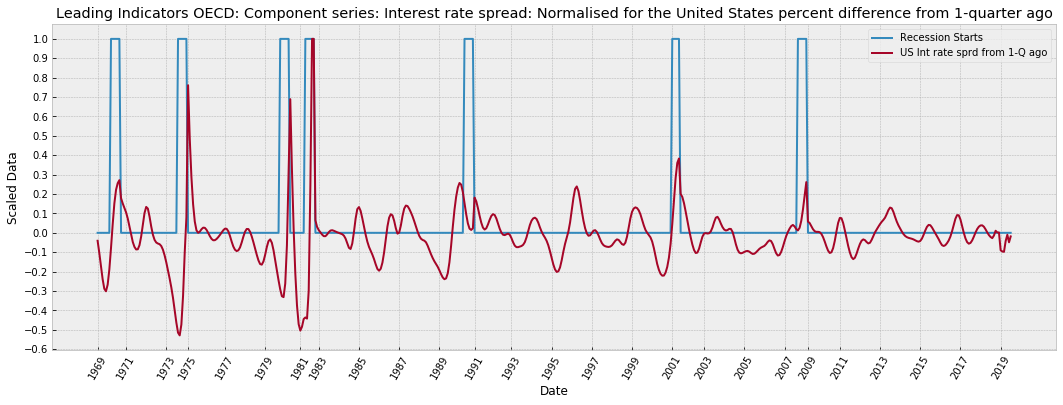

In [53]:
mpl.style.use('bmh')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('Leading Indicators OECD: Component series: Interest rate spread: Normalised for the United States percent difference from 1-quarter ago')
ax.plot(df.RECESSION, label="Recession Starts")
ax.plot(df.USALOCOSINOSTSAM_diffQ, label="US Int rate sprd from 1-Q ago")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

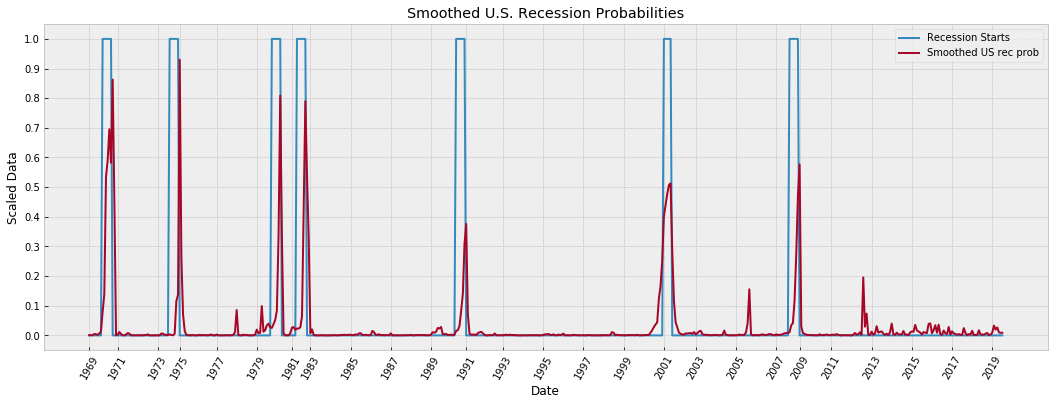

In [55]:
mpl.style.use('bmh')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('Smoothed U.S. Recession Probabilities')
ax.plot(df.RECESSION, label="Recession Starts")
ax.plot(df.RECPROUSM156N, label="Smoothed US rec prob")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

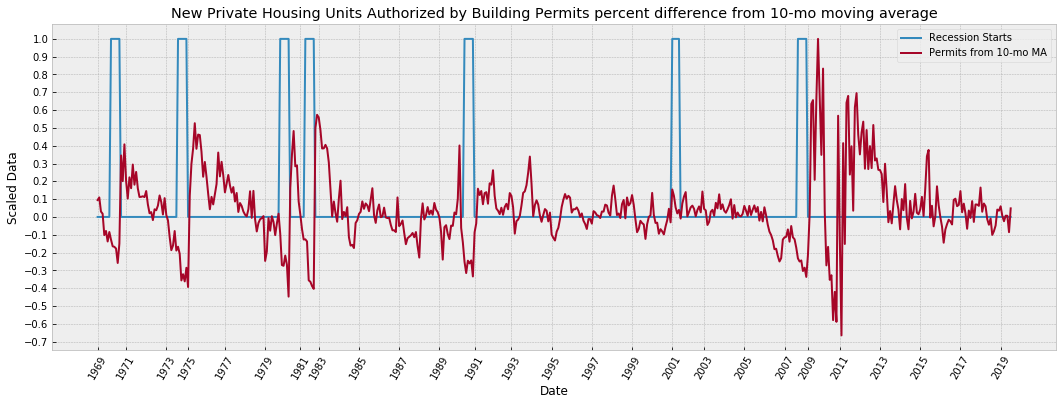

In [56]:
mpl.style.use('bmh')
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('New Private Housing Units Authorized by Building Permits percent difference from 10-mo moving average')
ax.plot(df.RECESSION, label="Recession Starts")
ax.plot(df.PERMIT_diffMA, label="Permits from 10-mo MA")
ax.set_xlabel("Date")
ax.set_ylabel("Scaled Data")
ax.locator_params(axis='y', tight=True, min_n_ticks=11)
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.tick_params(axis='x', labelrotation=60)
ax.legend()
plt.show()

In [58]:
df

CES4000000007  COMPU1USA  CHEBSBUFT02STSAQ  \
date                                                     
1969-01-01       0.982143   0.302537          0.787134   
1969-02-01       0.946429   0.324008          0.787134   
1969-03-01       0.946429   0.324008          0.909803   
1969-04-01       0.928571   0.245934          0.909803   
1969-05-01       0.946429   0.290826          0.909803   
1969-06-01       0.910714   0.309694          0.960313   
1969-07-01       0.928571   0.284320          0.960313   
1969-08-01       0.928571   0.277163          0.960313   
1969-09-01       0.928571   0.257645          1.000000   
1969-10-01       0.910714   0.281067          1.000000   
1969-11-01       0.910714   0.254392          1.000000   
1969-12-01       0.928571   0.255042          0.895371   
1970-01-01       0.910714   0.296682          0.895371   
1970-02-01       0.892857   0.251789          0.895371   
1970-10-01       0.857143   0.281067          0.779918   
1970-11-01       0.857143   0.306441          0.779918   
1970-12-01       0.839286   0.299935          0.642818   
1971-01-01       0.821429   0.307742          0.642818   
1971-02-01       0.839286   0.321405          0.642818   
1971-03-01       0.821429   0.344177          0.629469   
1971-04-01       0.839286   0.425504          0.629469   
1971-05-01       0.803571   0.389720          0.629469   
1971-06-01       0.839286   0.384515          0.543241   
1971-07-01       0.767857   0.429408          0.543241   
1971-08-01       0.839286   0.433962          0.543241   
1971-09-01       0.839286   0.458035          0.468196   
1971-10-01       0.839286   0.467144          0.468196   
1971-11-01       0.839286   0.481457          0.468196   
1971-12-01       0.875000   0.500976          0.426345   
1972-01-01       0.857143   0.493819          0.426345   
...                   ...        ...               ...   
2017-02-01       0.160714   0.247235          0.558538   
2017-03-01       0.142857   0.289525          0.631814   
2017-04-01       0.196429   0.266753          0.631814   
2017-05-01       0.178571   0.288224          0.631814   
2017-06-01       0.196429   0.275862          0.630191   
2017-07-01       0.214286   0.286272          0.630191   
2017-08-01       0.214286   0.227716          0.630191   
2017-09-01       0.196429   0.264802          0.659523   
2017-10-01       0.214286   0.272609          0.659523   
2017-11-01       0.250000   0.245934          0.659523   
2017-12-01       0.232143   0.288874          0.653895   
2018-01-01       0.196429   0.309694          0.653895   
2018-02-01       0.214286   0.338972          0.653895   
2018-03-01       0.232143   0.303188          0.721759   
2018-04-01       0.196429   0.290176          0.721759   
2018-05-01       0.214286   0.335719          0.721759   
2018-06-01       0.232143   0.317502          0.705307   
2018-07-01       0.232143   0.286272          0.705307   
2018-08-01       0.232143   0.357189          0.705307   
2018-09-01       0.232143   0.305791          0.688747   
2018-10-01       0.196429   0.297983          0.688747   
2018-11-01       0.214286   0.258946          0.688747   
2018-12-01       0.196429   0.270657          0.641664   
2019-01-01       0.178571   0.351334          0.641664   
2019-02-01       0.178571   0.287573          0.641664   
2019-03-01       0.196429   0.366949          0.701735   
2019-04-01       0.214286   0.353936          0.701735   
2019-05-01       0.196429   0.335719          0.701735   
2019-06-01       0.196429   0.322707          0.729011   
2019-07-01       0.178571   0.353936          0.729011   

            COREFLEXCPIM157SFRBATL  LFEM25TTUSM647S  FINCPIALLQINMEI  \
date                                                                   
1969-01-01                0.343684         0.019267         0.004099   
1969-02-01                0.743014         0.023032         0.004099   
1969-03-01                0.721846         0.021437         0.004385 

In [62]:
ser_all_top500 = df[all_top500]

In [63]:
# get list of series that are highly correlated
corr_drop = []
idx = 0
for col in ser_all_top500.columns:
    idx += 1
    ser = ser_all_top500[col]
    for cols in ser_all_top500.columns[idx:]:
        corr = np.corrcoef(ser, ser_all_top500[cols])[0,1]
        if corr > 0.95:
            corr_drop.append(col)
            break
    print(idx, end='\r')

In [71]:
len(corr_drop)

593

In [64]:
corr = ser_all_top500.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop_corr))

# X.drop(X[to_drop], axis=1, inplace=True)
# X_corr_drop = X

# corr drops 579 features that are highly correlated



579
546


In [66]:
# low variance drops another 264 features
to_drop_var = ser_all_top500.loc[:, ser_all_top500.var() < .0001].columns
print(len(to_drop_var))

0


In [72]:
from sklearn.decomposition import PCA

In [73]:
# pca - keep 95% of variance
pca = PCA(n_components=0.95, svd_solver='full')
principal_components = pca.fit_transform(ser_all_top500)
principal_df = pd.DataFrame(data = principal_components, index = ser_all_top500.index)
print(principal_df.shape)

(546, 81)


In [65]:
ser_all_top500.var().sort_values()

CWUR0000SAG_diffQ         0.001570
CPIOGSSL_diffQ            0.001663
CPIOGSNS_diffQ            0.001709
CWUR0000SEFV_diffQ        0.001765
CUUR0000SEFV_diffQ        0.001779
CWSR0000SEFV_diffQ        0.001785
WPU1165_diffMA            0.001840
CURRNS_diffQ              0.001842
PCU333244333244_diffMA    0.001886
LNS12035019_diffQ         0.002013
GDITAXES_diffQ            0.002031
W254RC1Q027SBEA_diffQ     0.002108
CEU0500000030_diffQ       0.002157
CEU3200000030_diffQ       0.002160
WPU1145_diffQ             0.002304
LNS12032189_diffQ         0.002380
MBCURRCIR_diffQ           0.002478
CURRCIR_diffQ             0.002482
CEU5000000030_diffQ       0.002540
LFESEETTUSM647S_diffQ     0.002585
CEU3200000030_diffMA      0.002634
A015RS2Q224SBEA           0.002699
CEU0800000010_diffMA      0.002803
IPB53240S_diffMA          0.002904
WPU119201_diffQ           0.003017
CEU5000000030_diffMA      0.003200
CEU0500000030_diffMA      0.003216
DNKCPGRLH01IXOBQ_diffQ    0.003230
CEU0800000035_diffQ 